In [1]:
from syntactic_similarity import syntactic_similarity_driver
from structural_similarity import structural_similarity_driver

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

# generating the scores csv

In [4]:


def generate_scores_csv(df,path):
    firstIndex = path.find("n_")
    finalIndex = path.find("_",firstIndex+2)
    n = int(path[firstIndex+2:finalIndex])

    cols = [
        'task_id', 'prompt', 'sequence_similarity','edit_distance_score',
        'jaccard_similarity','cosine_similarity_score','sorensen_dice_coefficient',
        'hamming_distance_score', 'longest_common_subsequence', 'UnifiedDiff','TreeDiff'
    ] + [f'pass_rate_{i}' for i in range(n+1)]


    final = pd.DataFrame(columns = cols)

    #iterating over the rows of the dataframe
    for index, row in df.iterrows():
        #getting the reference and the generated text
        generated_codes = list(row[[f'code_{i}' for i in range(n+1)]])
            
        #computing the structural similarity
        _, structural_similarity_scores_dict,_ = structural_similarity_driver(generated_codes)
        
        #computing the syntactic similarity
        _, syntactic_similarity_scores_dict,_ = syntactic_similarity_driver(generated_codes)
        
        #dict to store the data
        dict = {'task_id': row['task_id'], 'prompt': row['prompt']}

        for i in range(n+1):
            dict['pass_rate_'+str(i)] = row['pass_rate_'+str(i)]
            
        #appending the syntactic similarity scores to the dict
        for key in syntactic_similarity_scores_dict.keys():
            dict[key] = syntactic_similarity_scores_dict[key]

        #appending the structural similarity scores to the dict
        for key in structural_similarity_scores_dict.keys():
            dict[key] = structural_similarity_scores_dict[key]

        temp = pd.DataFrame(dict, index=[0])

        #concatenating the dataframes
        final = pd.concat([final, temp], ignore_index=True)
    
    path = path.replace(".csv","_sim_score.csv")
    path = path.replace("RESULTS","RESULTS/final scores")
    final.to_csv(path, index=False)

# reading the files

In [5]:
# Get a list of all CSV files in the directory
csv_files = glob.glob('./RESULTS/*.csv')

# Loop over the files and read them into pandas DataFrames
for file in csv_files:
    df = pd.read_csv(file)
    generate_scores_csv(df,file)
    print("Scores generated for ", file)

print("Scores generated successfully")

/tmp/ipykernel_35193/1187370557.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, temp], ignore_index=True)


Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-4-turbo-preview_n_5_tempr_0_temps_1_trial_1.csv


/tmp/ipykernel_35193/1187370557.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, temp], ignore_index=True)


Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_0_temps_1.5_trial_1.csv


/tmp/ipykernel_35193/1187370557.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, temp], ignore_index=True)


Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_1_temps_1_trial_1.csv


/tmp/ipykernel_35193/1187370557.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, temp], ignore_index=True)


Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_0_temps_1_trial_1.csv


/tmp/ipykernel_35193/1187370557.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, temp], ignore_index=True)


Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_3_tempr_0_temps_1_trial_1.csv


/tmp/ipykernel_35193/1187370557.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, temp], ignore_index=True)


Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_10_tempr_0_temps_1_trial_1.csv
Scores generated successfully


# visualizations

In [72]:
def visualize(df,path):
    print("Visualizing the scores of the file ",path)
    firstIndex = path.find("n_")
    finalIndex = path.find("_",firstIndex+2)
    n = int(path[firstIndex+2:finalIndex])

    df['avg_pass_rate'] = df[[f'pass_rate_{i}' for i in range(n)]].mean(axis=1)
    #sort by avg pass rate
    df = df.sort_values(by='avg_pass_rate',ascending=True)
    #scoring columns
    scores_columns = ['sequence_similarity','edit_distance_score','jaccard_similarity','cosine_similarity_score','sorensen_dice_coefficient','hamming_distance_score','longest_common_subsequence','UnifiedDiff','TreeDiff']
    #print the number of data points that has the avg pass rate of 100
    print("number of data points that has the avg pass rate = 100 ",len(df[df['avg_pass_rate'] == 100] )/ len(df))

    #plot the avg pass rate with the task id and a score metrics
    for score in scores_columns:
        print("The correlation between the average pass rate and",score,"is",df['avg_pass_rate'].corr(df[score]))
        #plot the avg pass rate wih color red and sequence similarity with color blue
        plt.figure(figsize=(25,10))
        plt.scatter(df['task_id'],df[score]*100,color='blue')
        plt.scatter(df['task_id'],df['avg_pass_rate'],color='red')
        plt.xlabel('Task ID')
        plt.ylabel('Scores')
        plt.legend([score,'Average Pass Rate'])
        plt.title('Average Pass Rate vs ' + score)
        plt.grid()
        plt.show()

    print("Visualizing the scores of the file ",path," completed")
    print("--------------------------------------------------------------------")

    


Visualizing the scores of the file  ./RESULTS/final scores/dataset_HumanEval_model_gpt-3.5-turbo_n_10_tempr_0_temps_1_trial_1_sim_score.csv
number of data points that has the avg pass rate = 100  0.34146341463414637
The correlation between the average pass rate and sequence_similarity is 0.29064491481865357


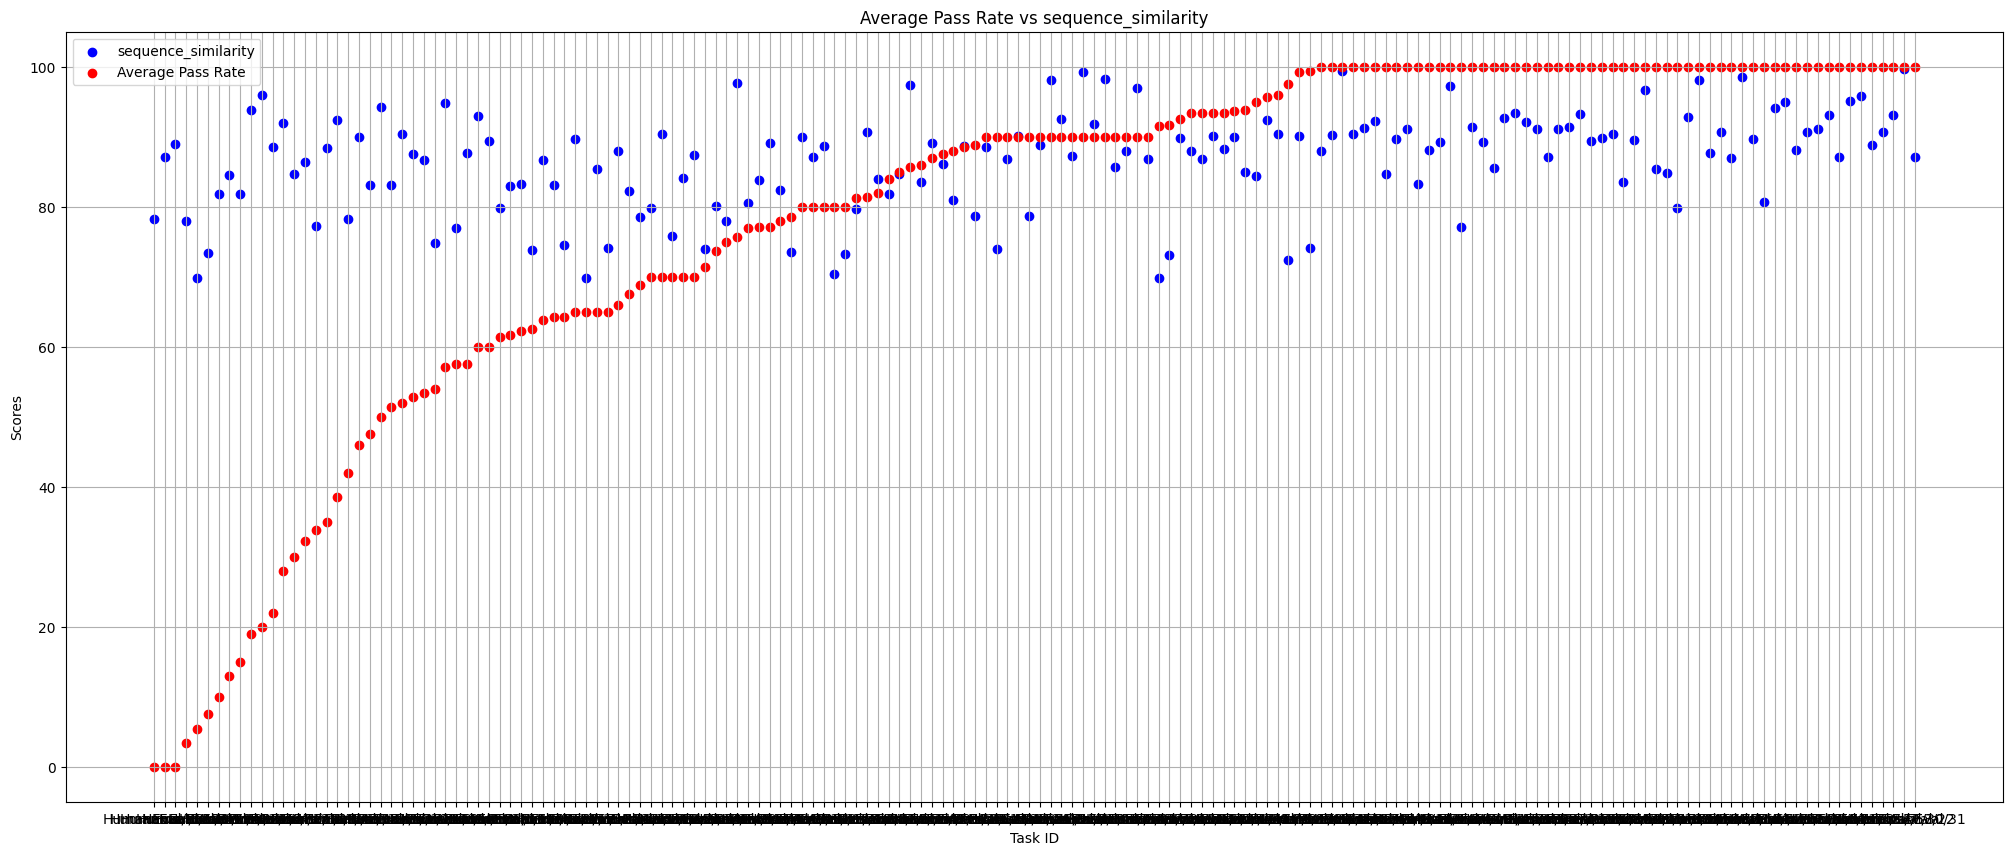

The correlation between the average pass rate and edit_distance_score is 0.27415649683807175


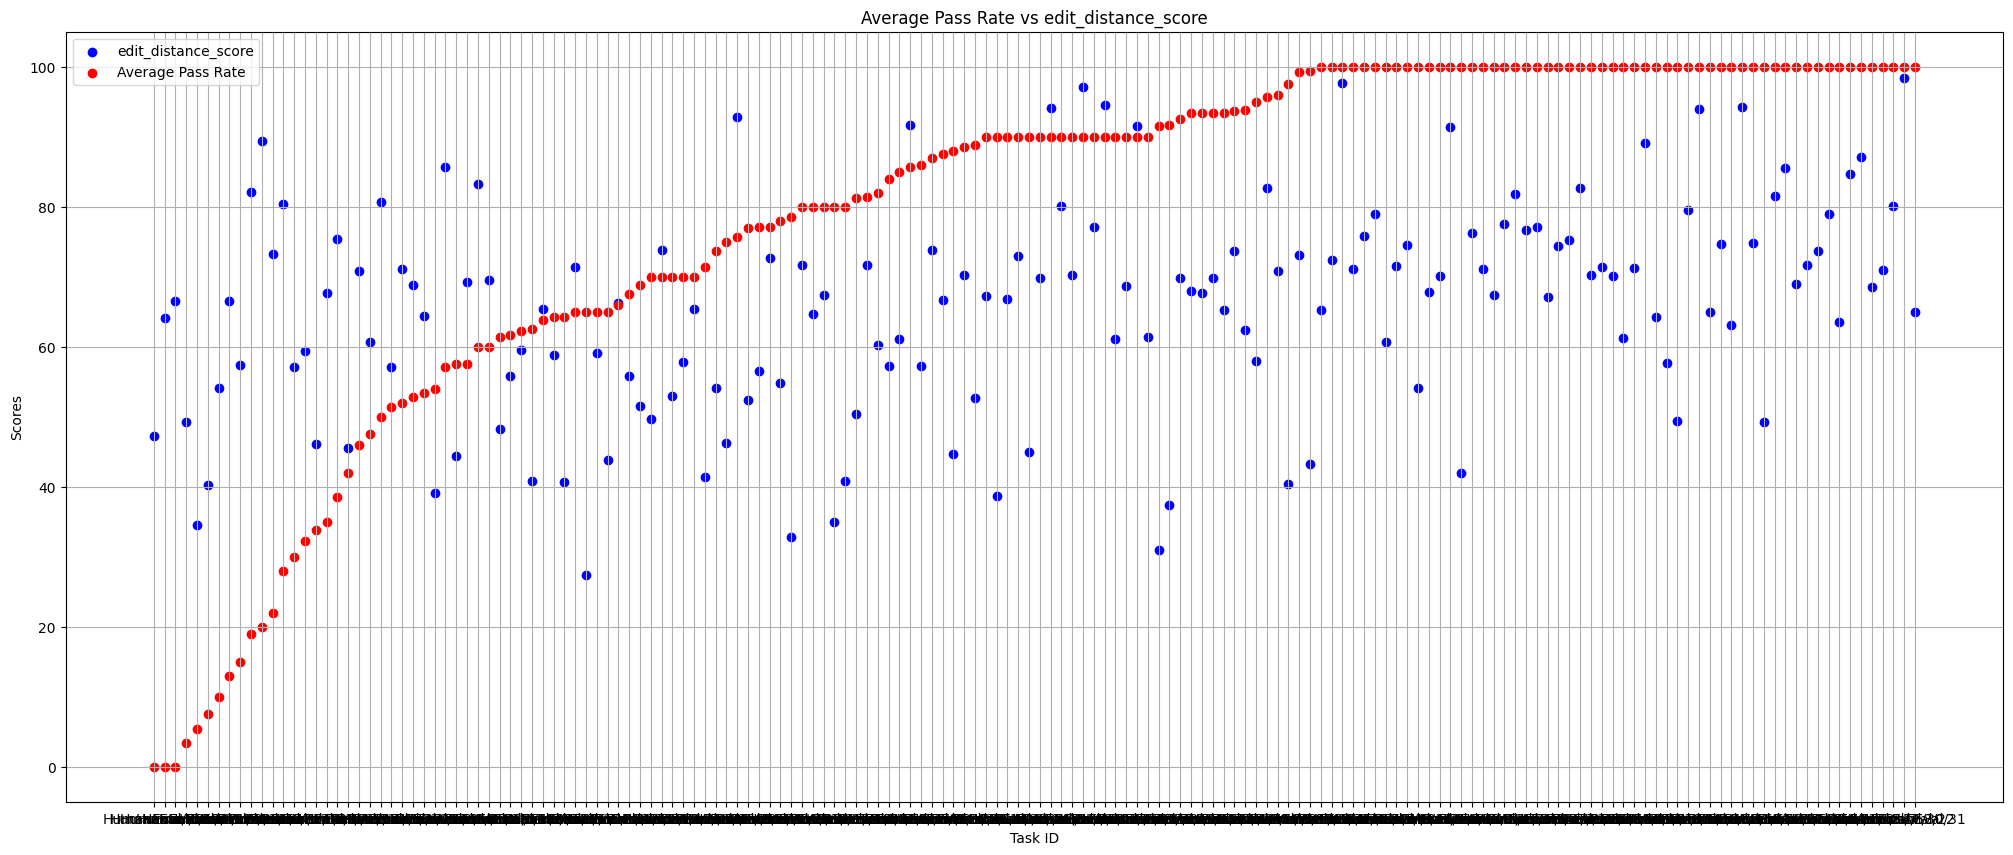

The correlation between the average pass rate and jaccard_similarity is 0.23756433170649913


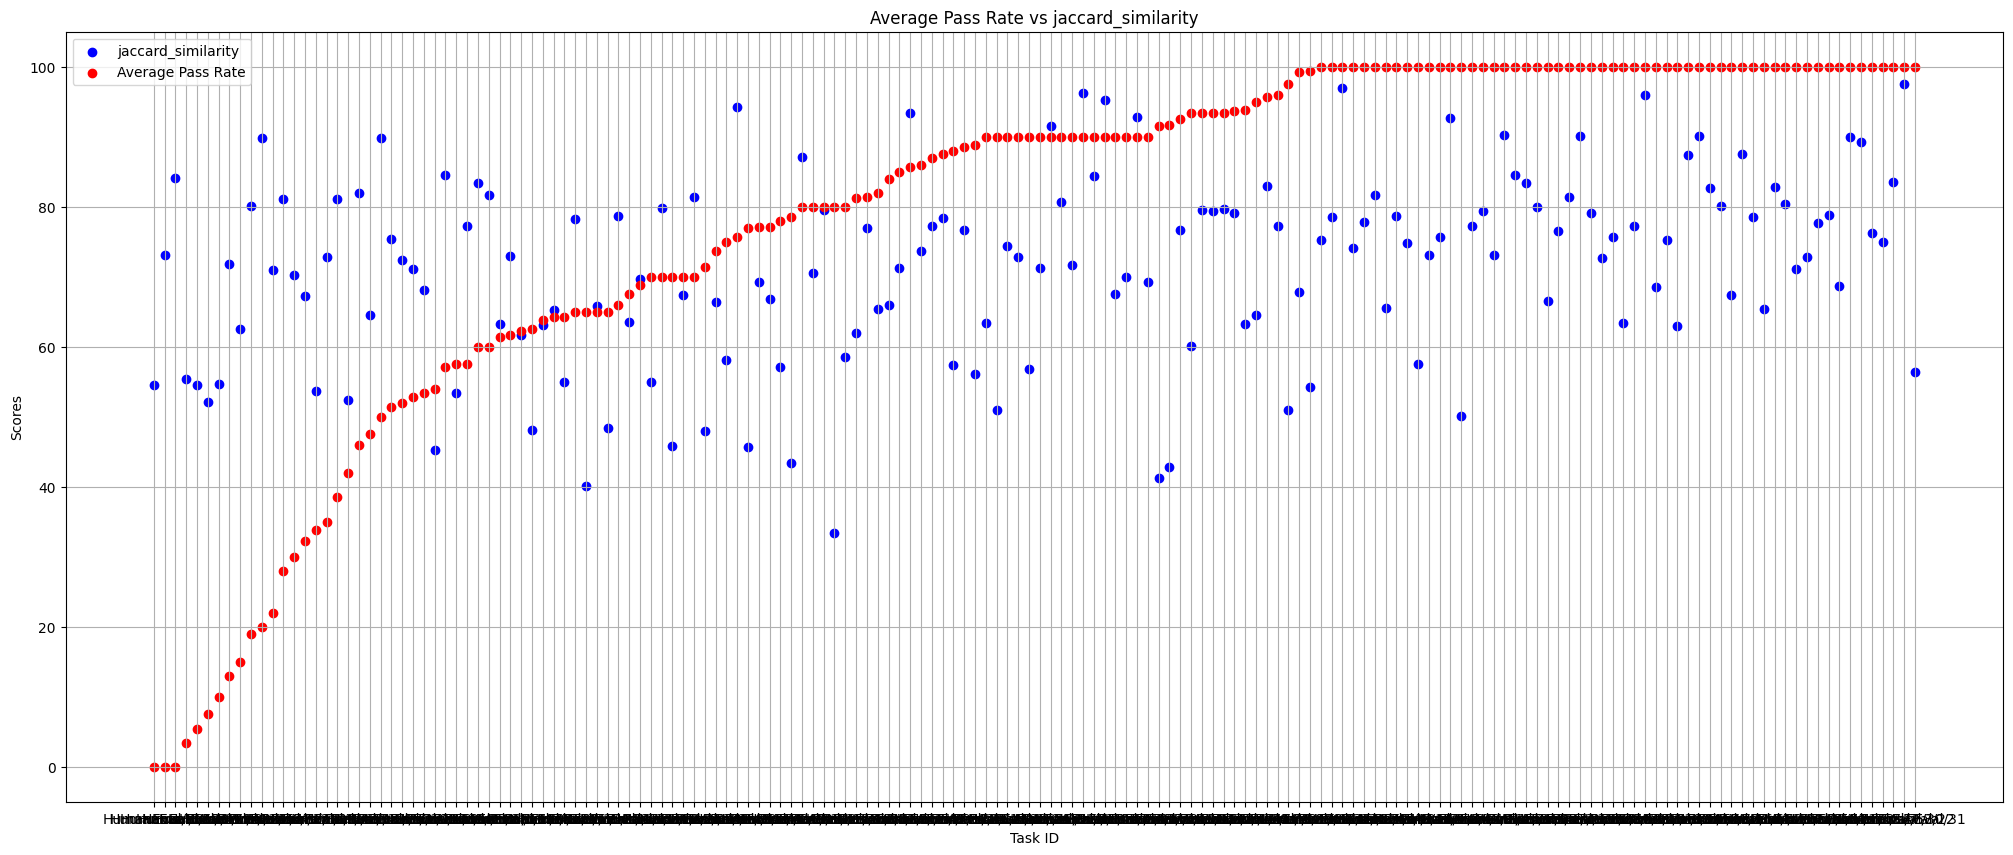

The correlation between the average pass rate and cosine_similarity_score is 0.2913085332422991


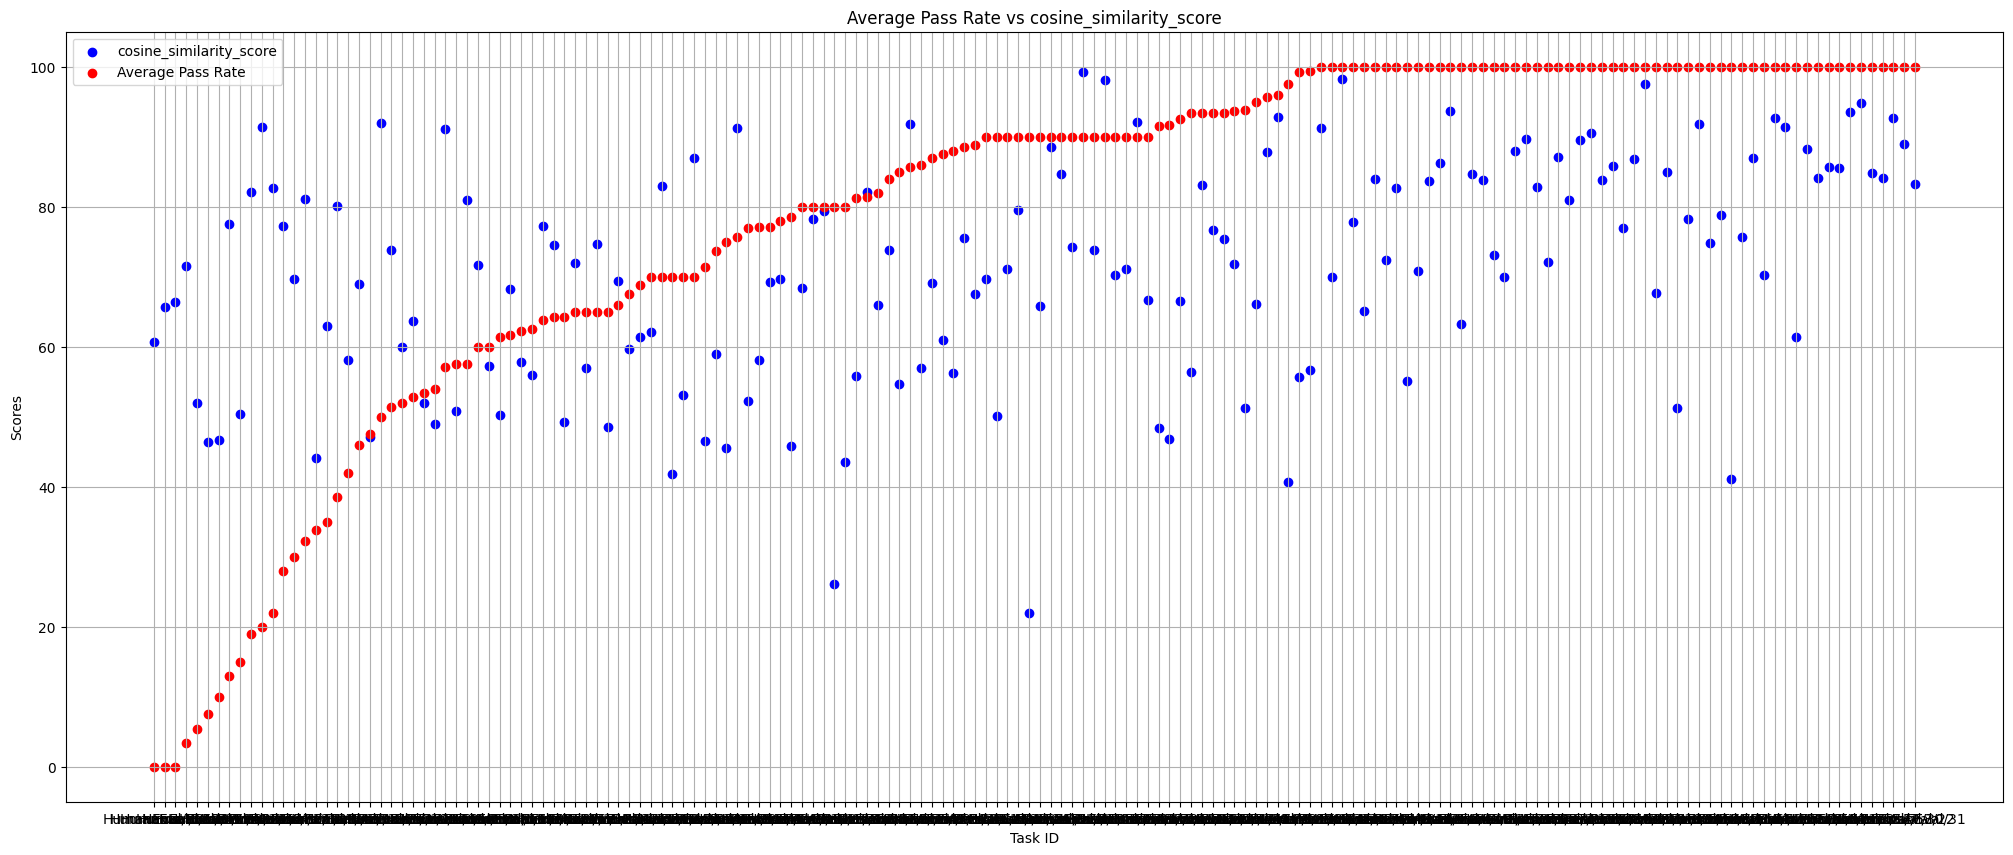

The correlation between the average pass rate and sorensen_dice_coefficient is 0.08884381095270599


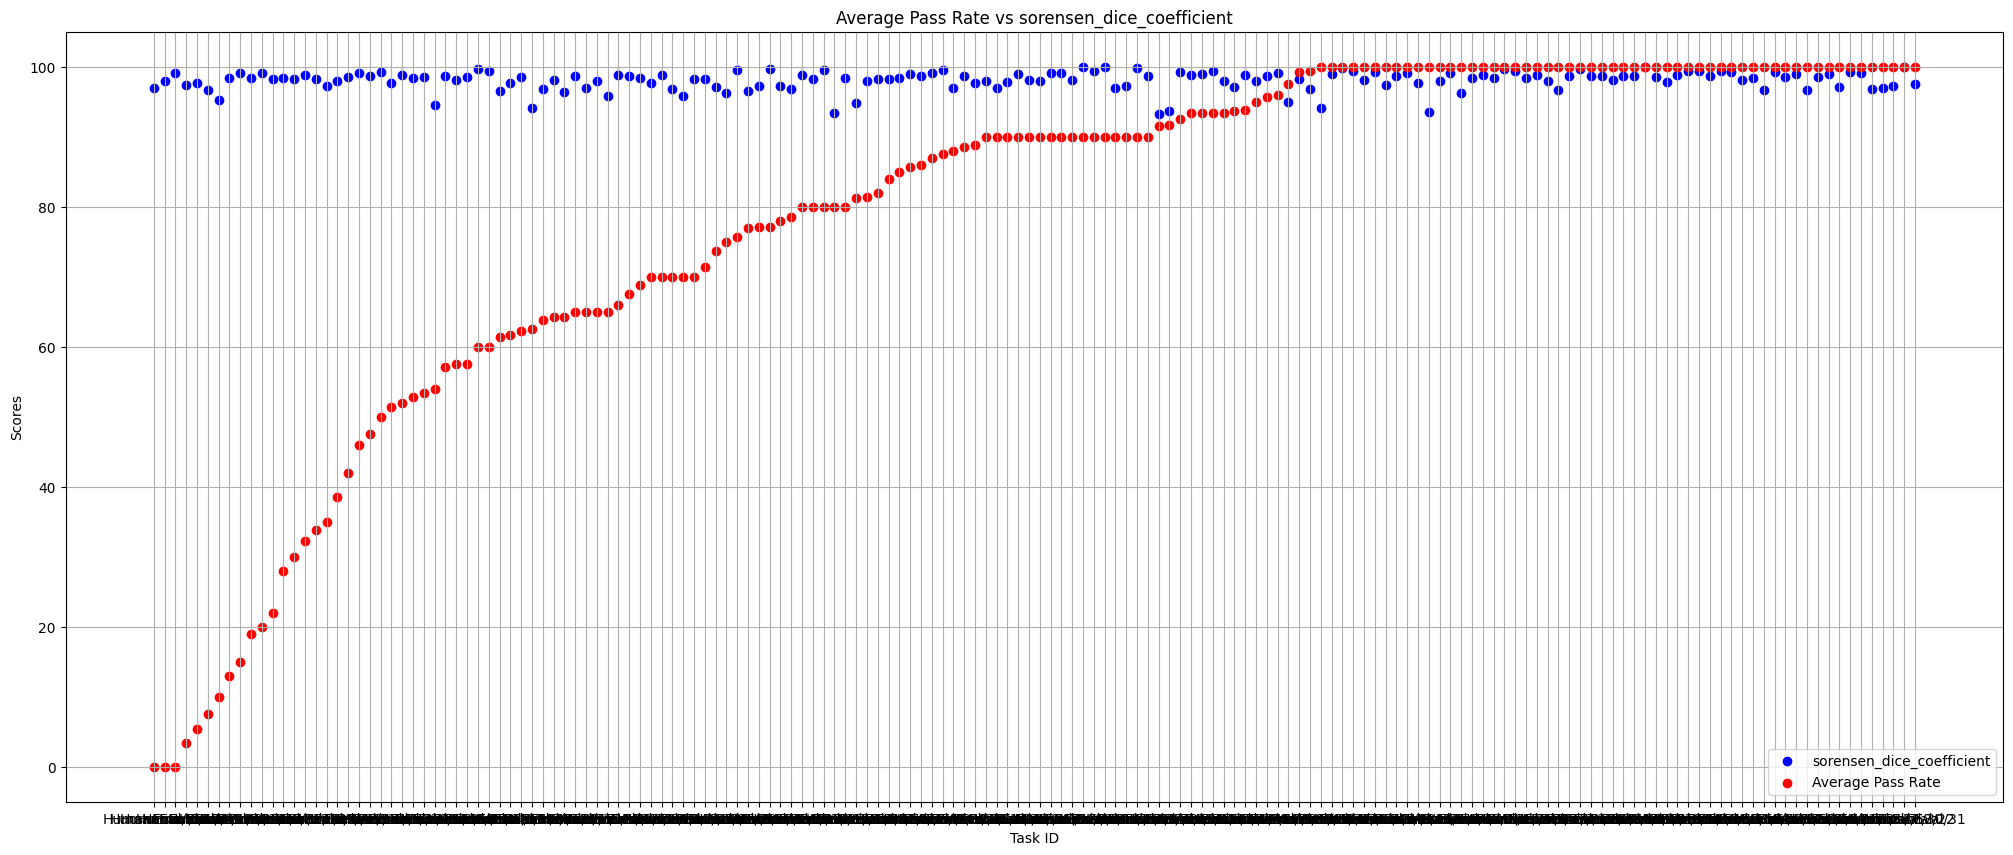

The correlation between the average pass rate and hamming_distance_score is 0.1752440099901604


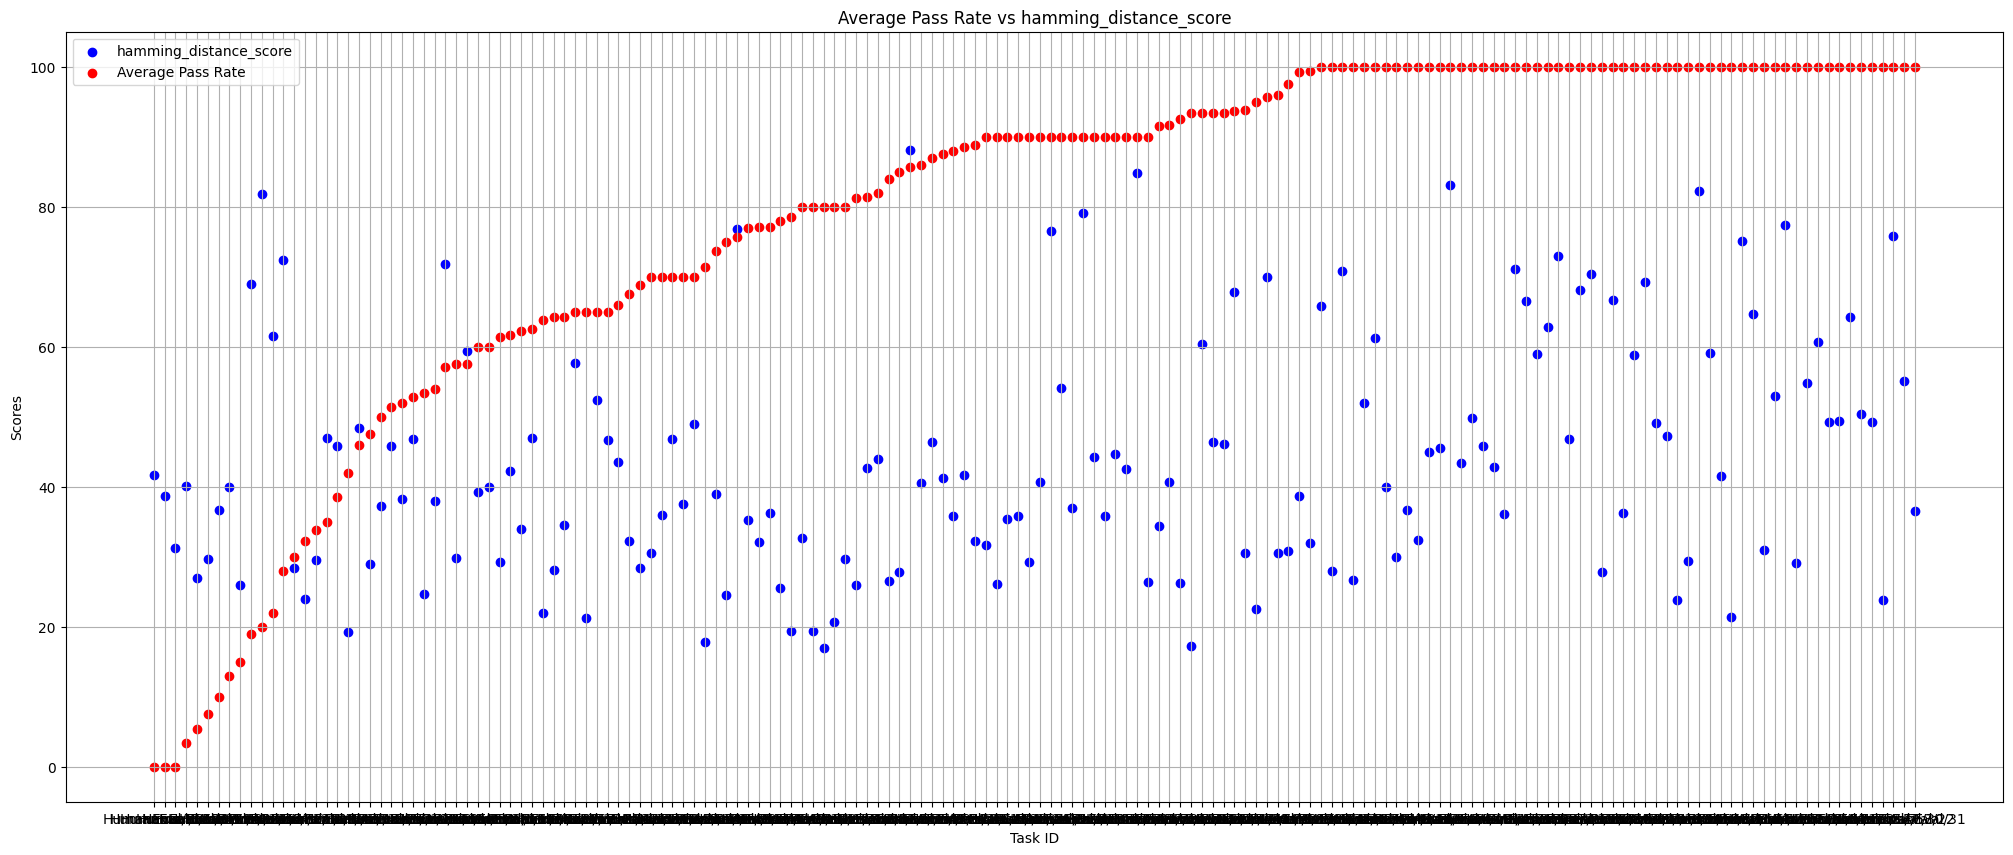

The correlation between the average pass rate and longest_common_subsequence is 0.24205113569440845


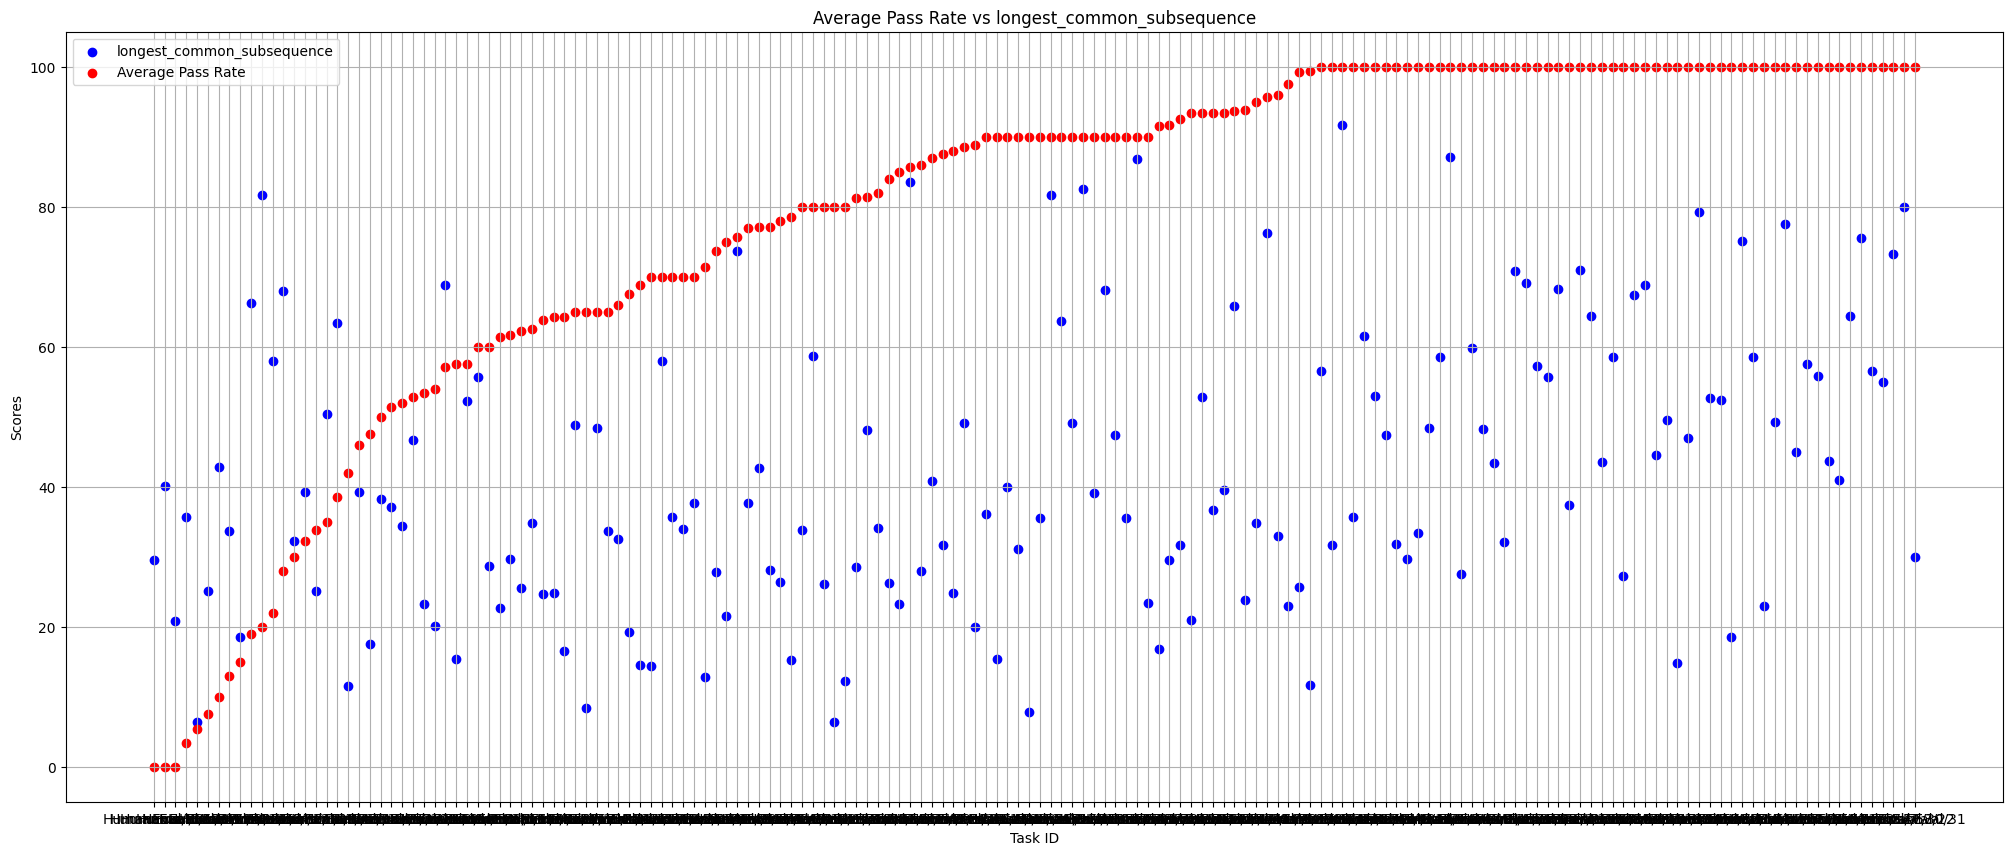

The correlation between the average pass rate and UnifiedDiff is 0.30054771586060103


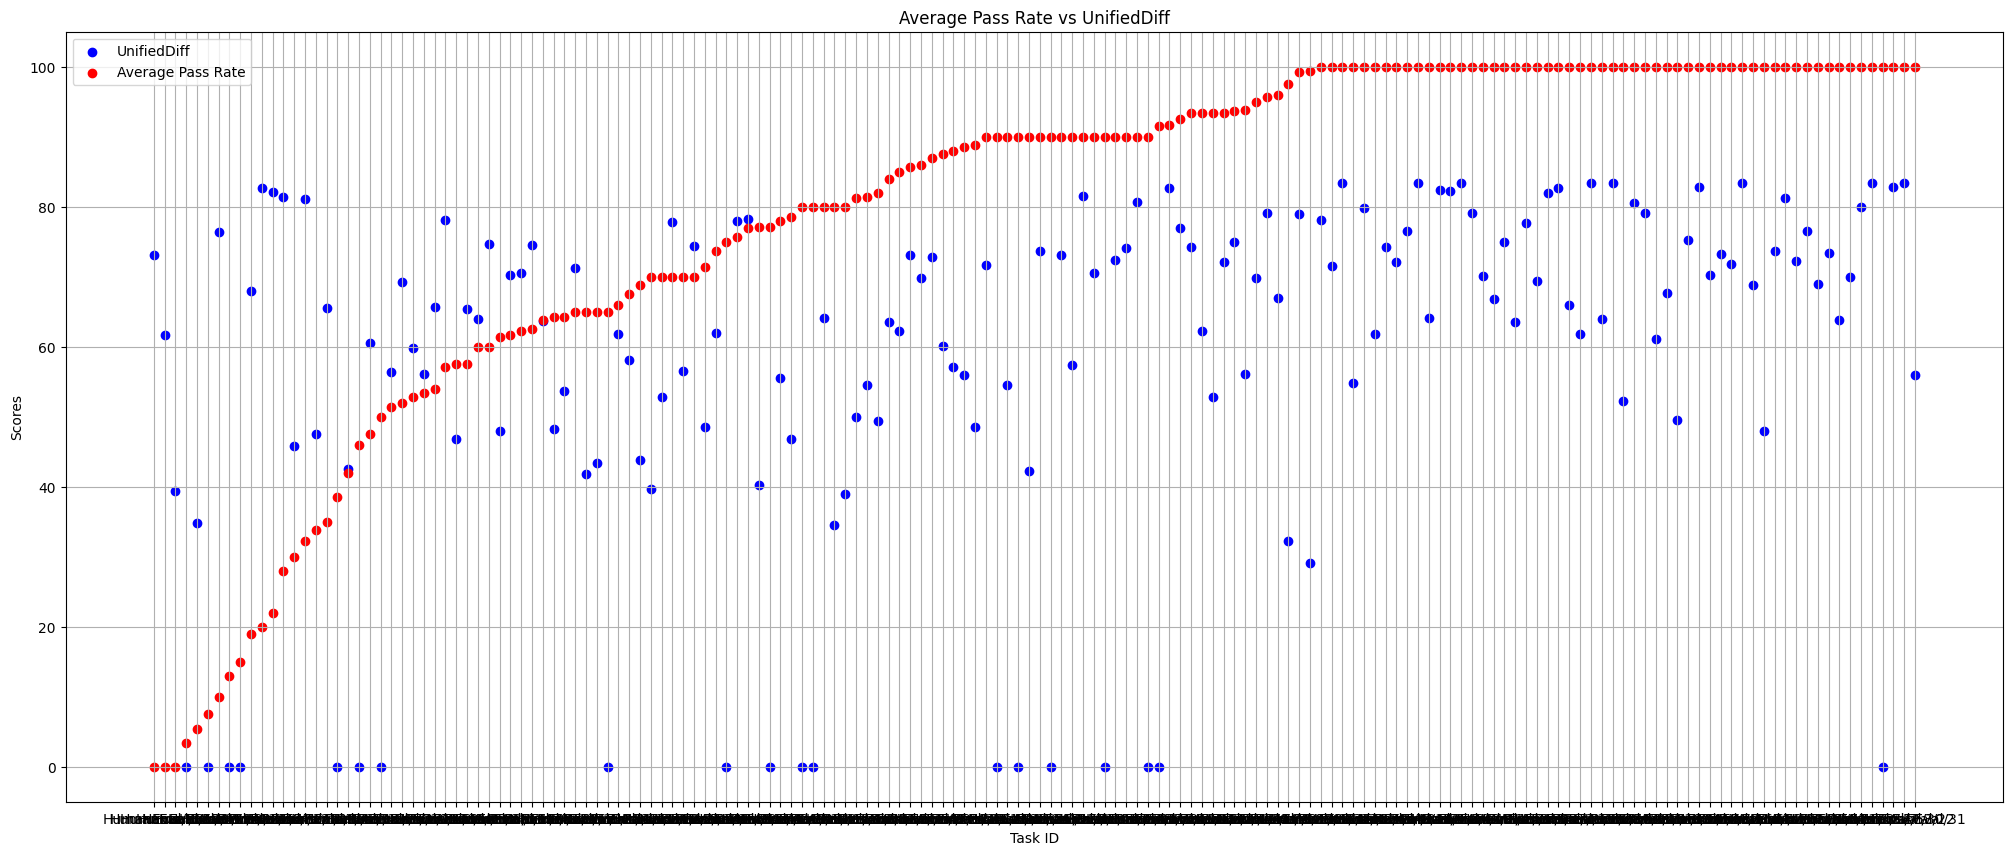

The correlation between the average pass rate and TreeDiff is 0.27670463896454756


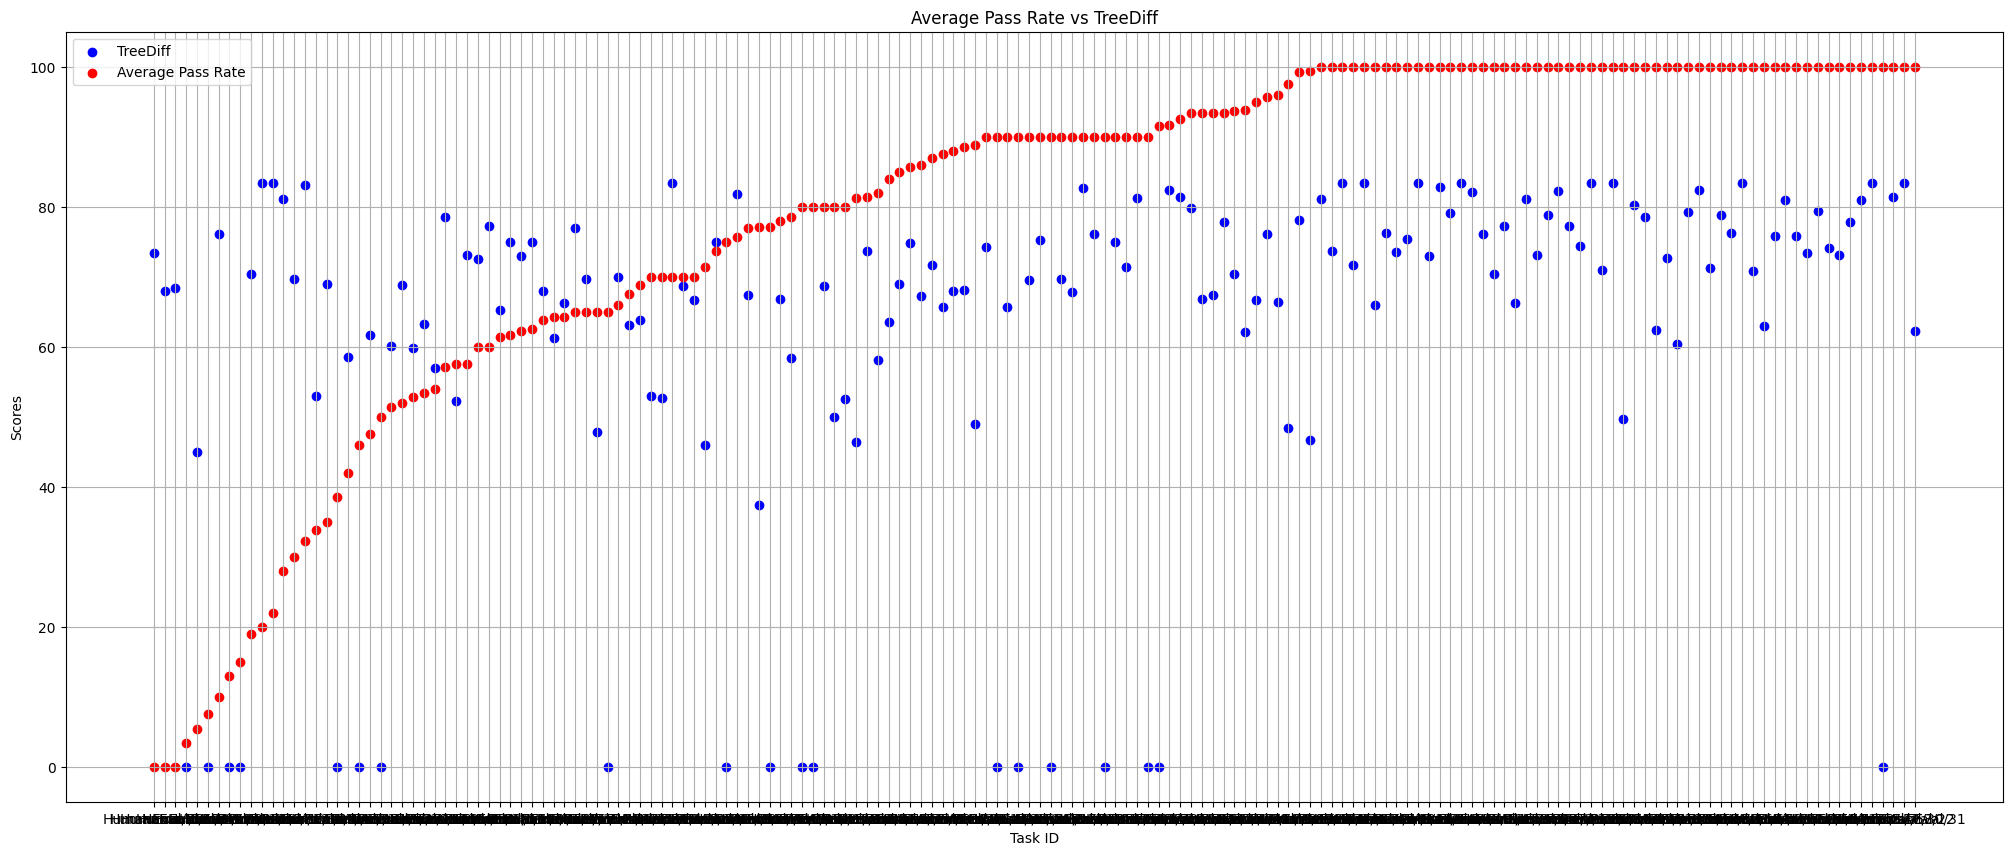

Visualizing the scores of the file  ./RESULTS/final scores/dataset_HumanEval_model_gpt-3.5-turbo_n_10_tempr_0_temps_1_trial_1_sim_score.csv  completed
--------------------------------------------------------------------
Visualizing the scores of the file  ./RESULTS/final scores/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_0_temps_1_trial_1_sim_score.csv
number of data points that has the avg pass rate = 100  0.47560975609756095
The correlation between the average pass rate and sequence_similarity is 0.2561940689895235


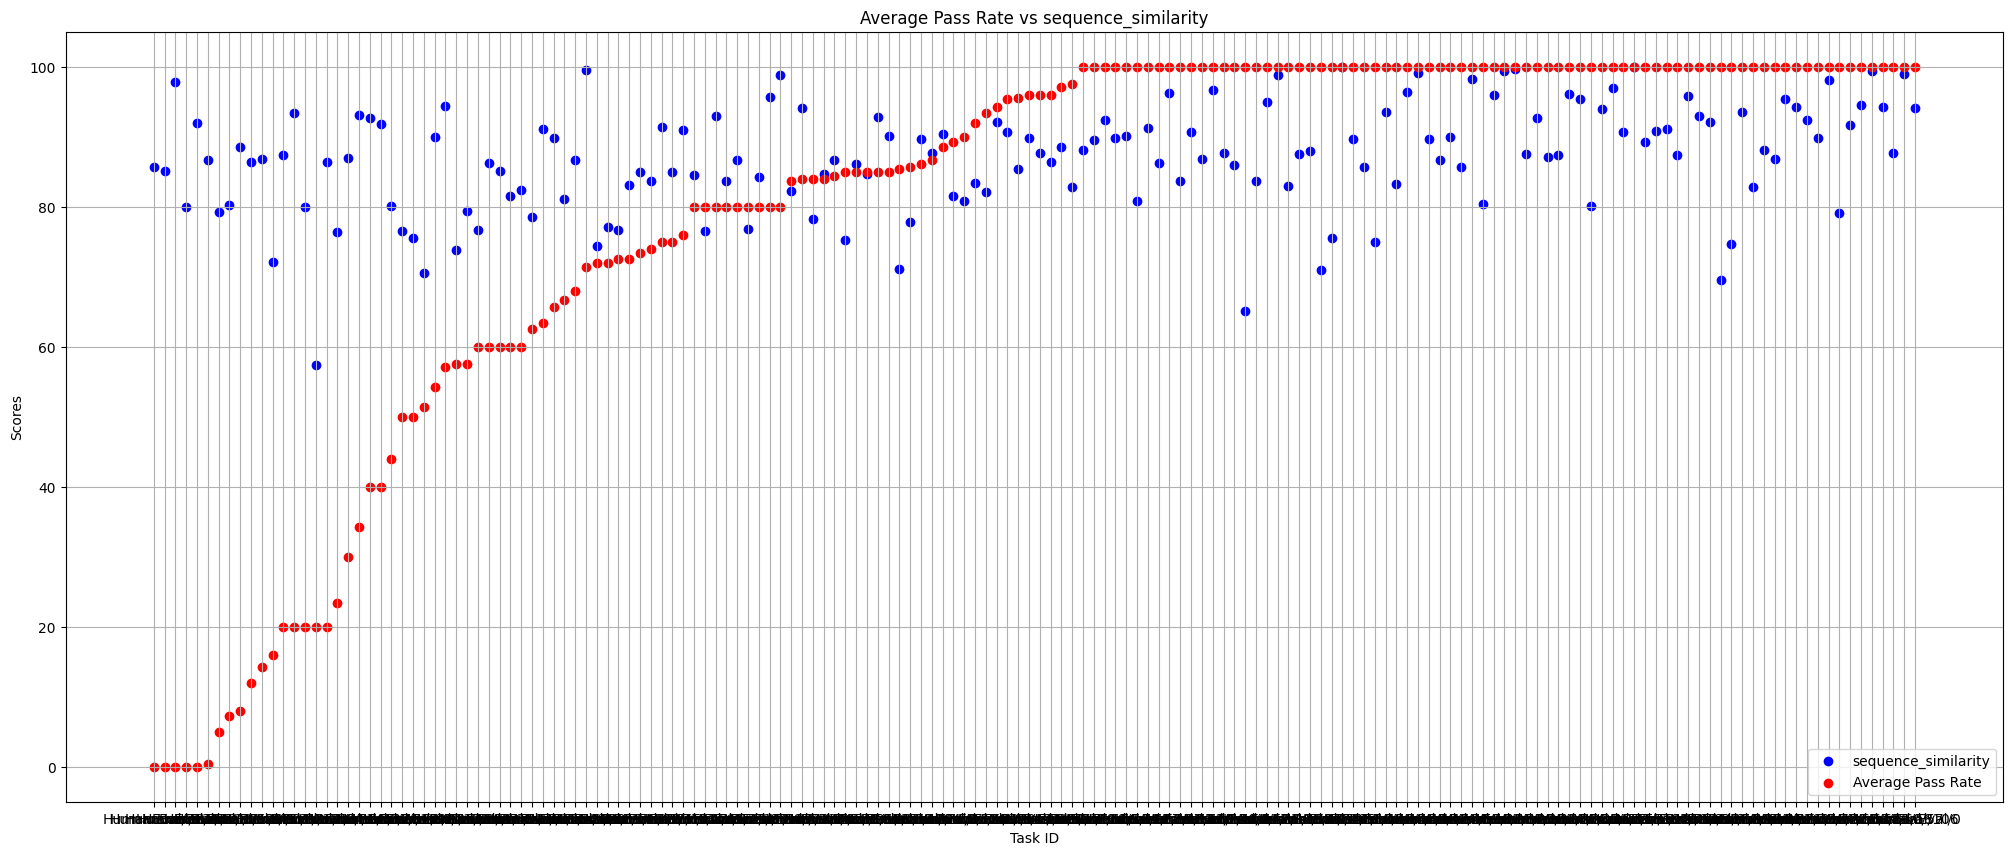

The correlation between the average pass rate and edit_distance_score is 0.24855880820029824


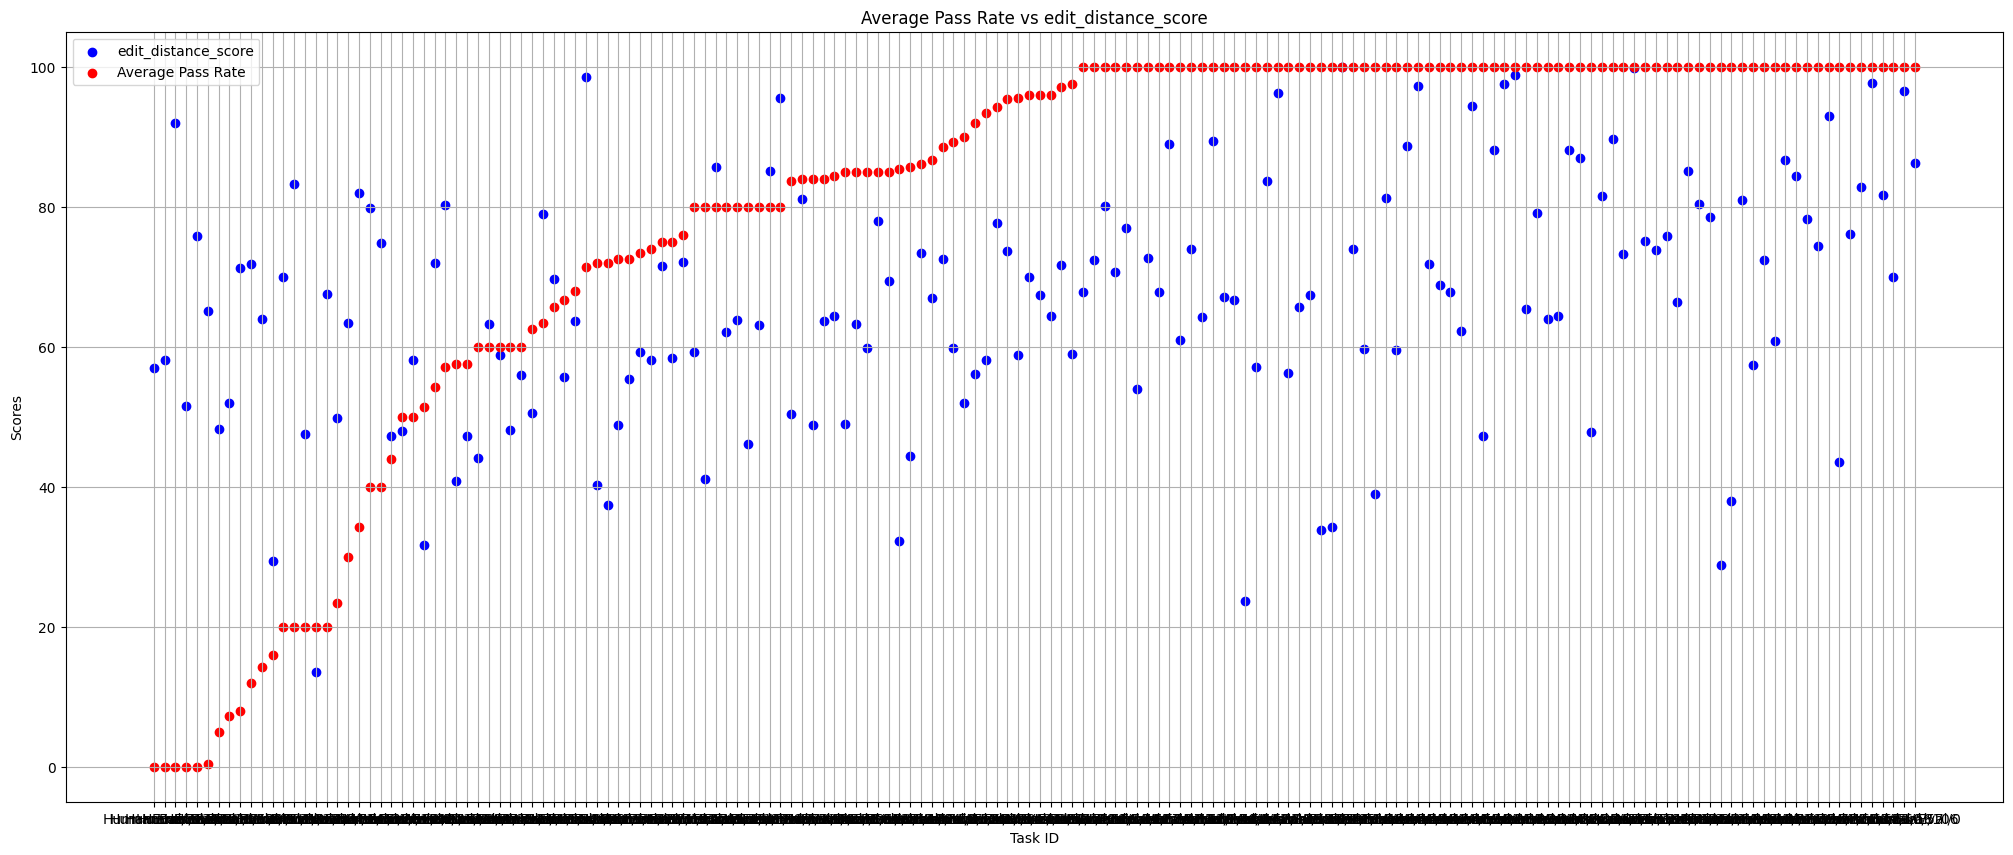

The correlation between the average pass rate and jaccard_similarity is 0.24323552457219375


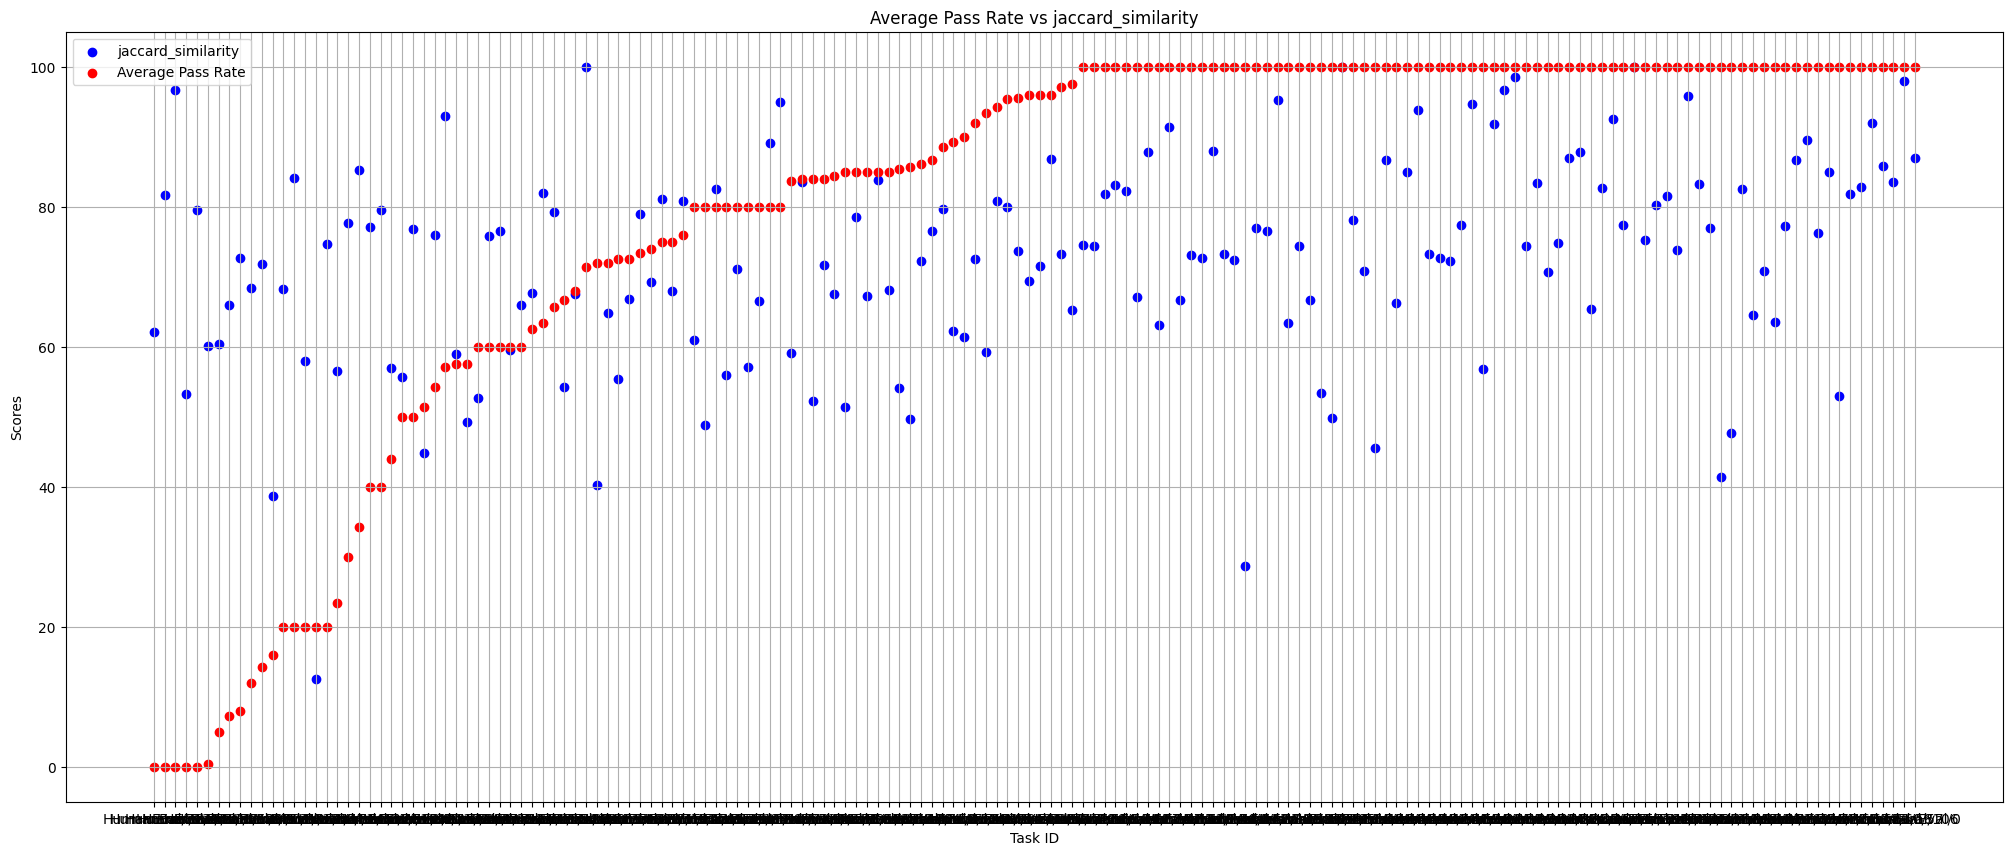

The correlation between the average pass rate and cosine_similarity_score is 0.22872327067922452


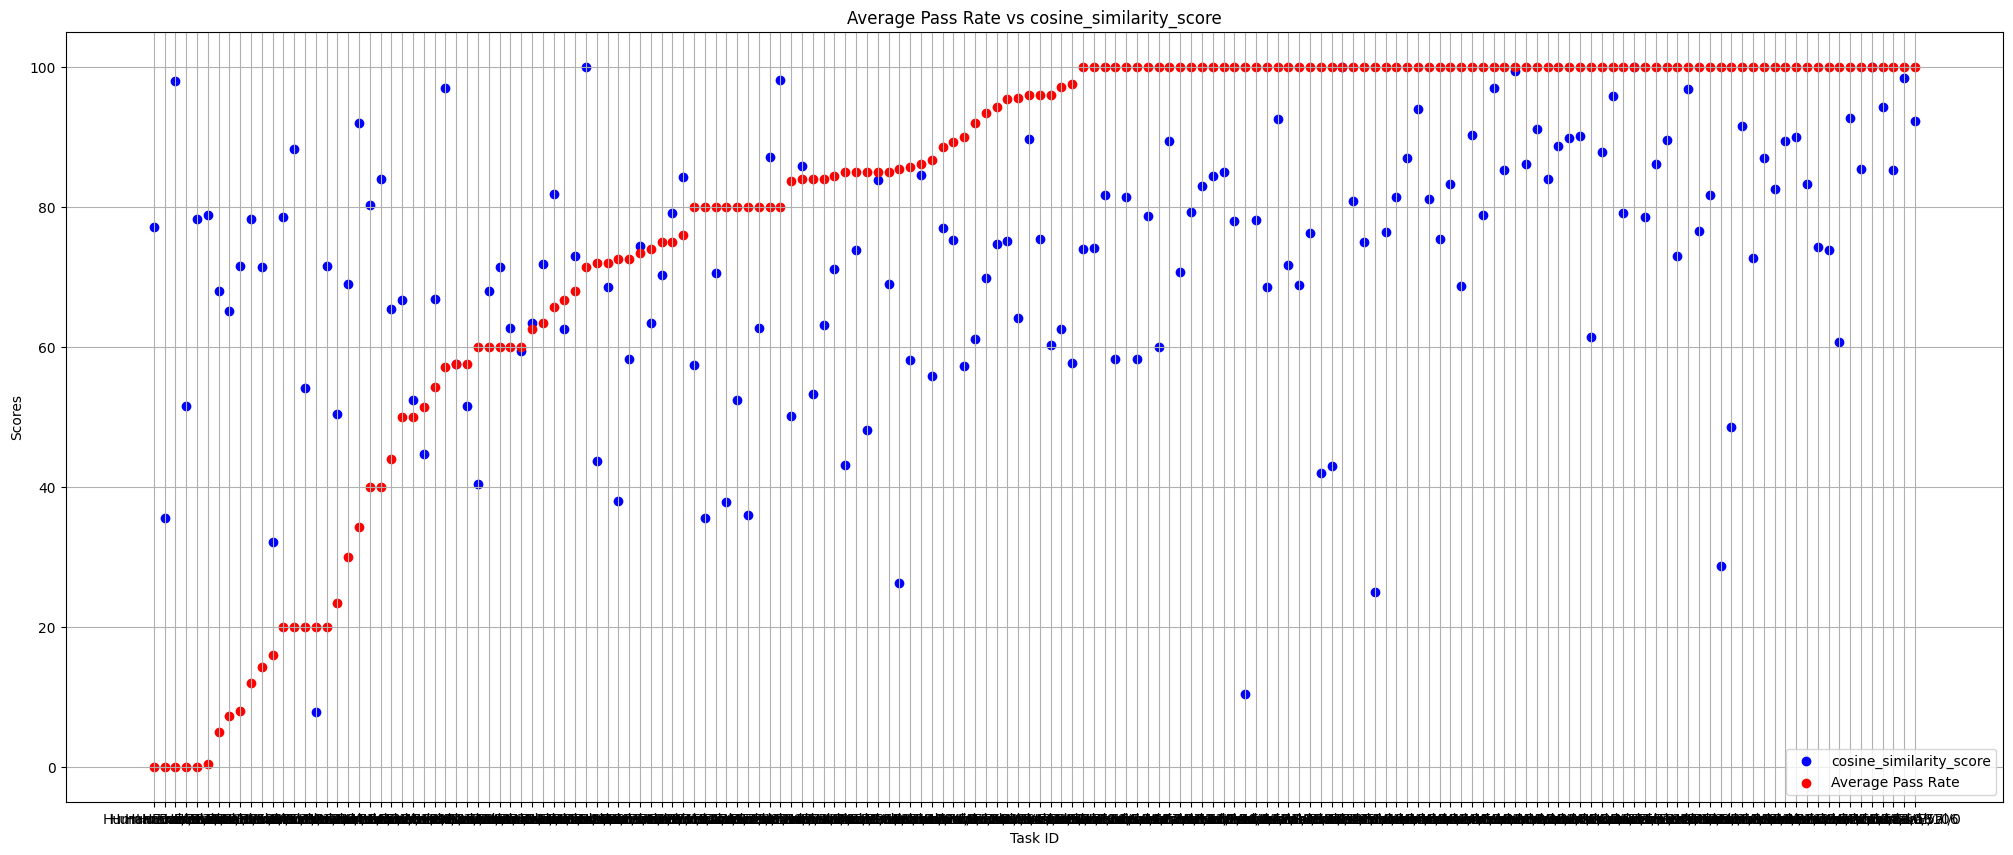

The correlation between the average pass rate and sorensen_dice_coefficient is 0.09630543374123819


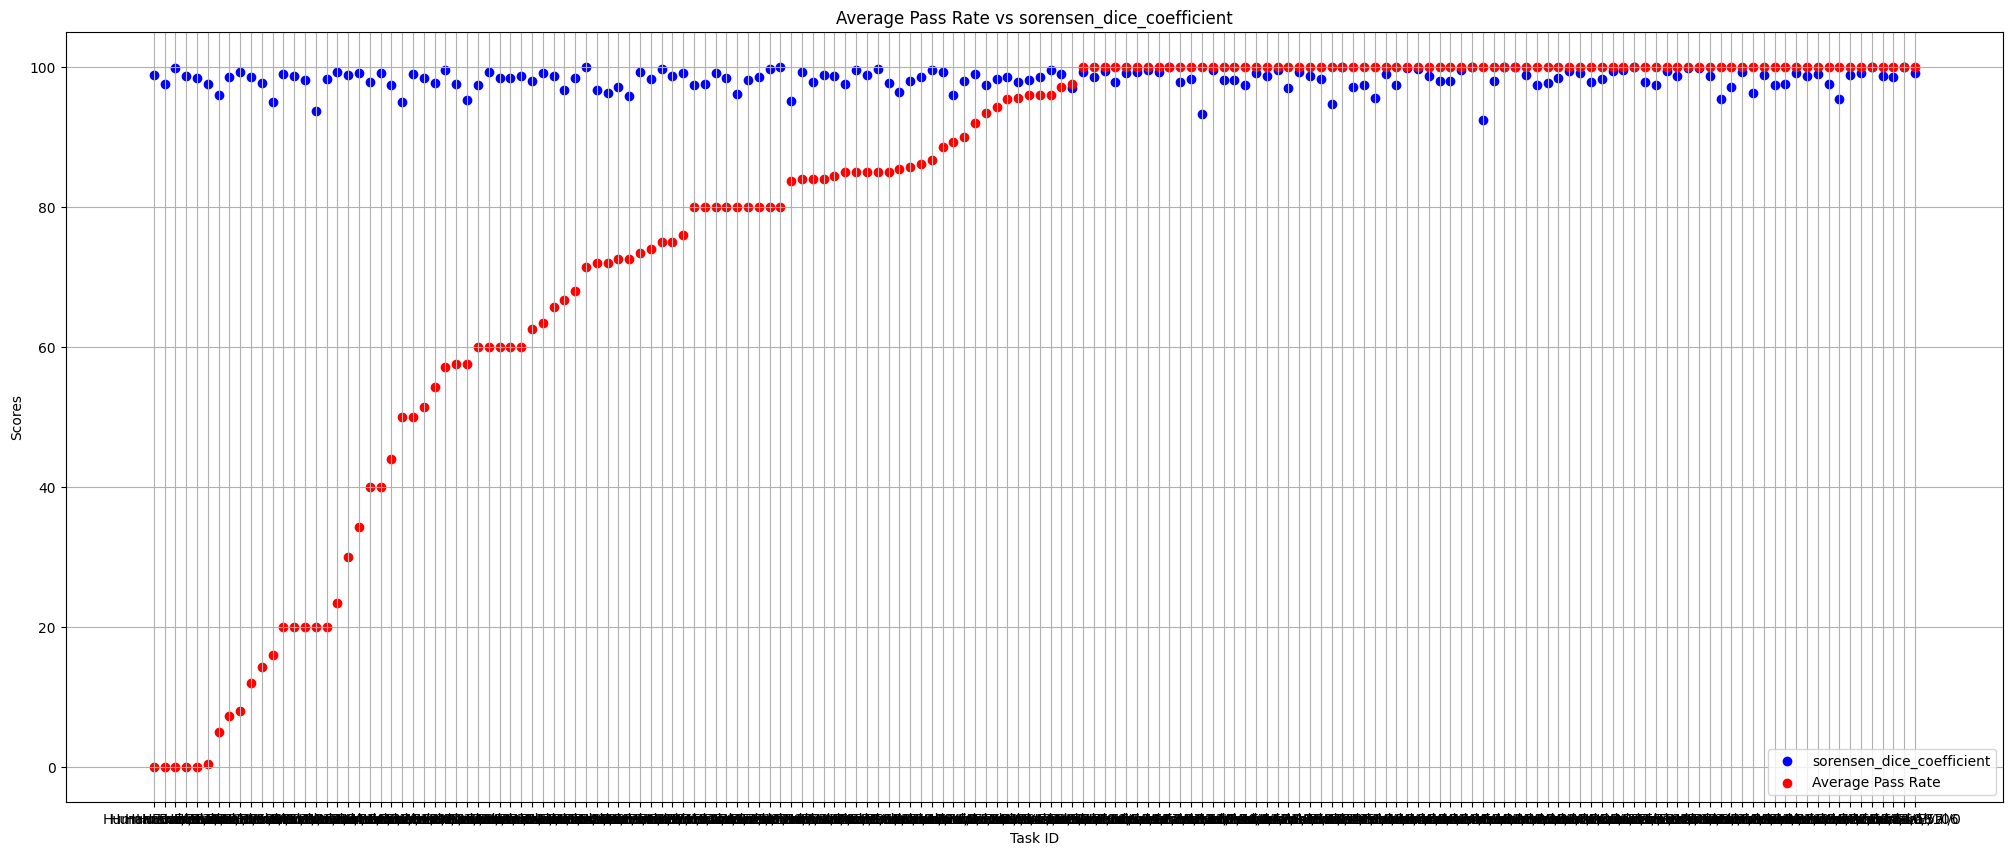

The correlation between the average pass rate and hamming_distance_score is 0.1743239978970211


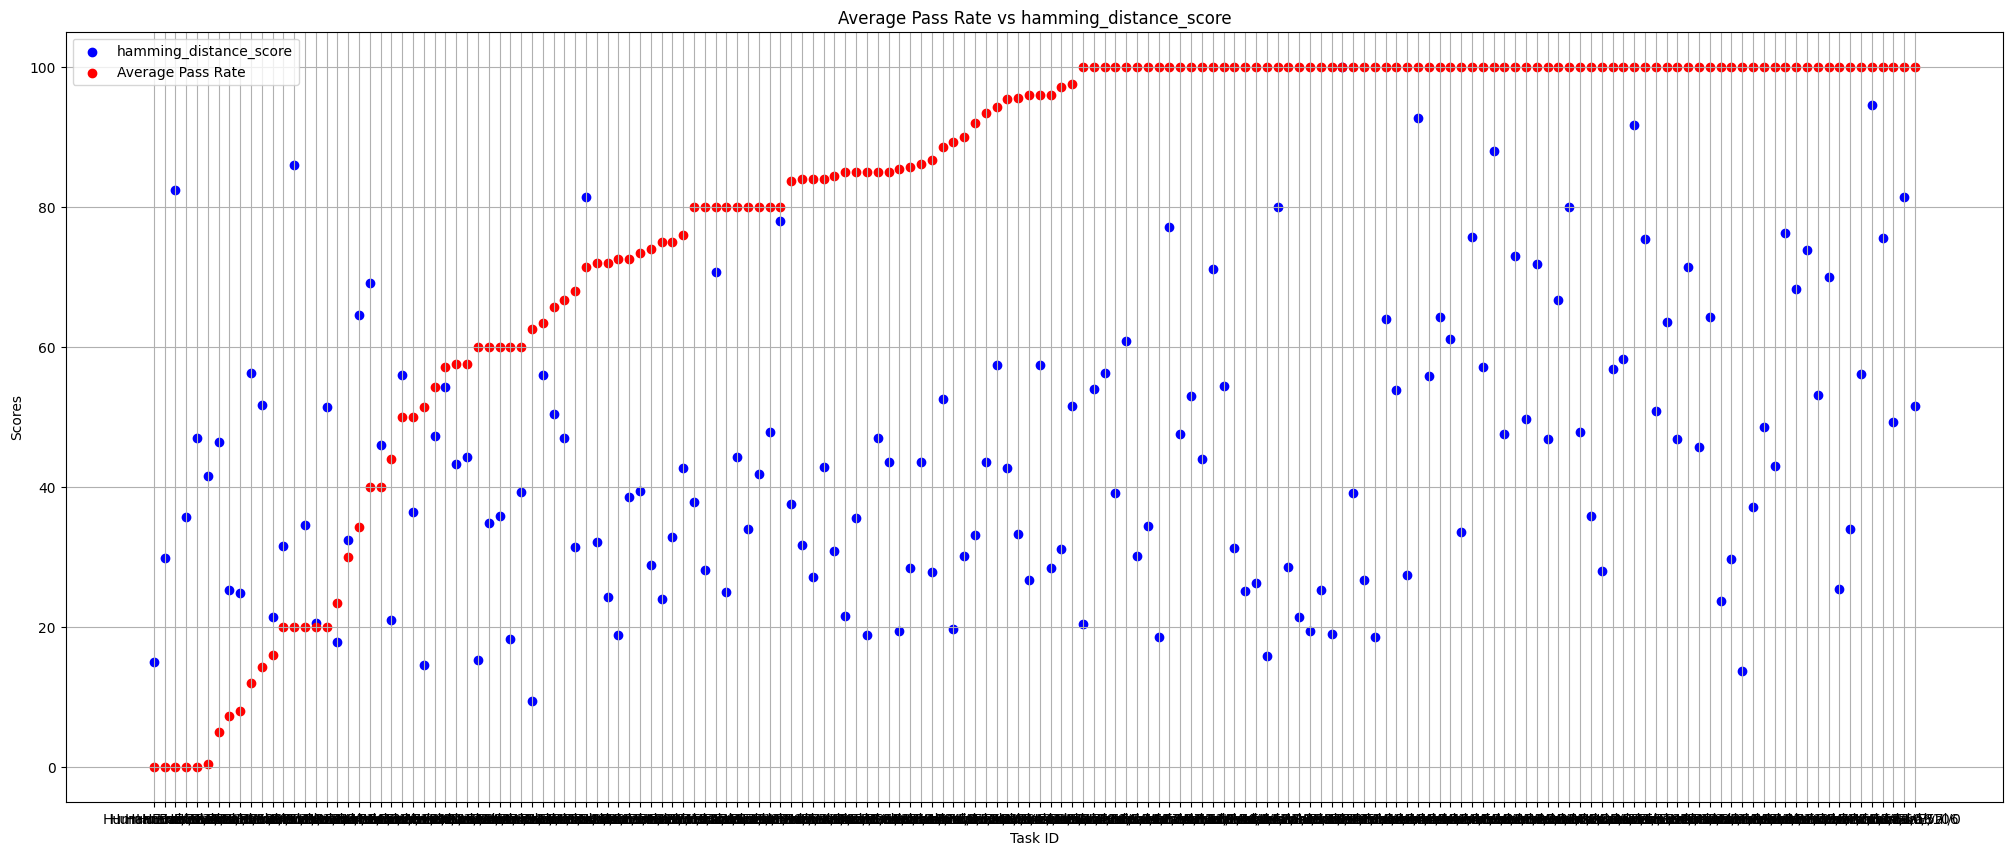

The correlation between the average pass rate and longest_common_subsequence is 0.21952587494966902


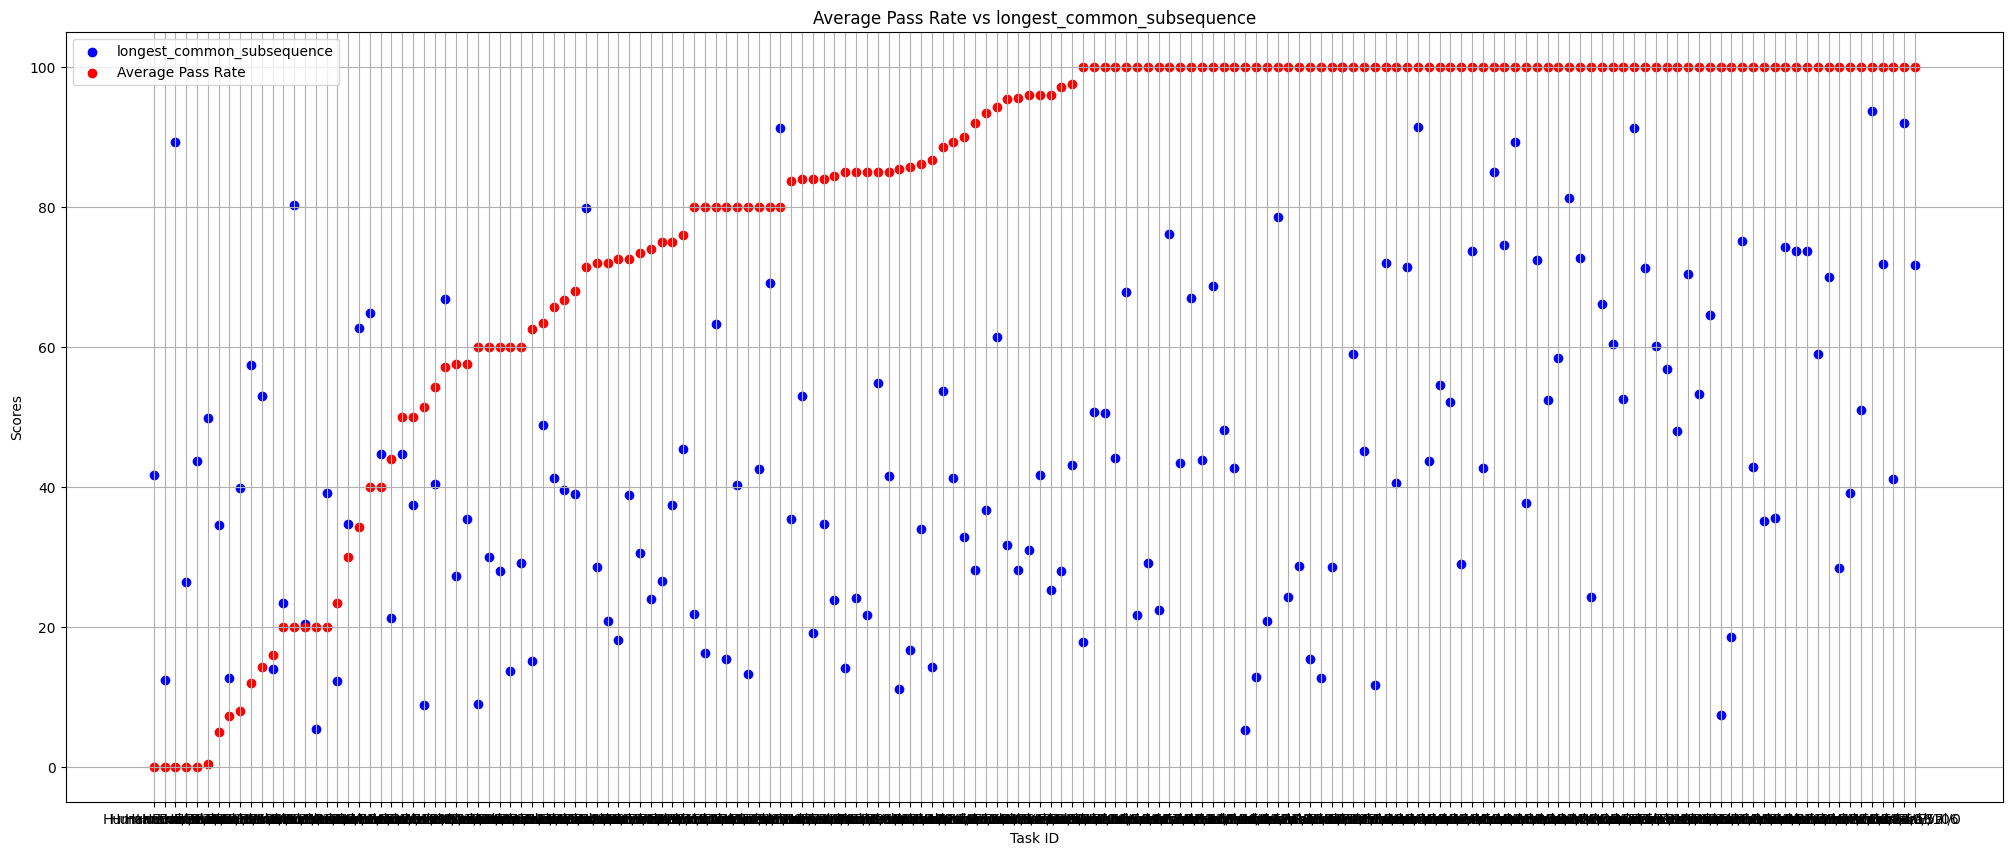

The correlation between the average pass rate and UnifiedDiff is 0.24683090629484394


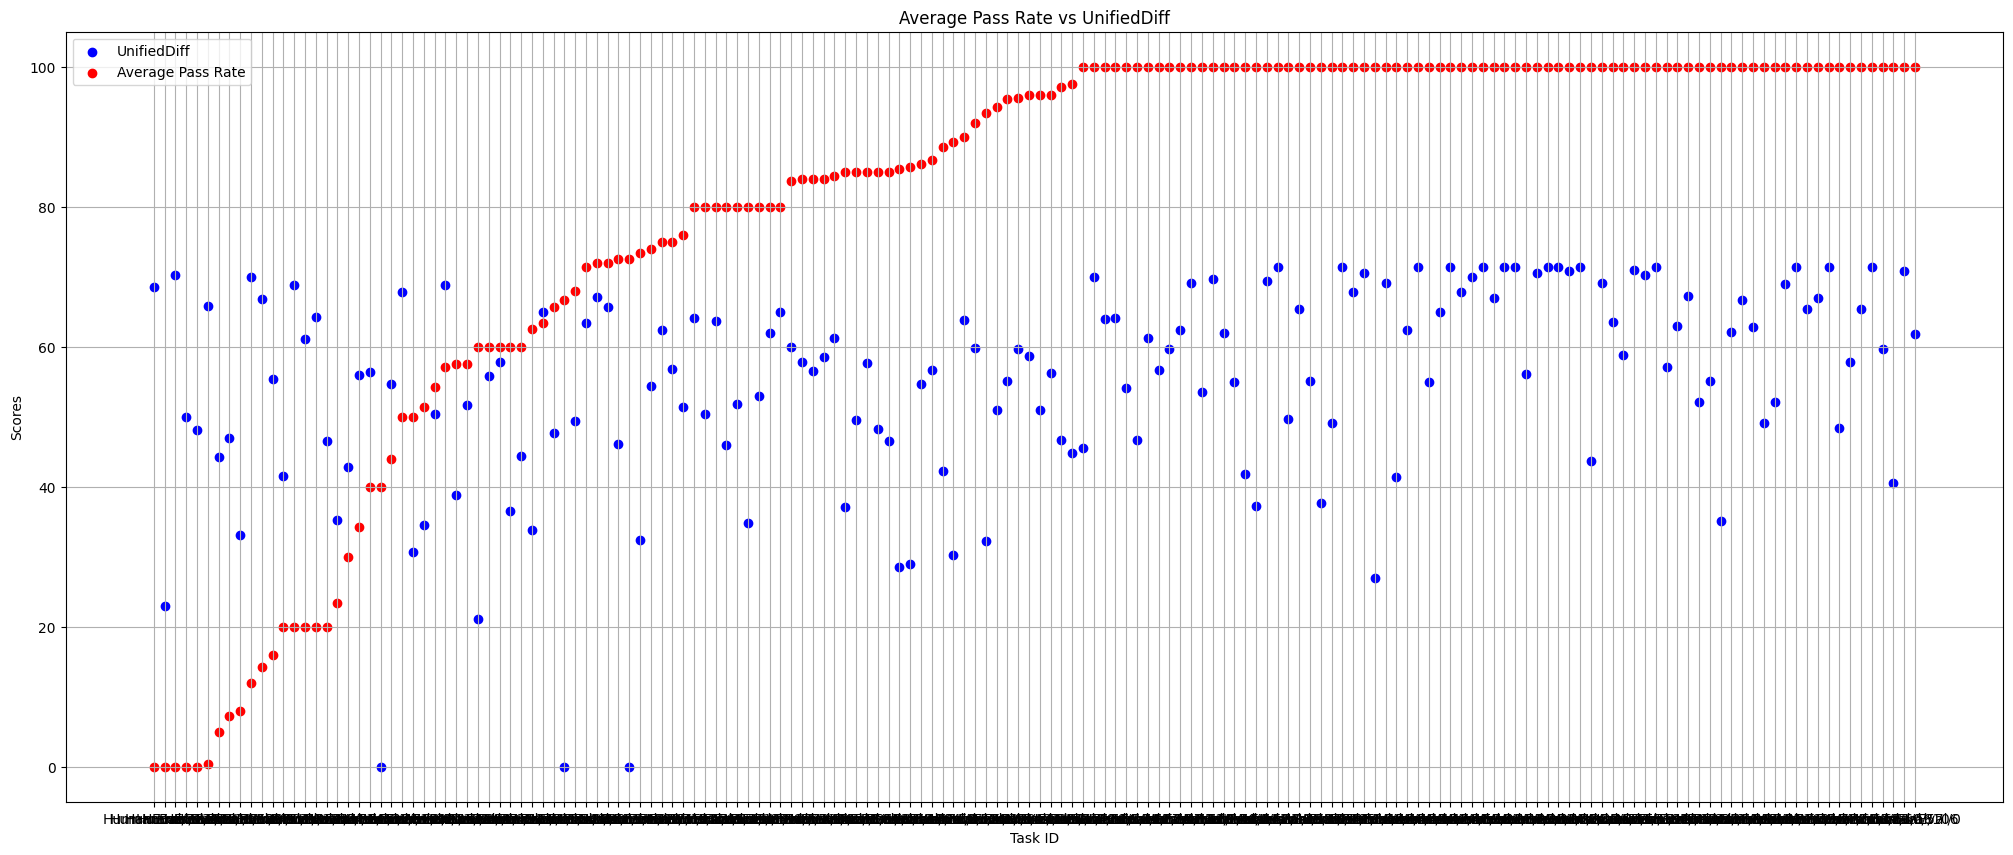

The correlation between the average pass rate and TreeDiff is 0.23539848303181404


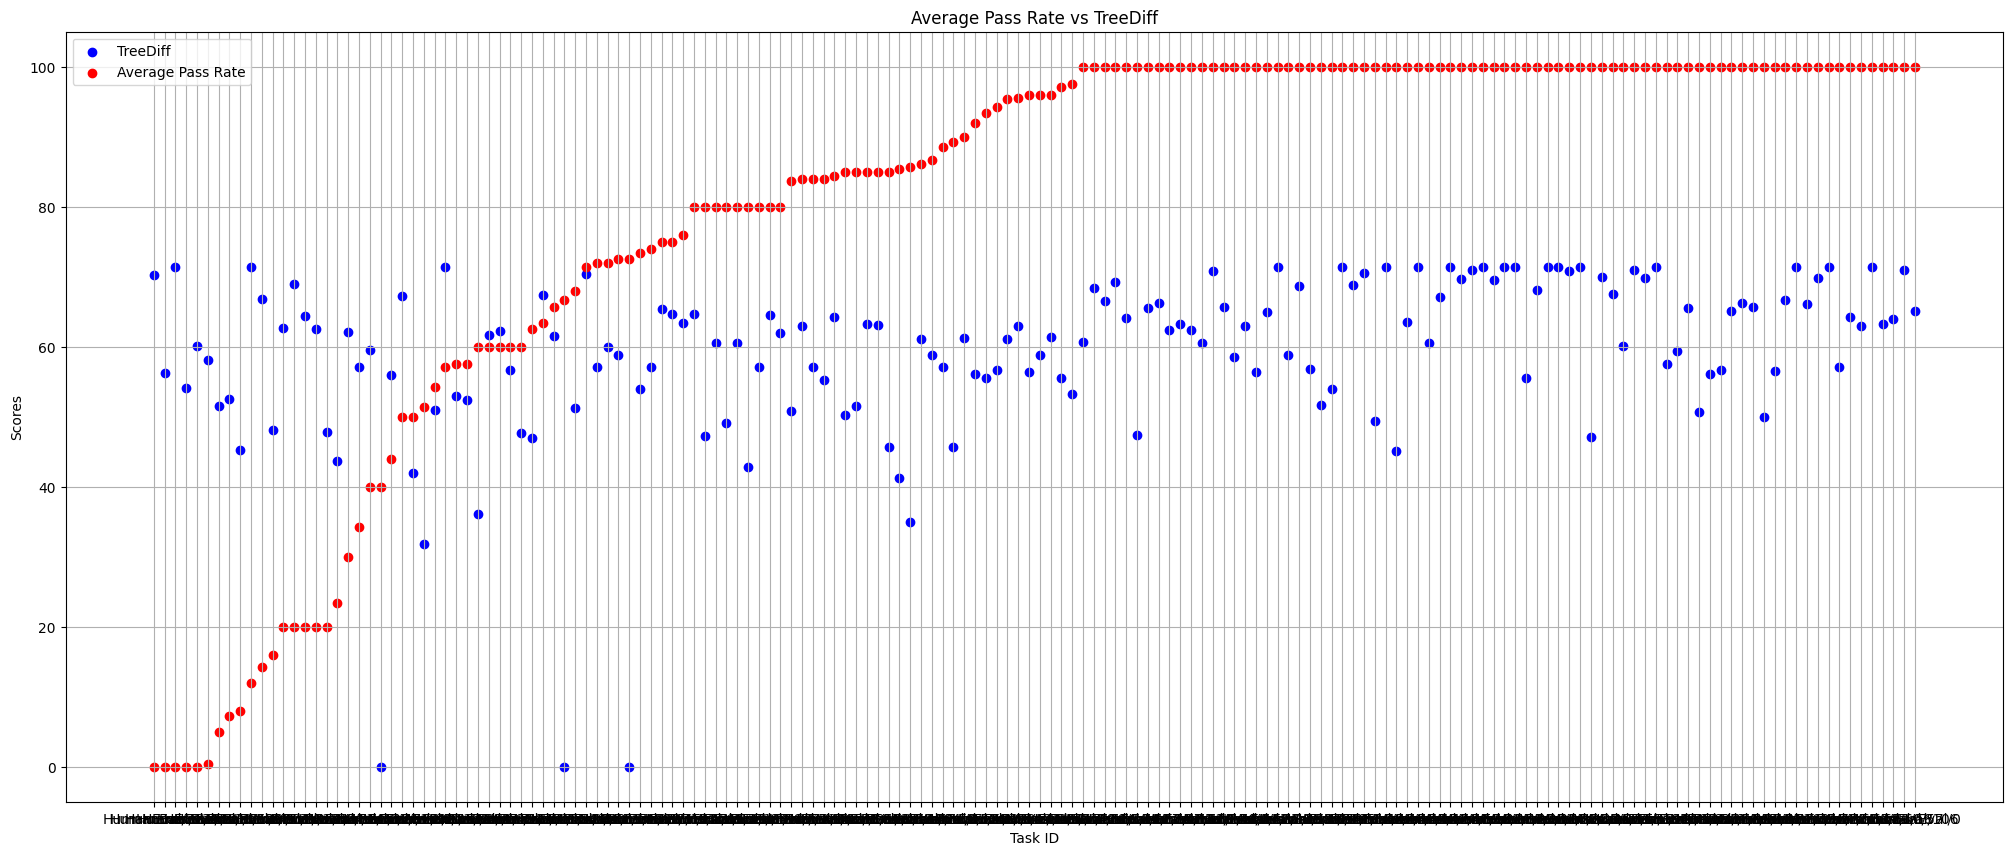

Visualizing the scores of the file  ./RESULTS/final scores/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_0_temps_1_trial_1_sim_score.csv  completed
--------------------------------------------------------------------
Visualizing the scores of the file  ./RESULTS/final scores/dataset_HumanEval_model_gpt-3.5-turbo_n_3_tempr_0_temps_1_trial_1_sim_score.csv
number of data points that has the avg pass rate = 100  0.5365853658536586
The correlation between the average pass rate and sequence_similarity is 0.25910447193490344


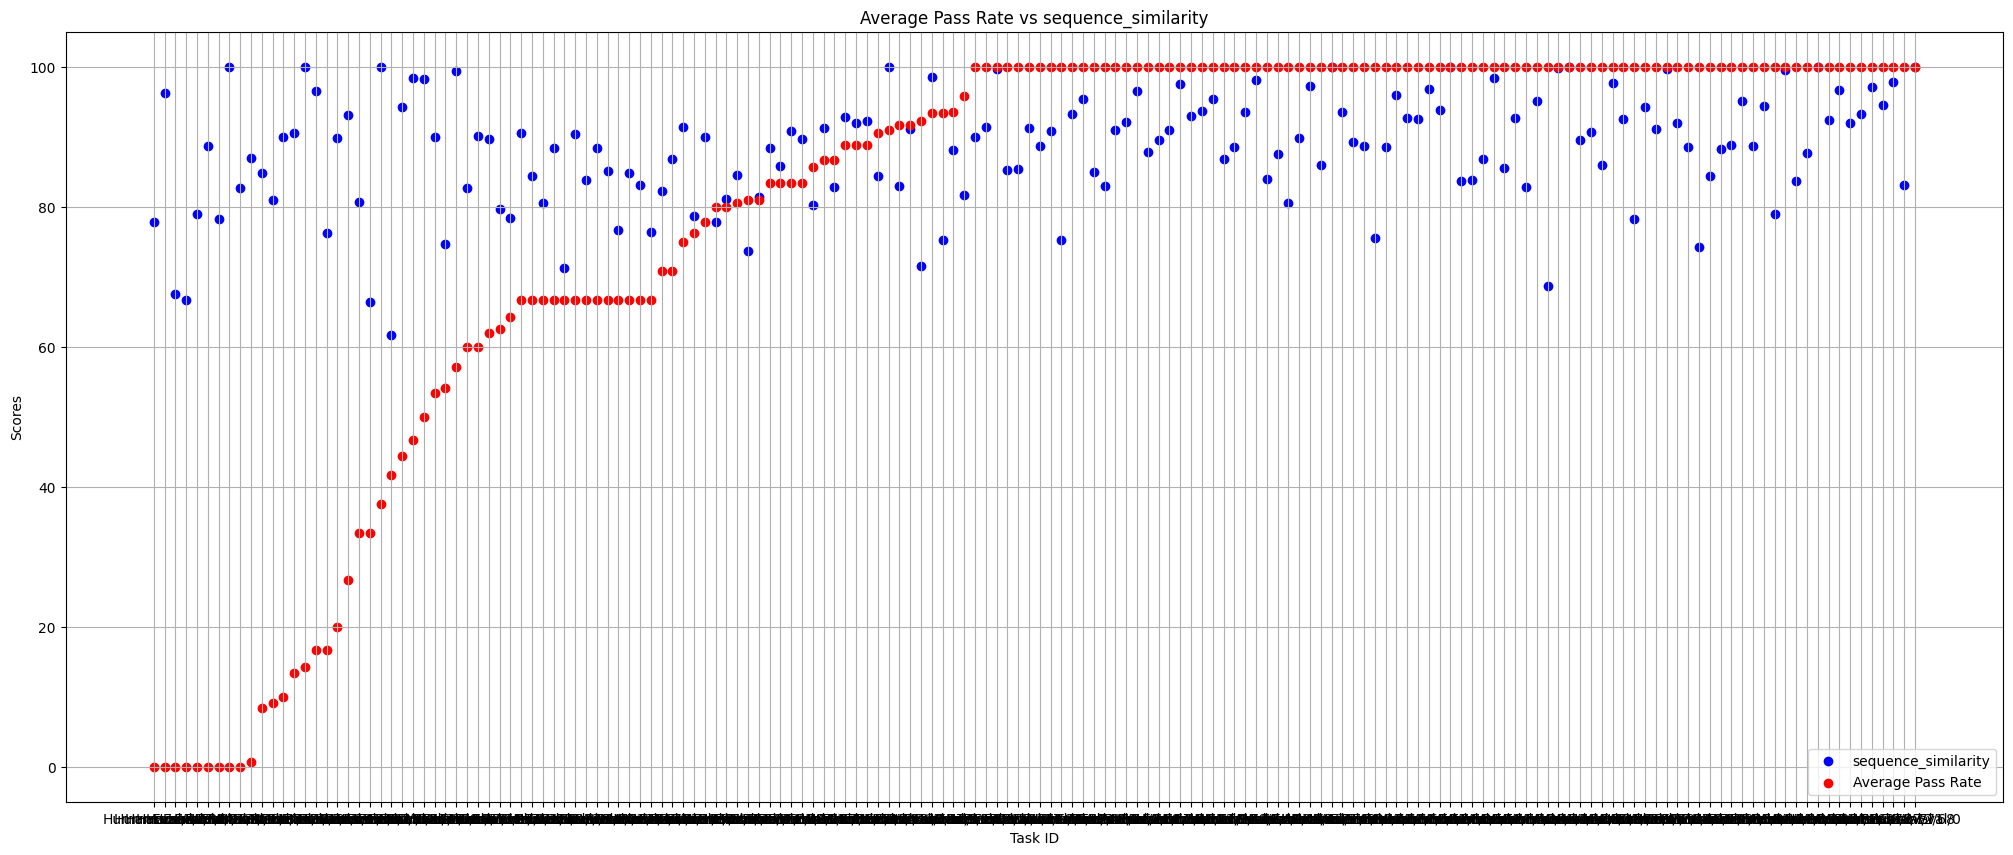

The correlation between the average pass rate and edit_distance_score is 0.21591465993682768


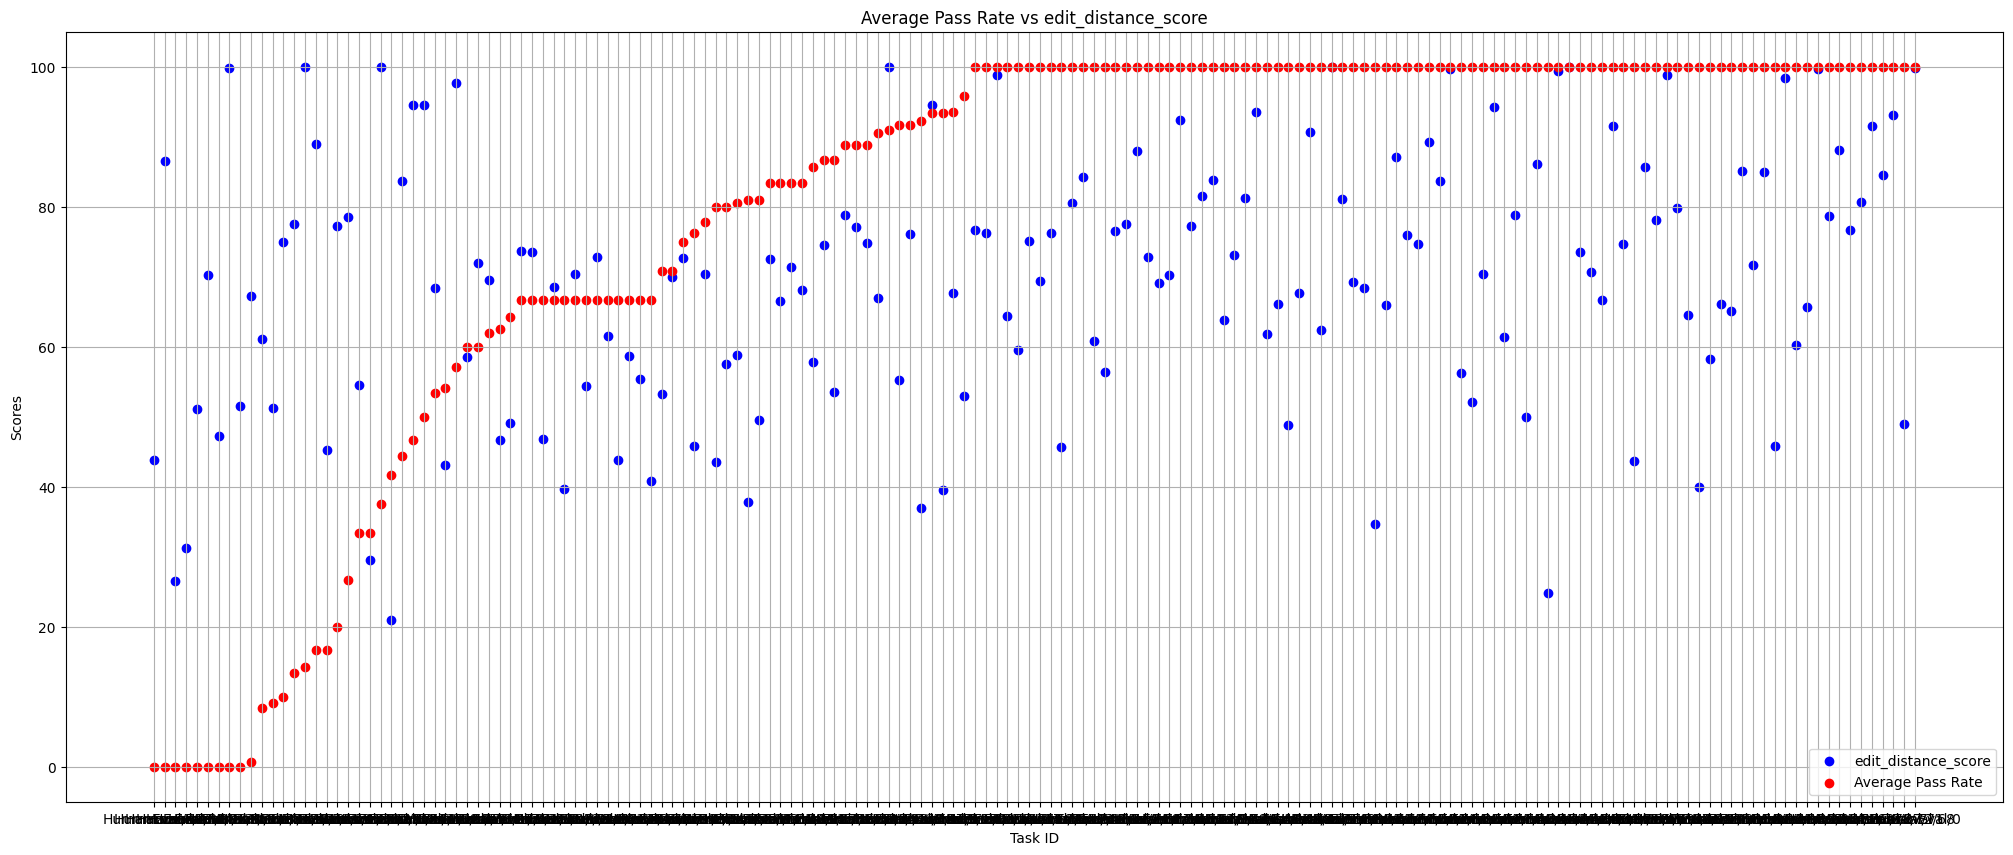

The correlation between the average pass rate and jaccard_similarity is 0.2032496926144744


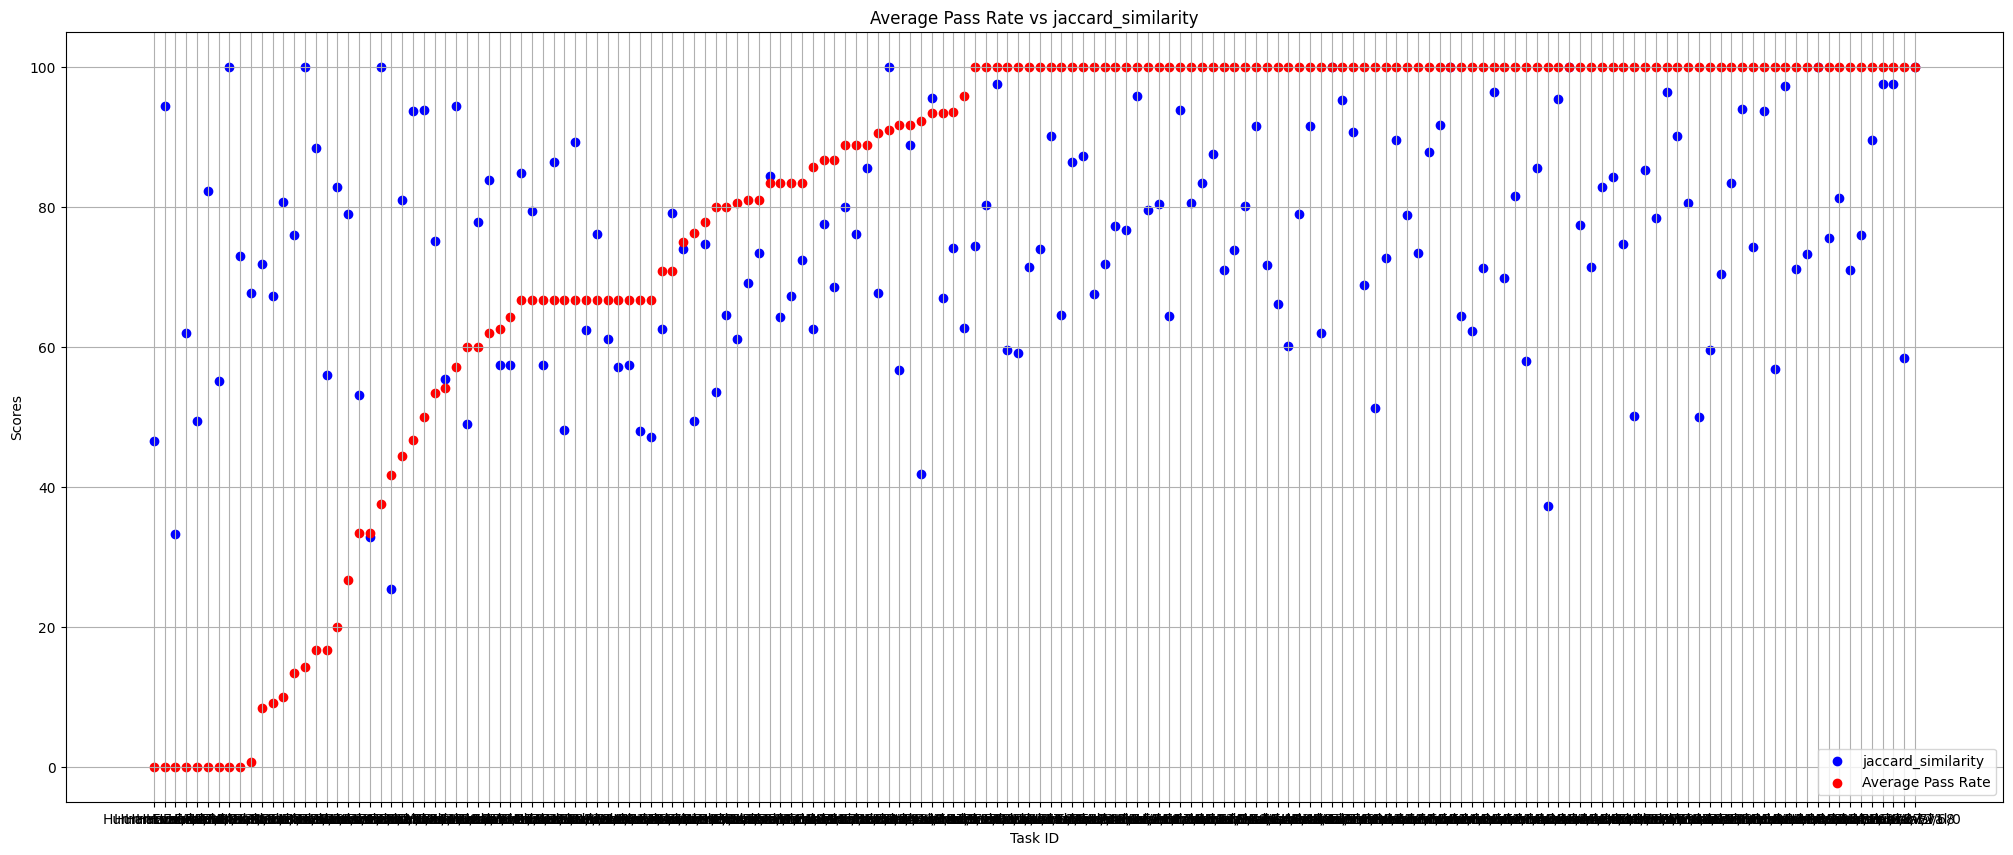

The correlation between the average pass rate and cosine_similarity_score is 0.16599824098610172


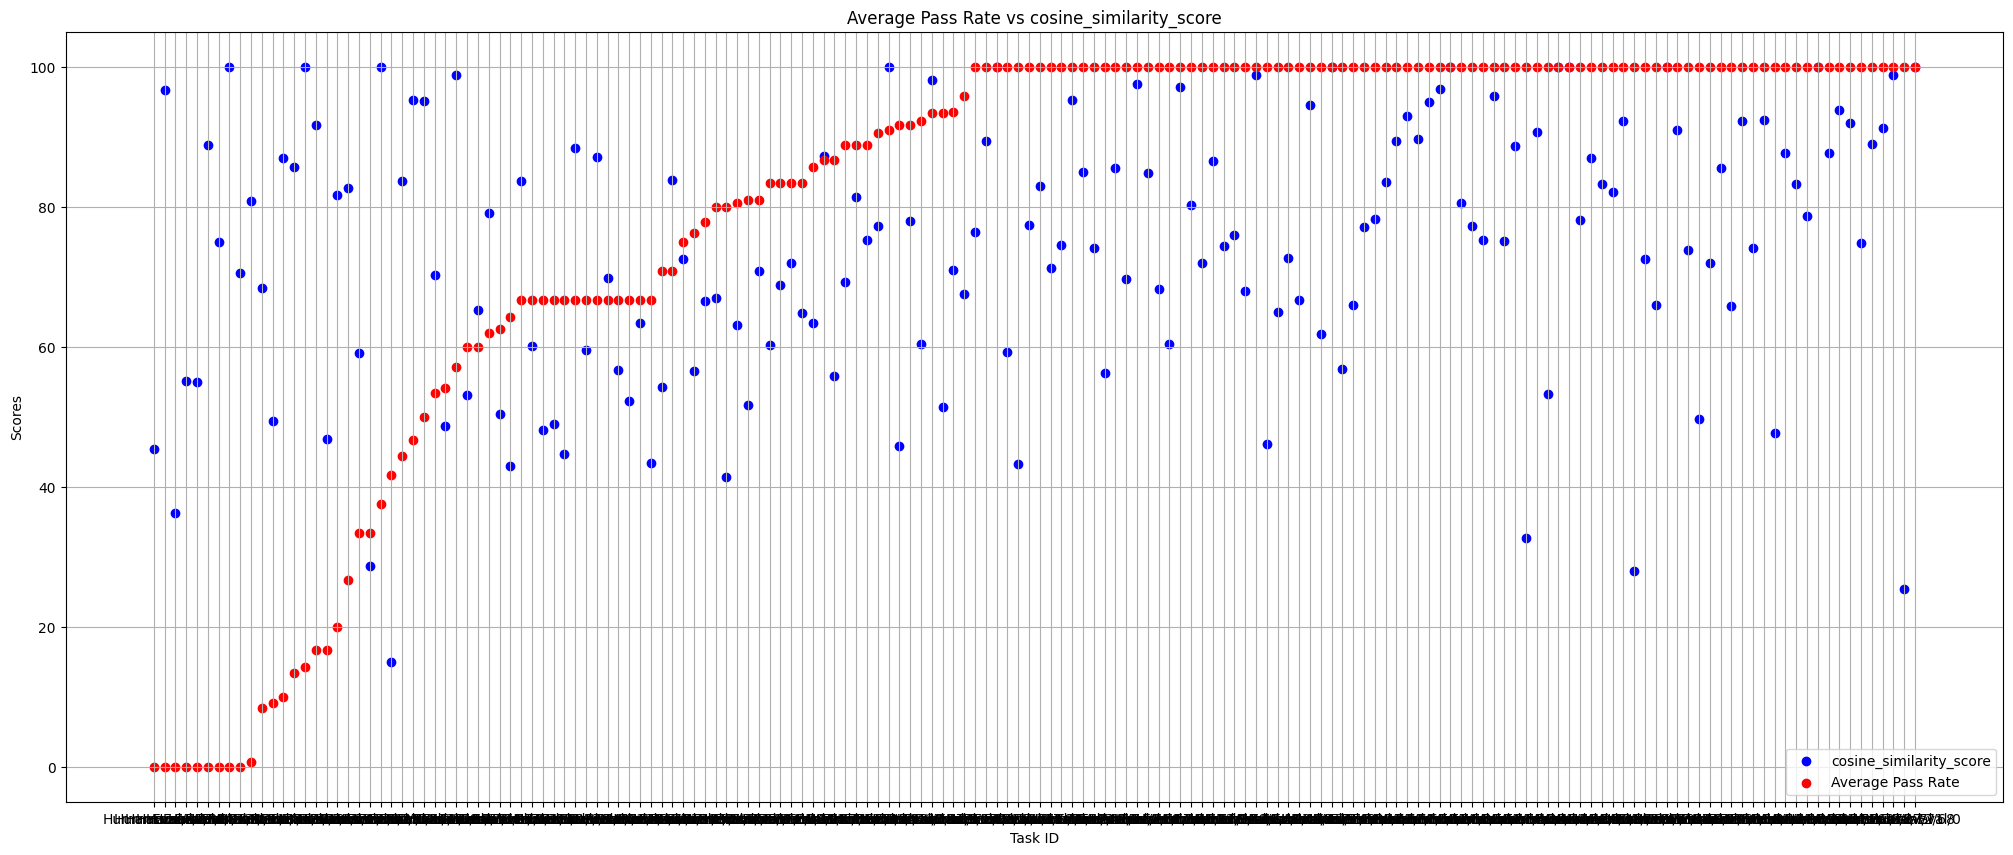

The correlation between the average pass rate and sorensen_dice_coefficient is 0.10243830151652214


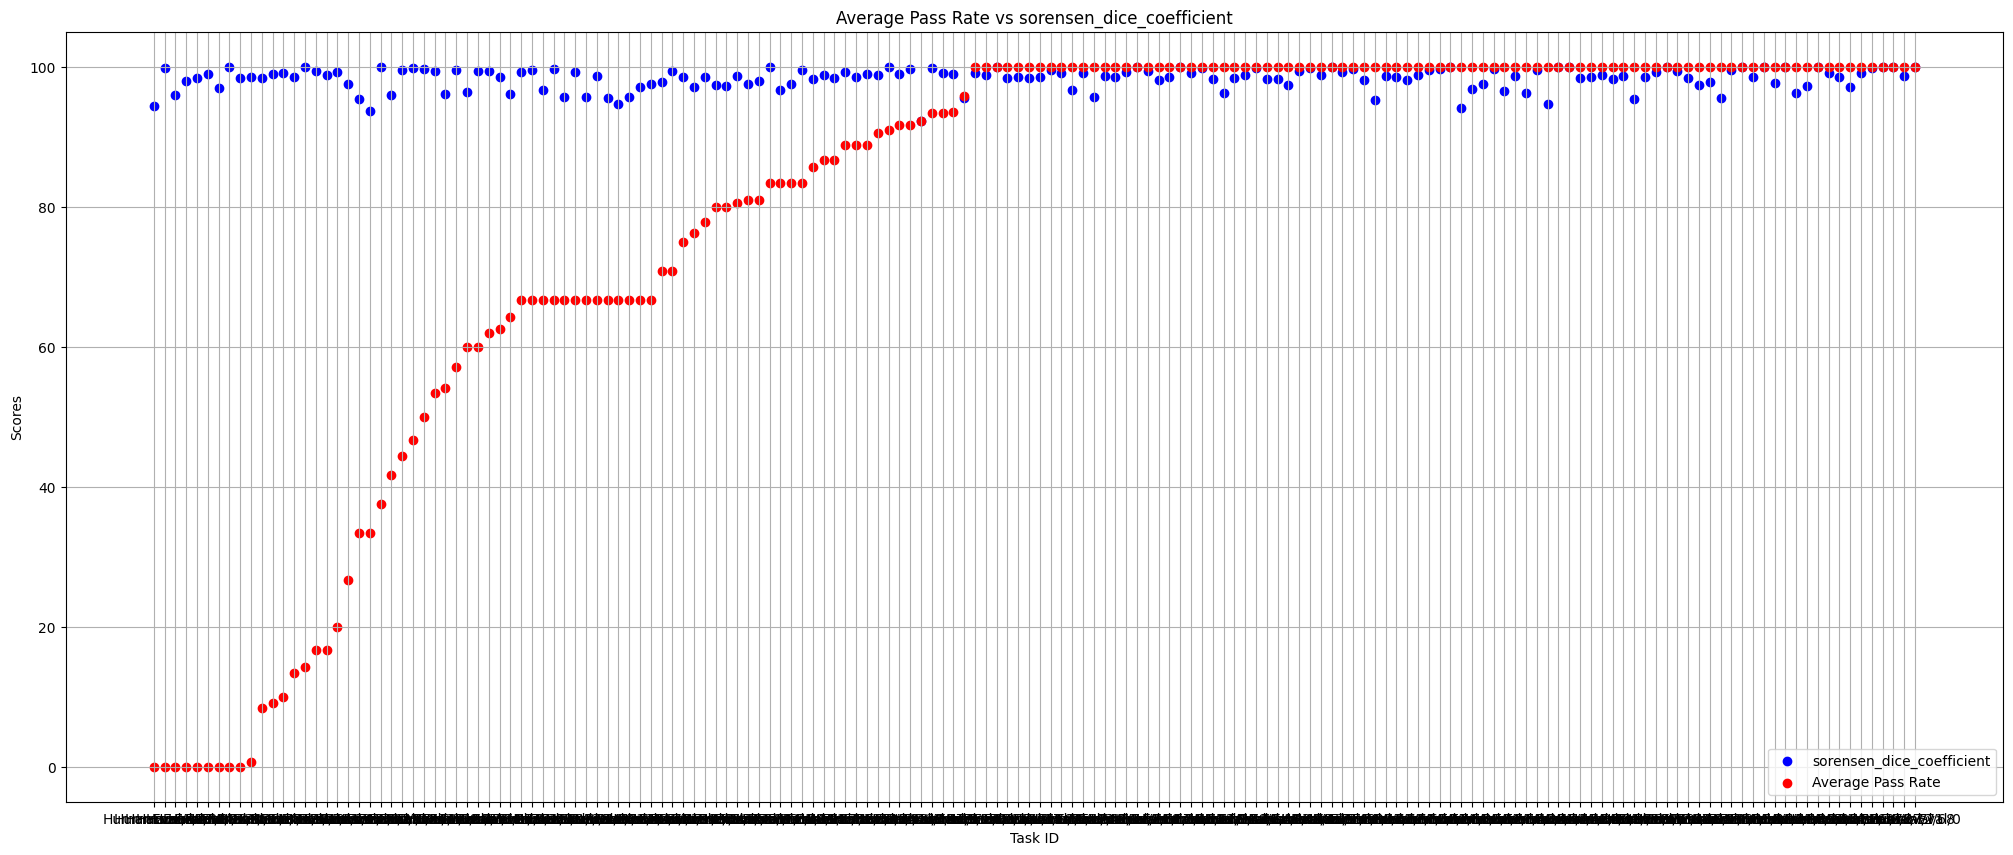

The correlation between the average pass rate and hamming_distance_score is 0.07700811302053269


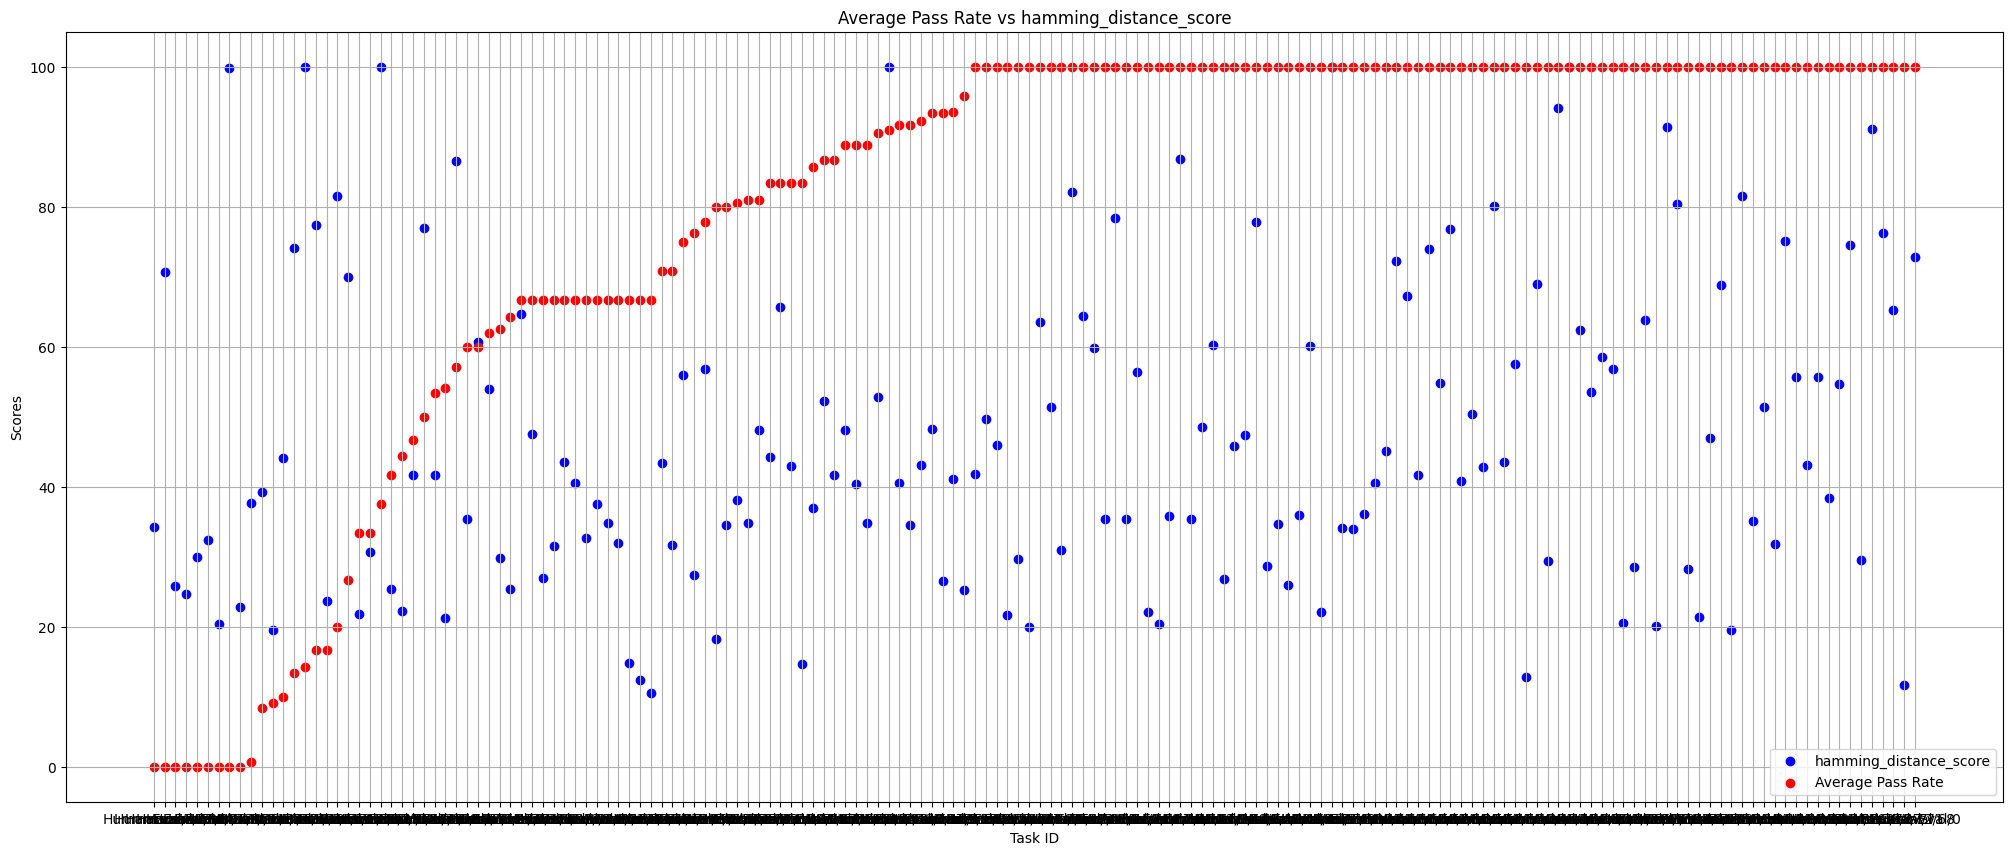

The correlation between the average pass rate and longest_common_subsequence is 0.13893006347122905


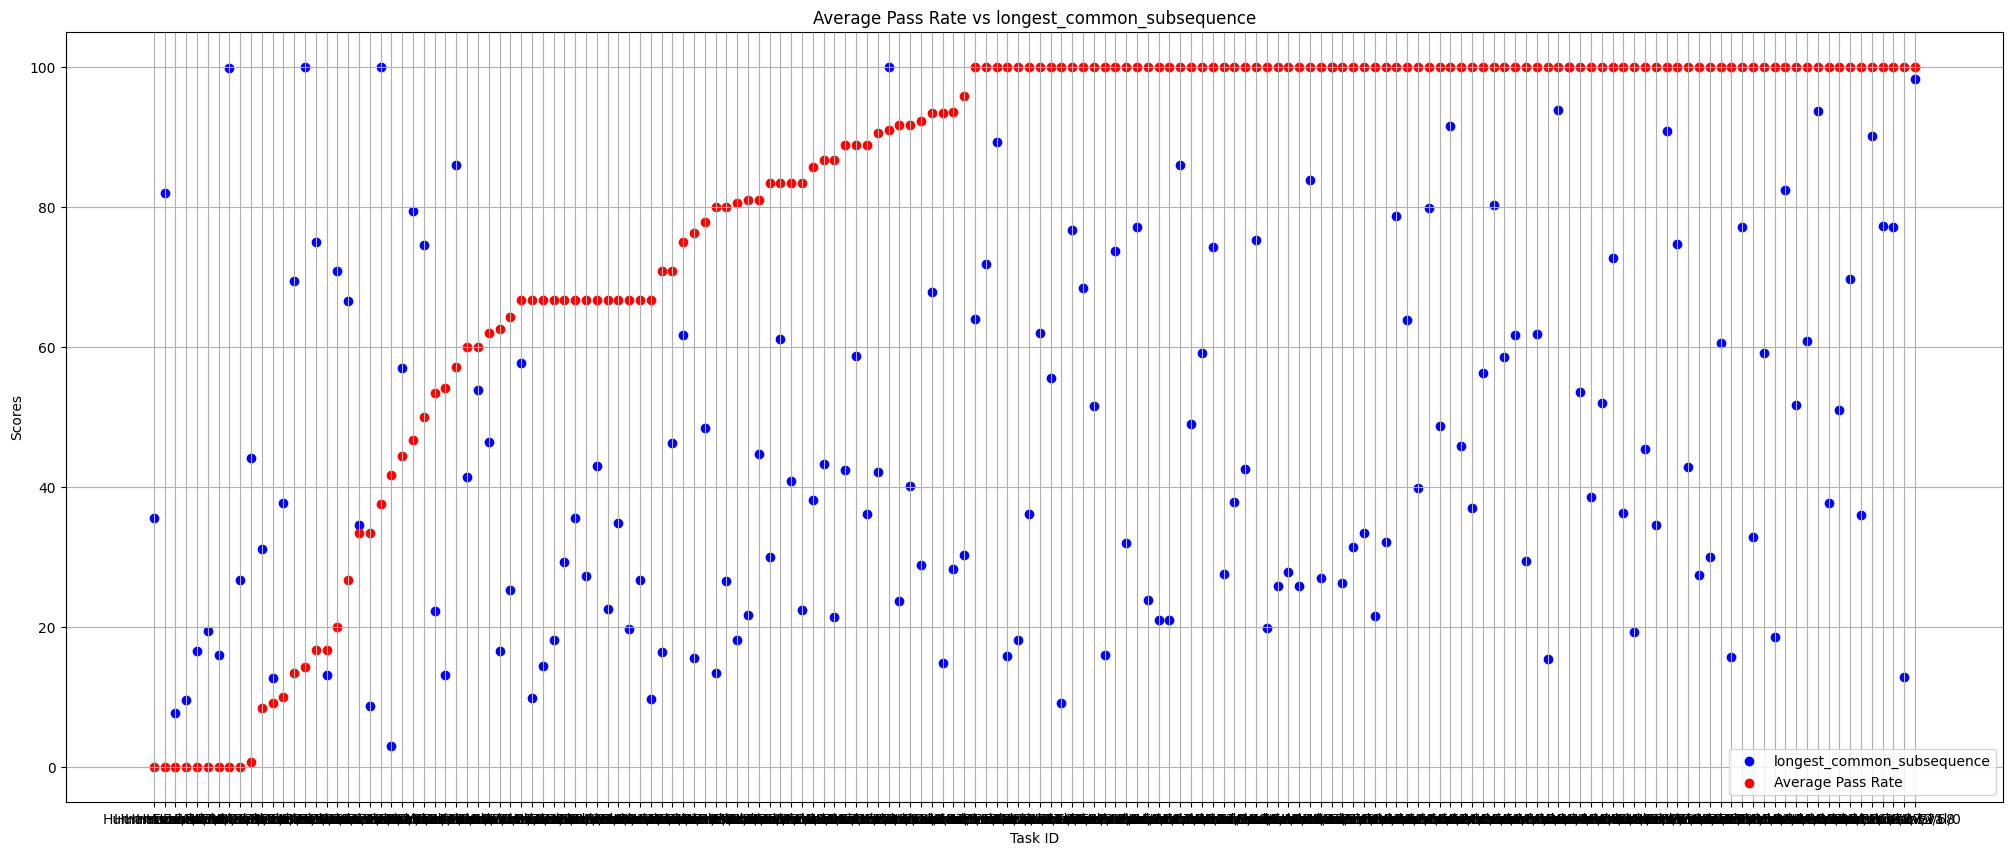

The correlation between the average pass rate and UnifiedDiff is 0.2901988914400519


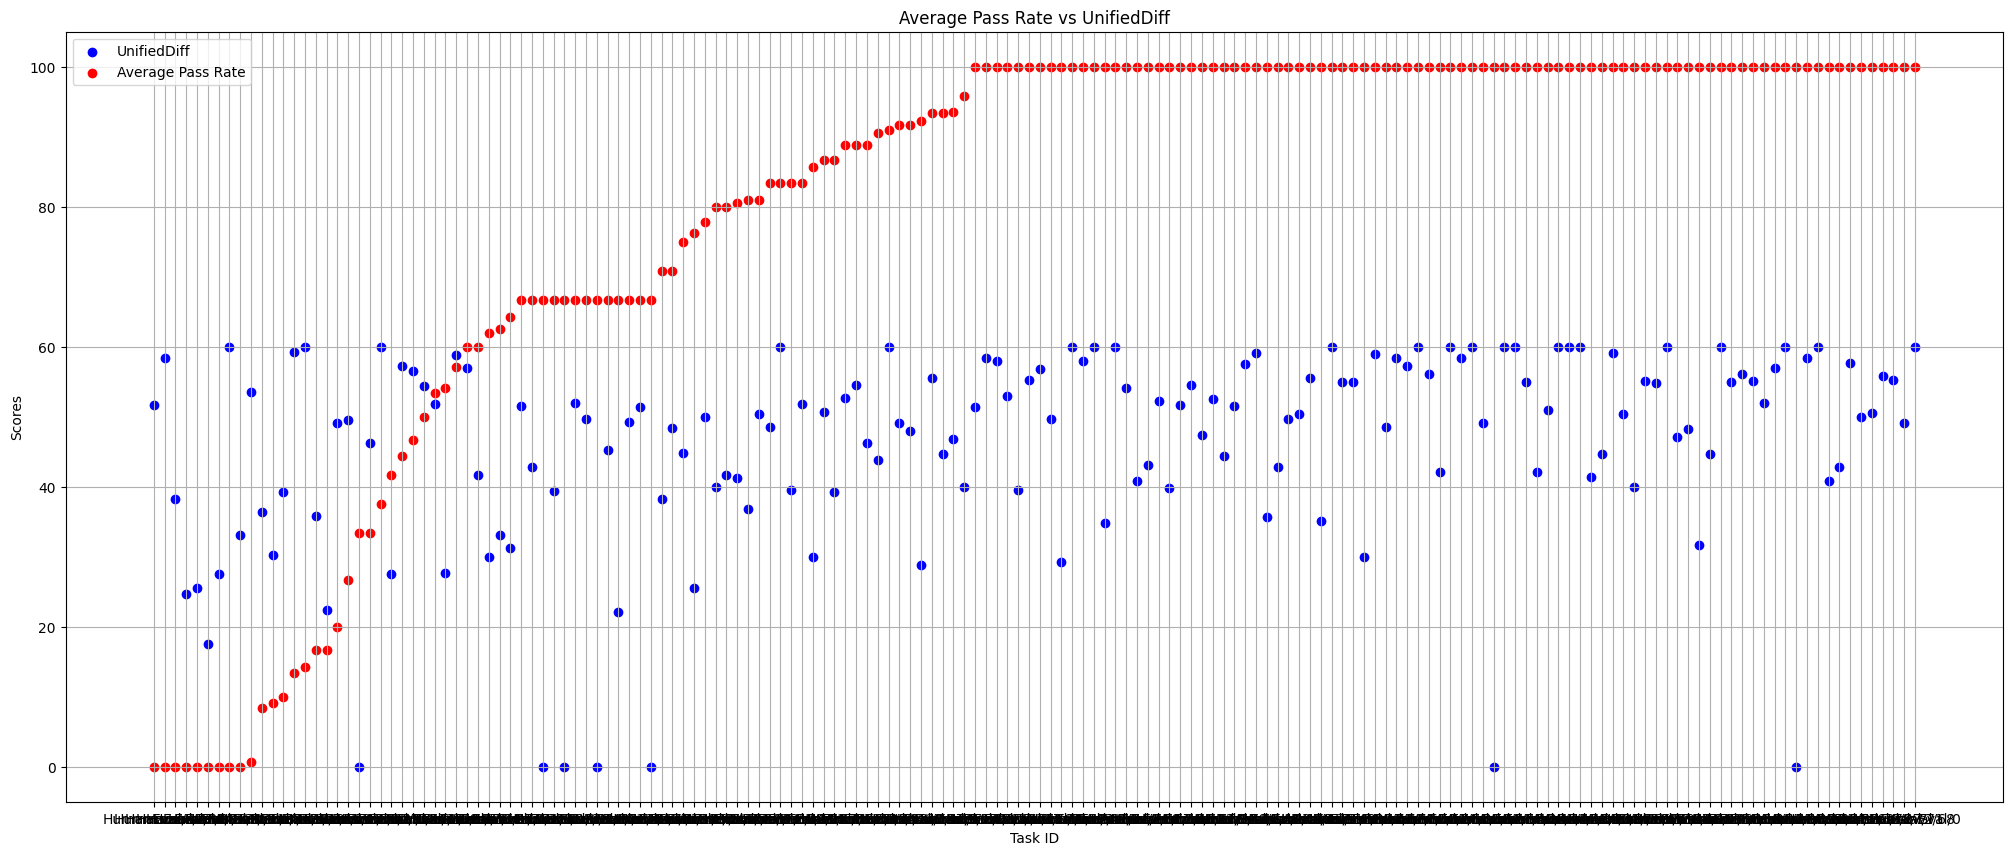

The correlation between the average pass rate and TreeDiff is 0.21637541103729827


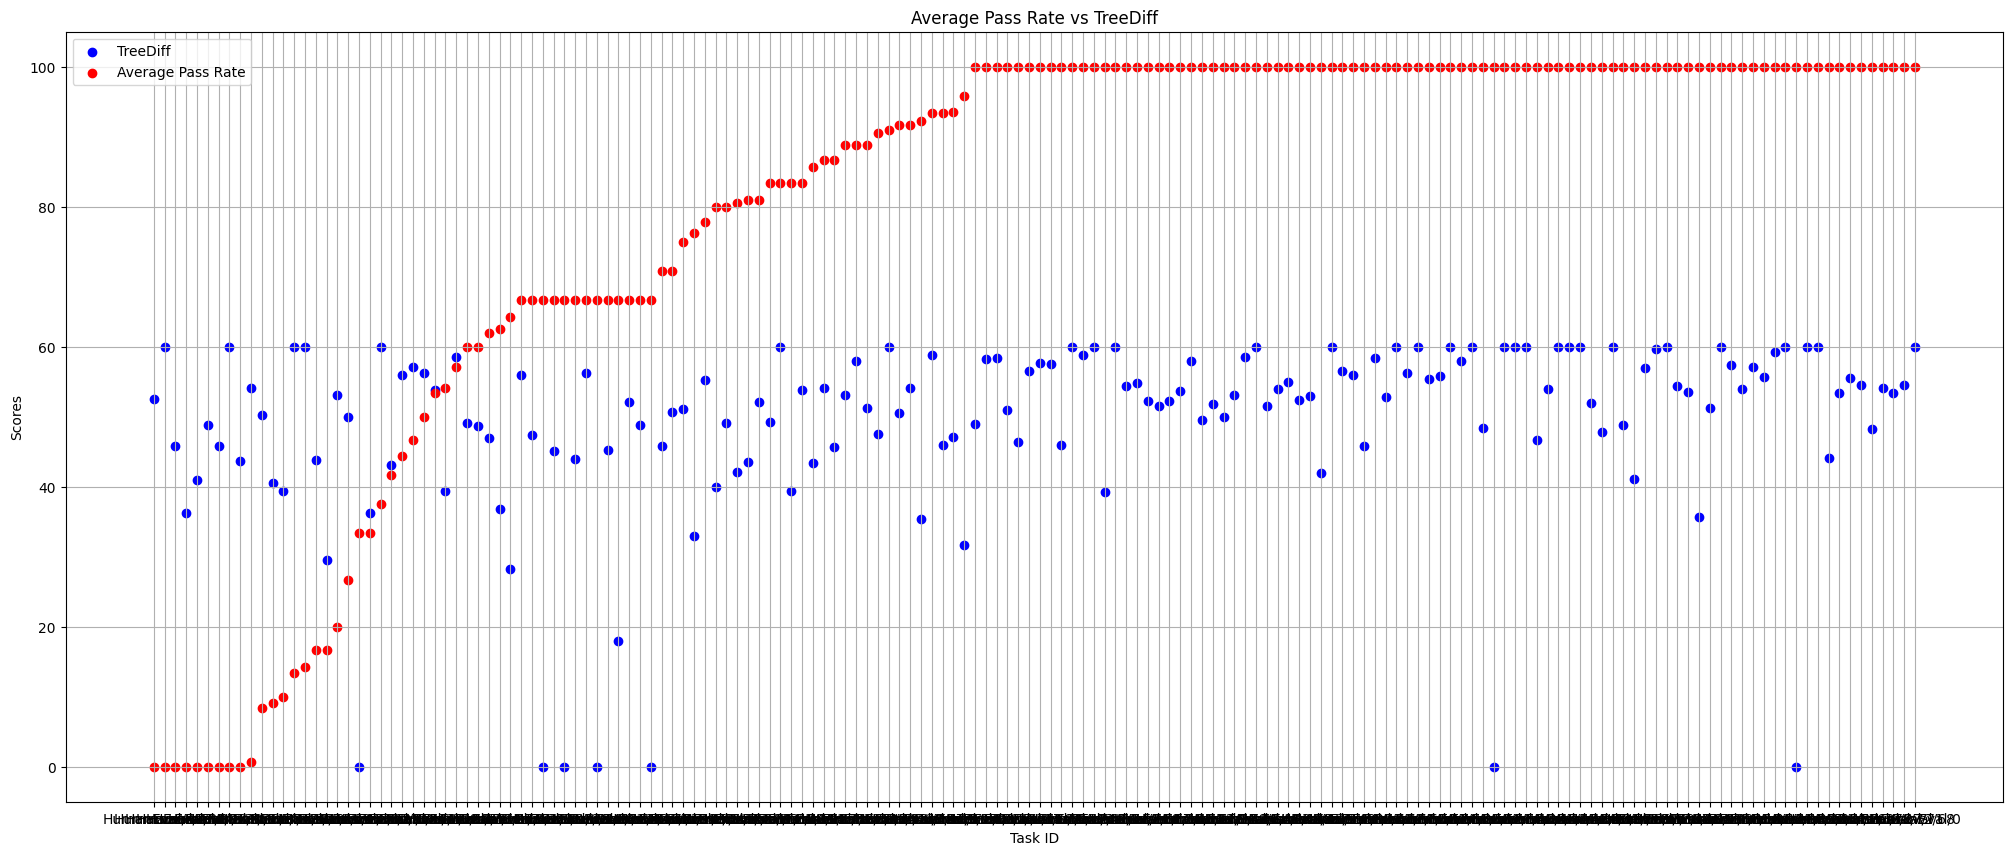

Visualizing the scores of the file  ./RESULTS/final scores/dataset_HumanEval_model_gpt-3.5-turbo_n_3_tempr_0_temps_1_trial_1_sim_score.csv  completed
--------------------------------------------------------------------
Visualizing the scores of the file  ./RESULTS/final scores/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_0_temps_1.5_trial_1_sim_score.csv
number of data points that has the avg pass rate = 100  0.2804878048780488
The correlation between the average pass rate and sequence_similarity is 0.46572716701775757


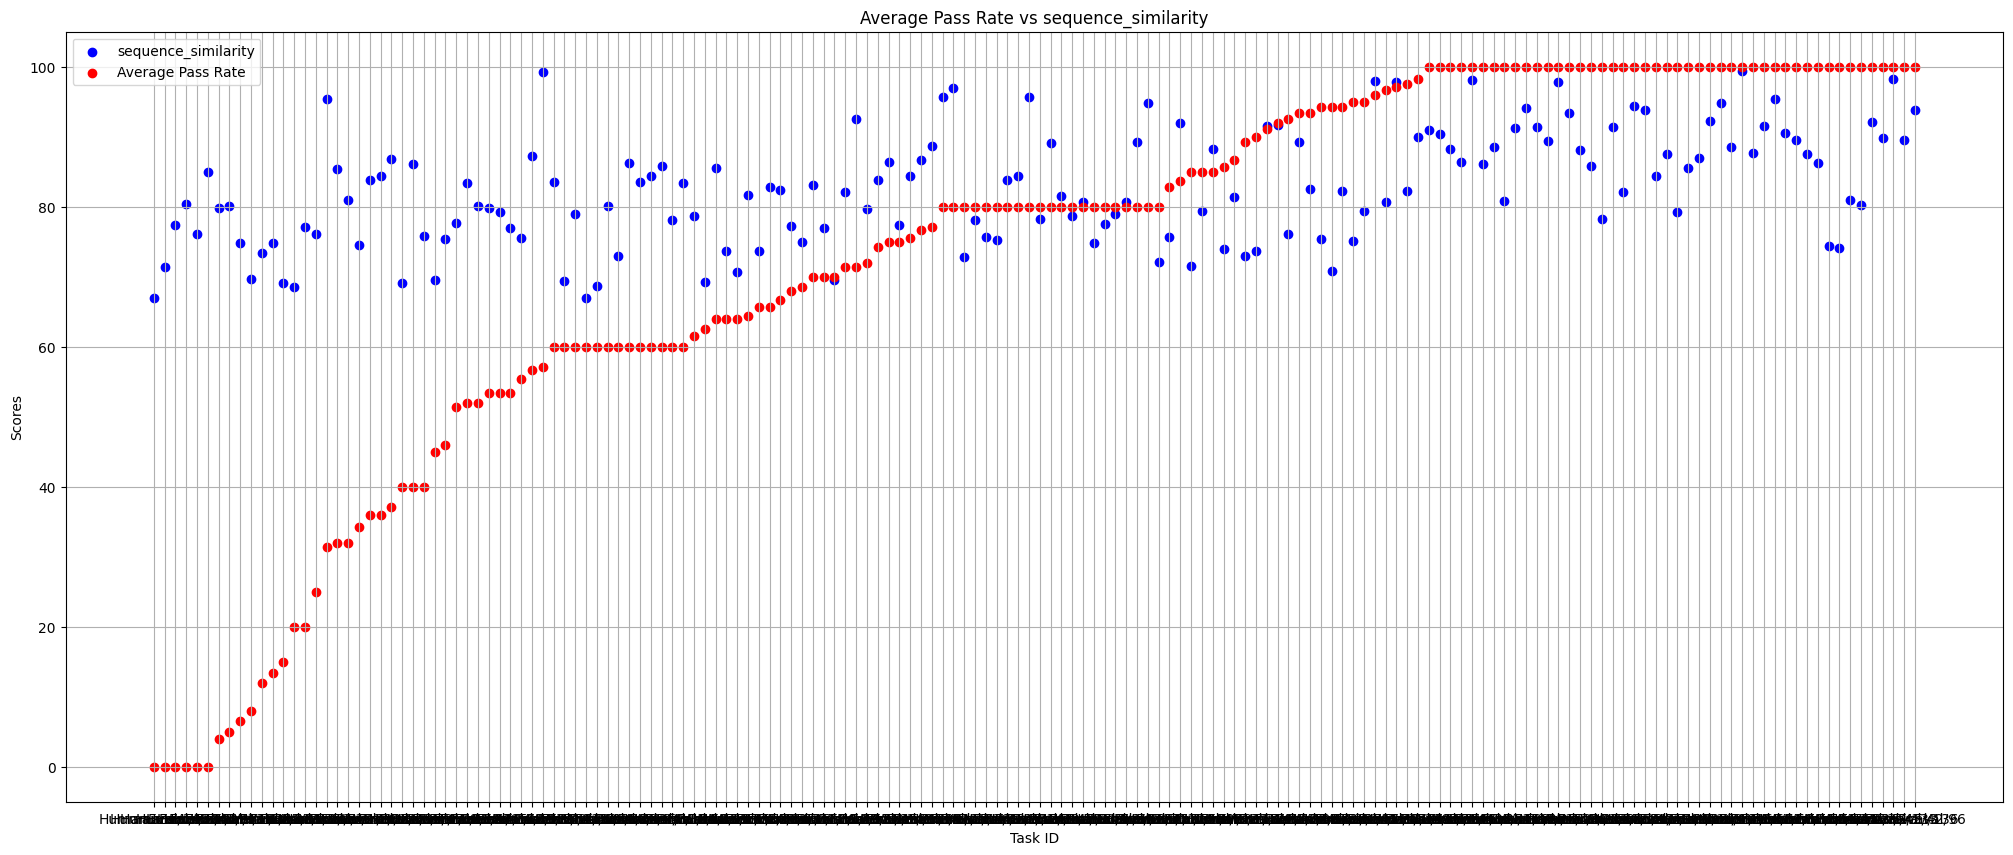

The correlation between the average pass rate and edit_distance_score is 0.4133225945396613


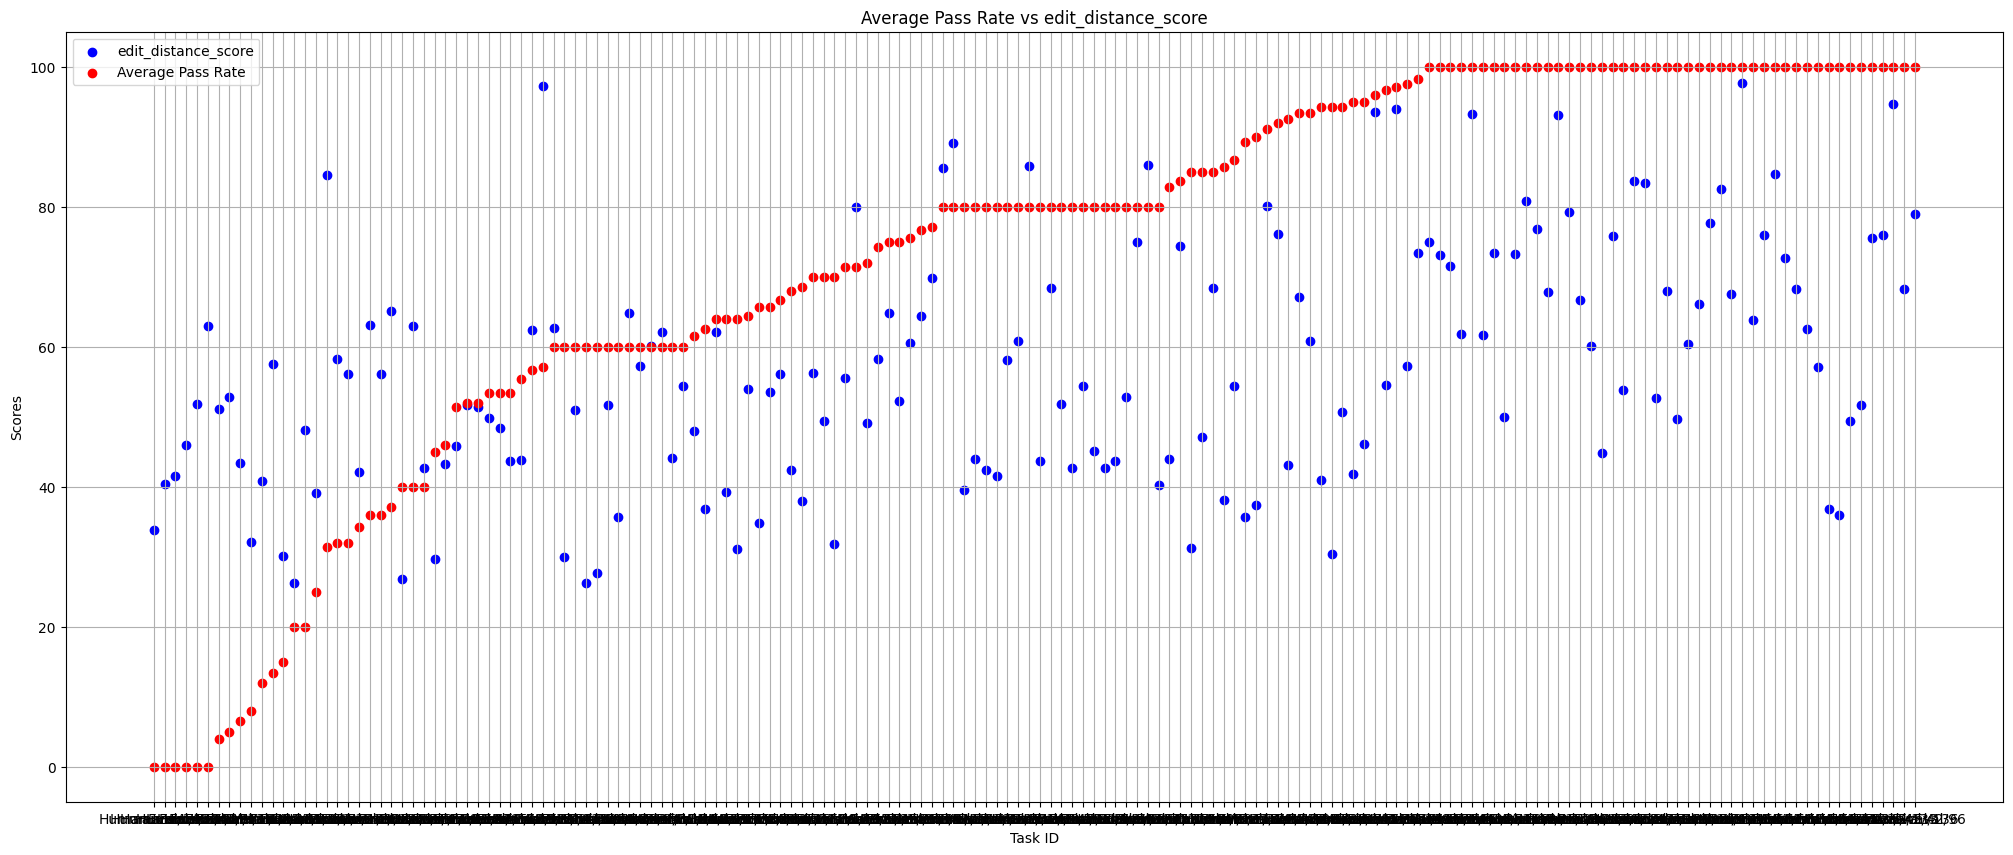

The correlation between the average pass rate and jaccard_similarity is 0.3873538161800963


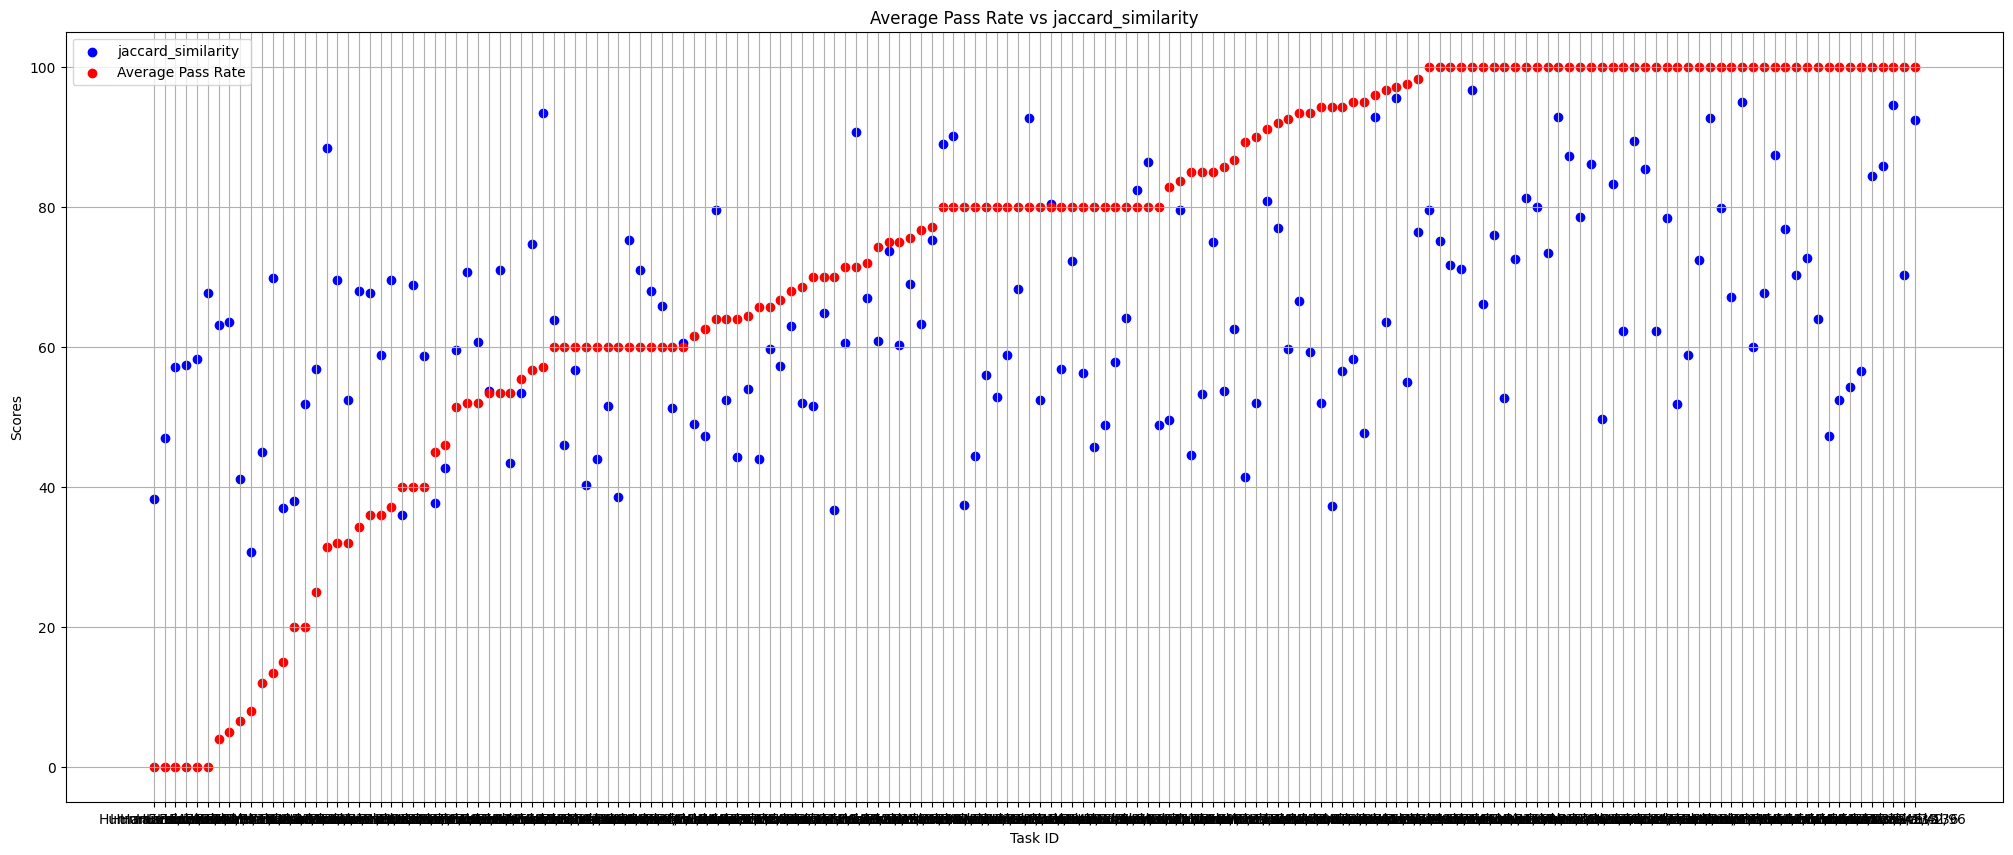

The correlation between the average pass rate and cosine_similarity_score is 0.41522714707517955


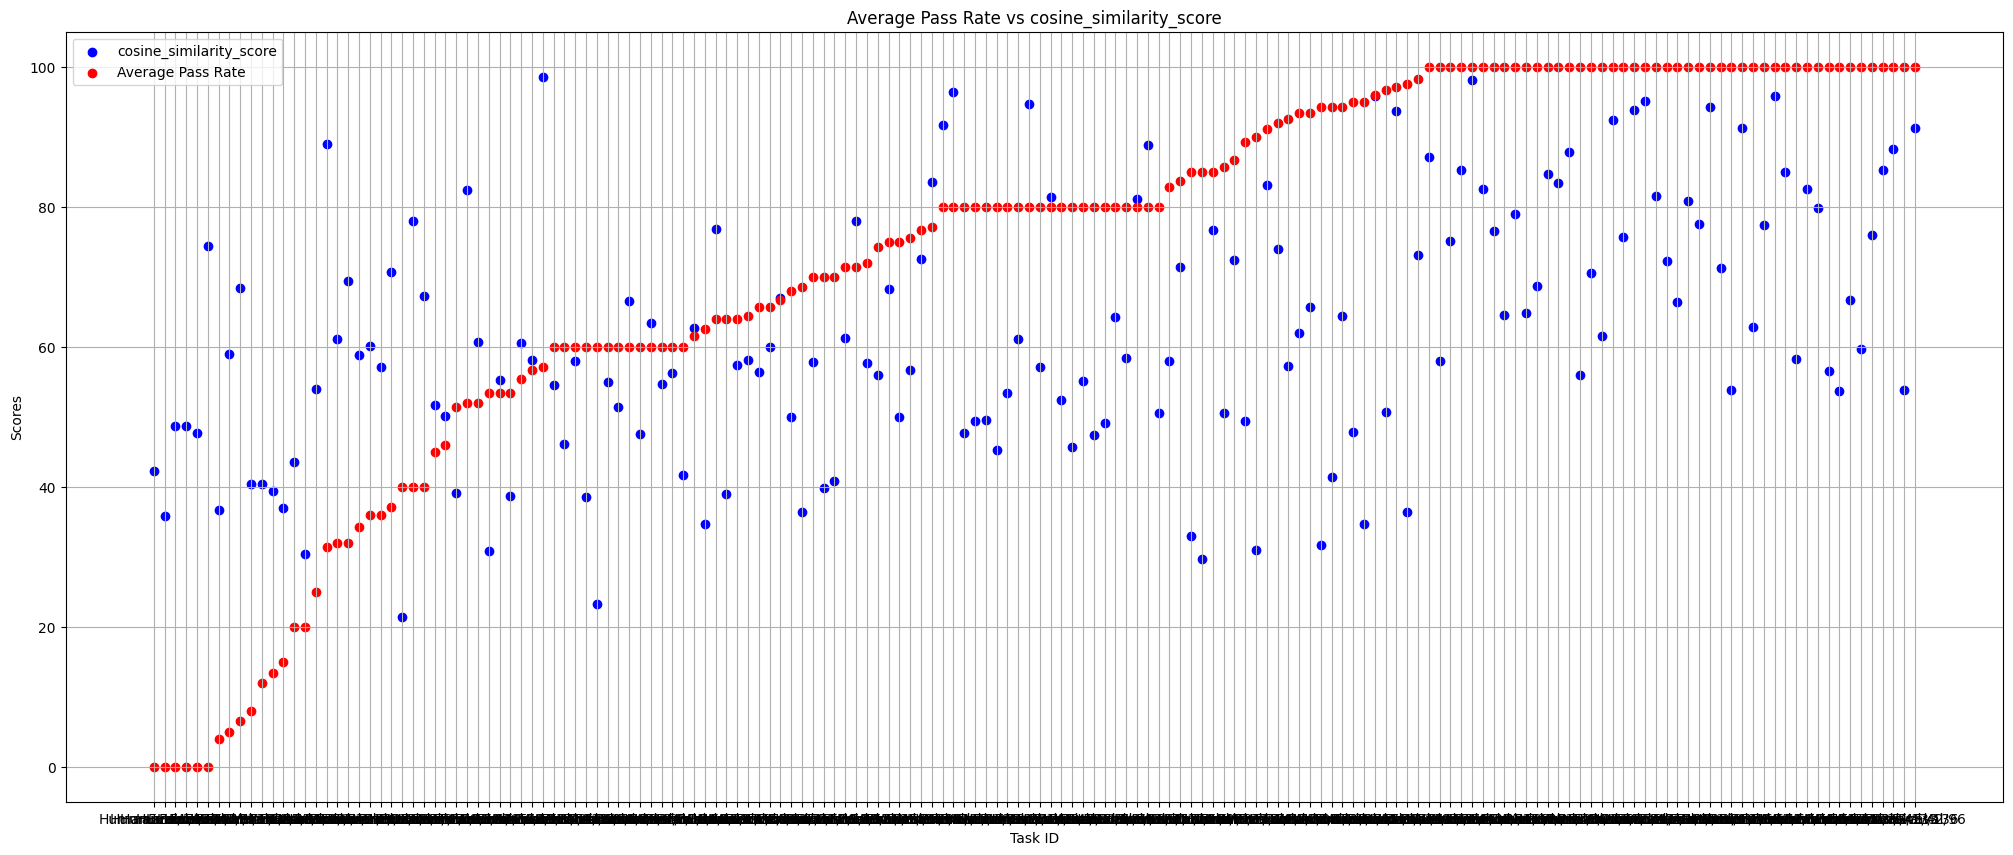

The correlation between the average pass rate and sorensen_dice_coefficient is 0.25380320092509806


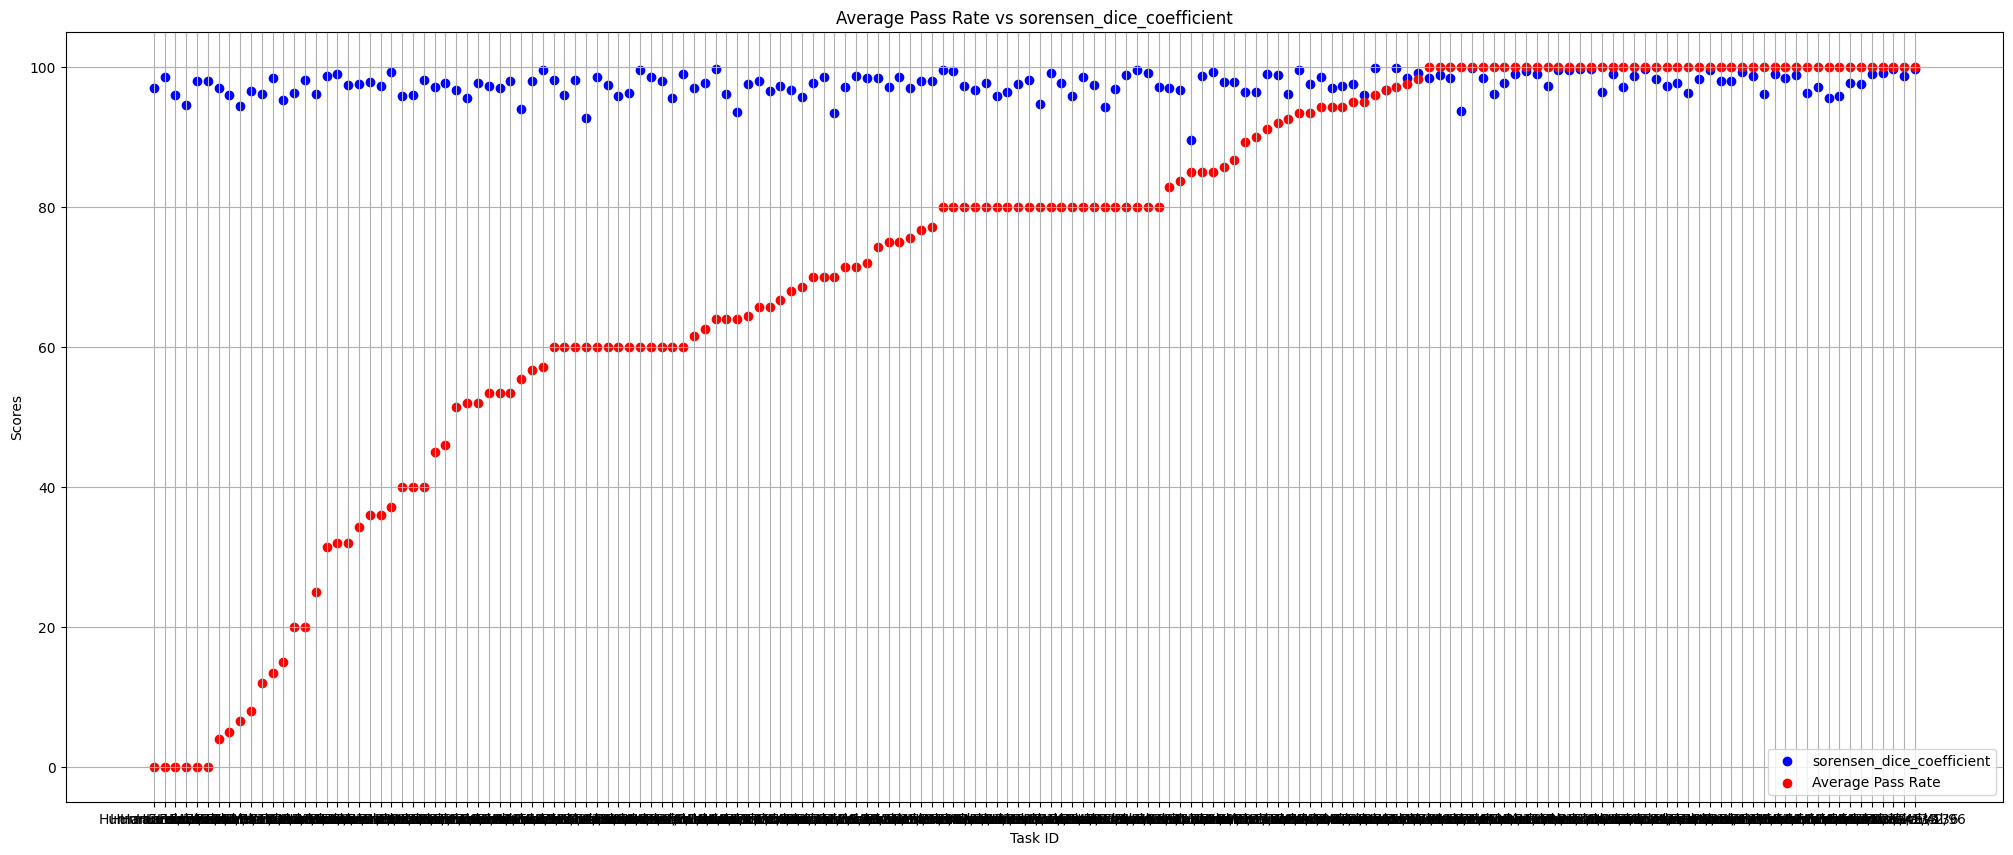

The correlation between the average pass rate and hamming_distance_score is 0.2788020349831514


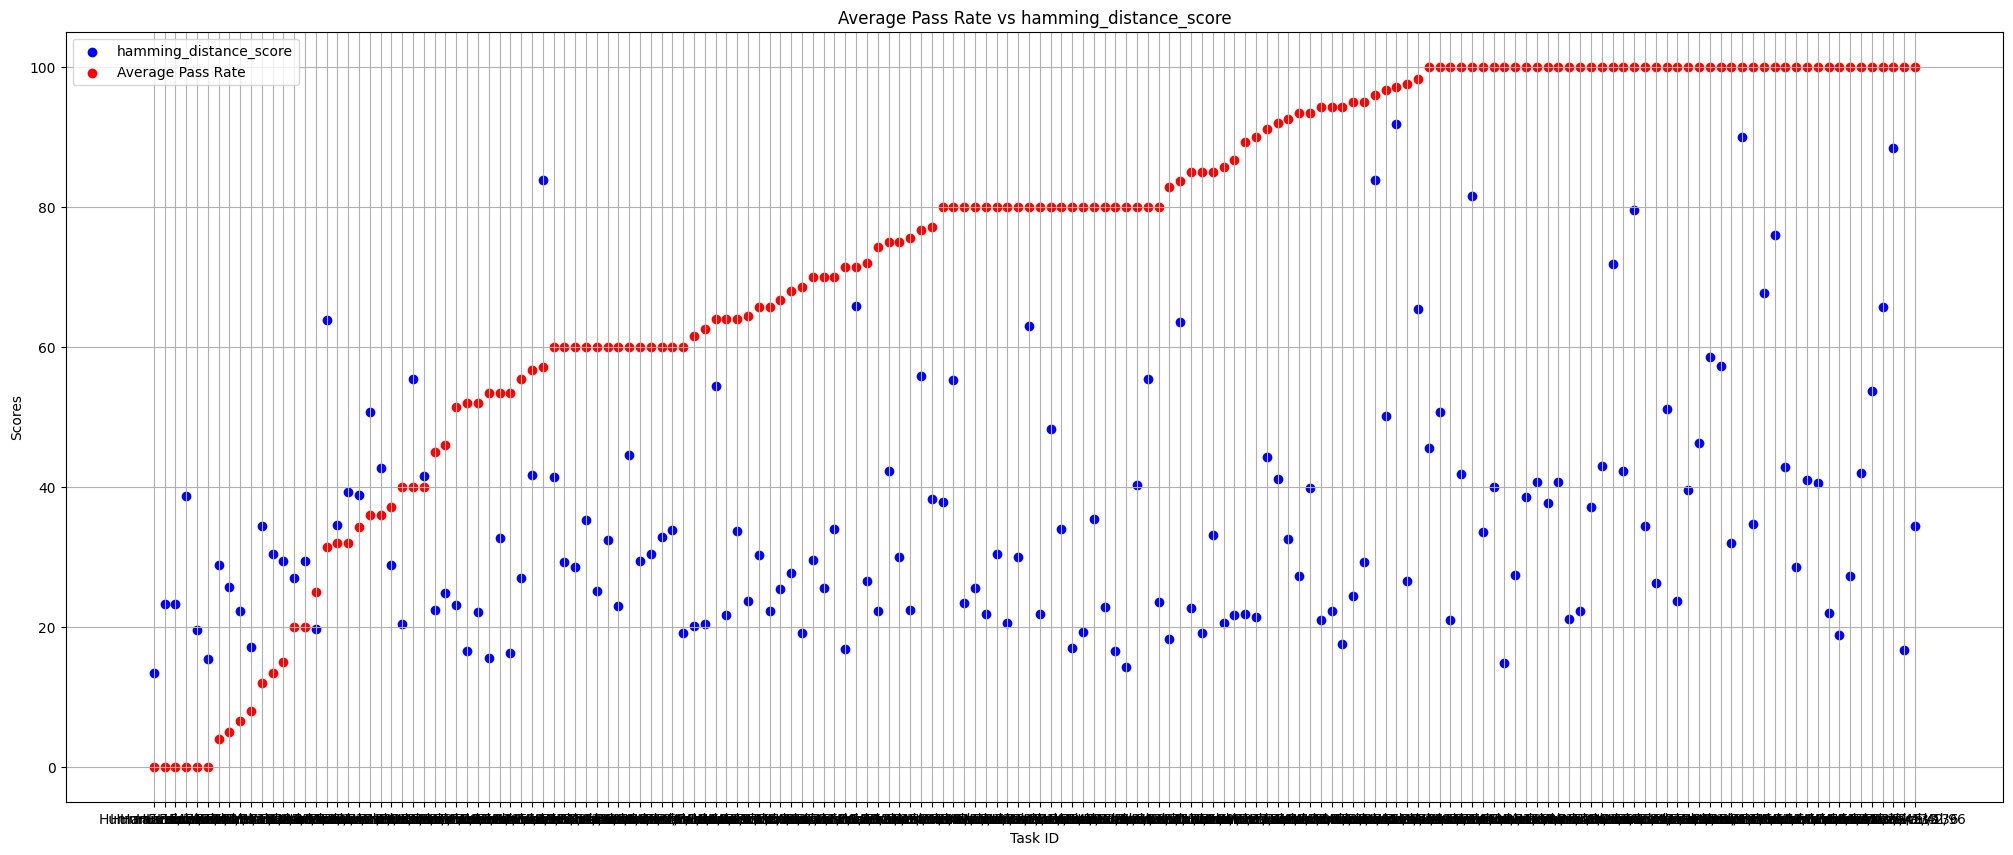

The correlation between the average pass rate and longest_common_subsequence is 0.33580850037818316


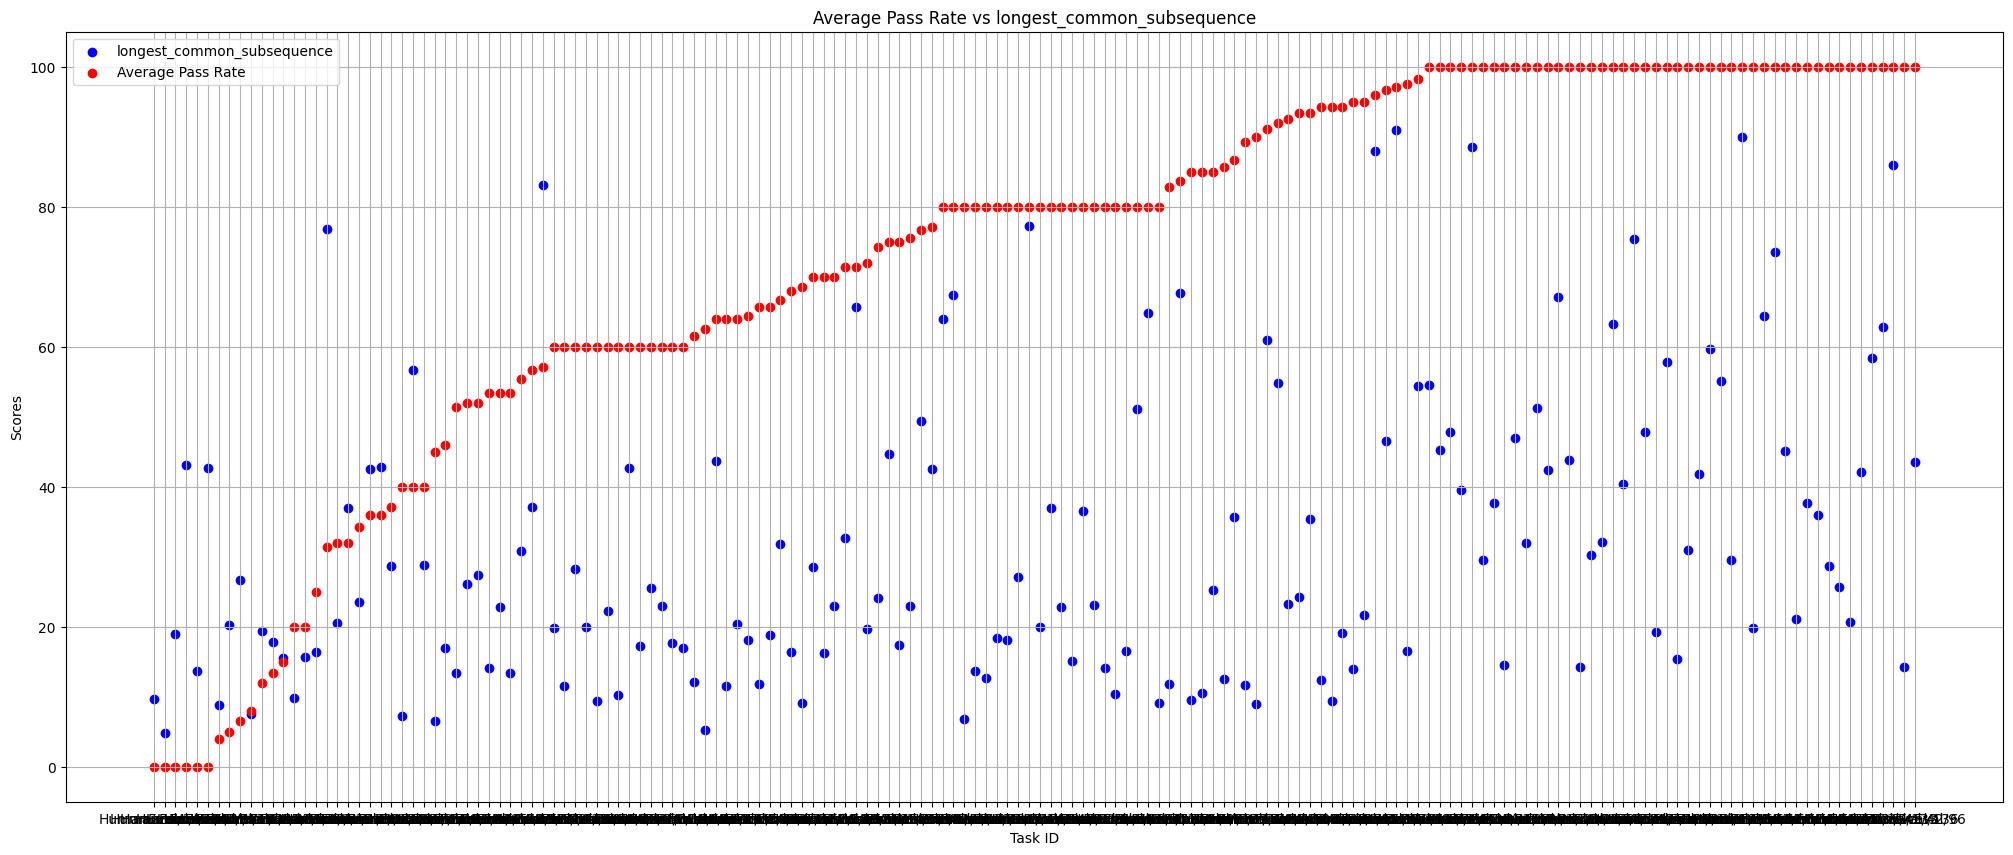

The correlation between the average pass rate and UnifiedDiff is 0.4176909262818674


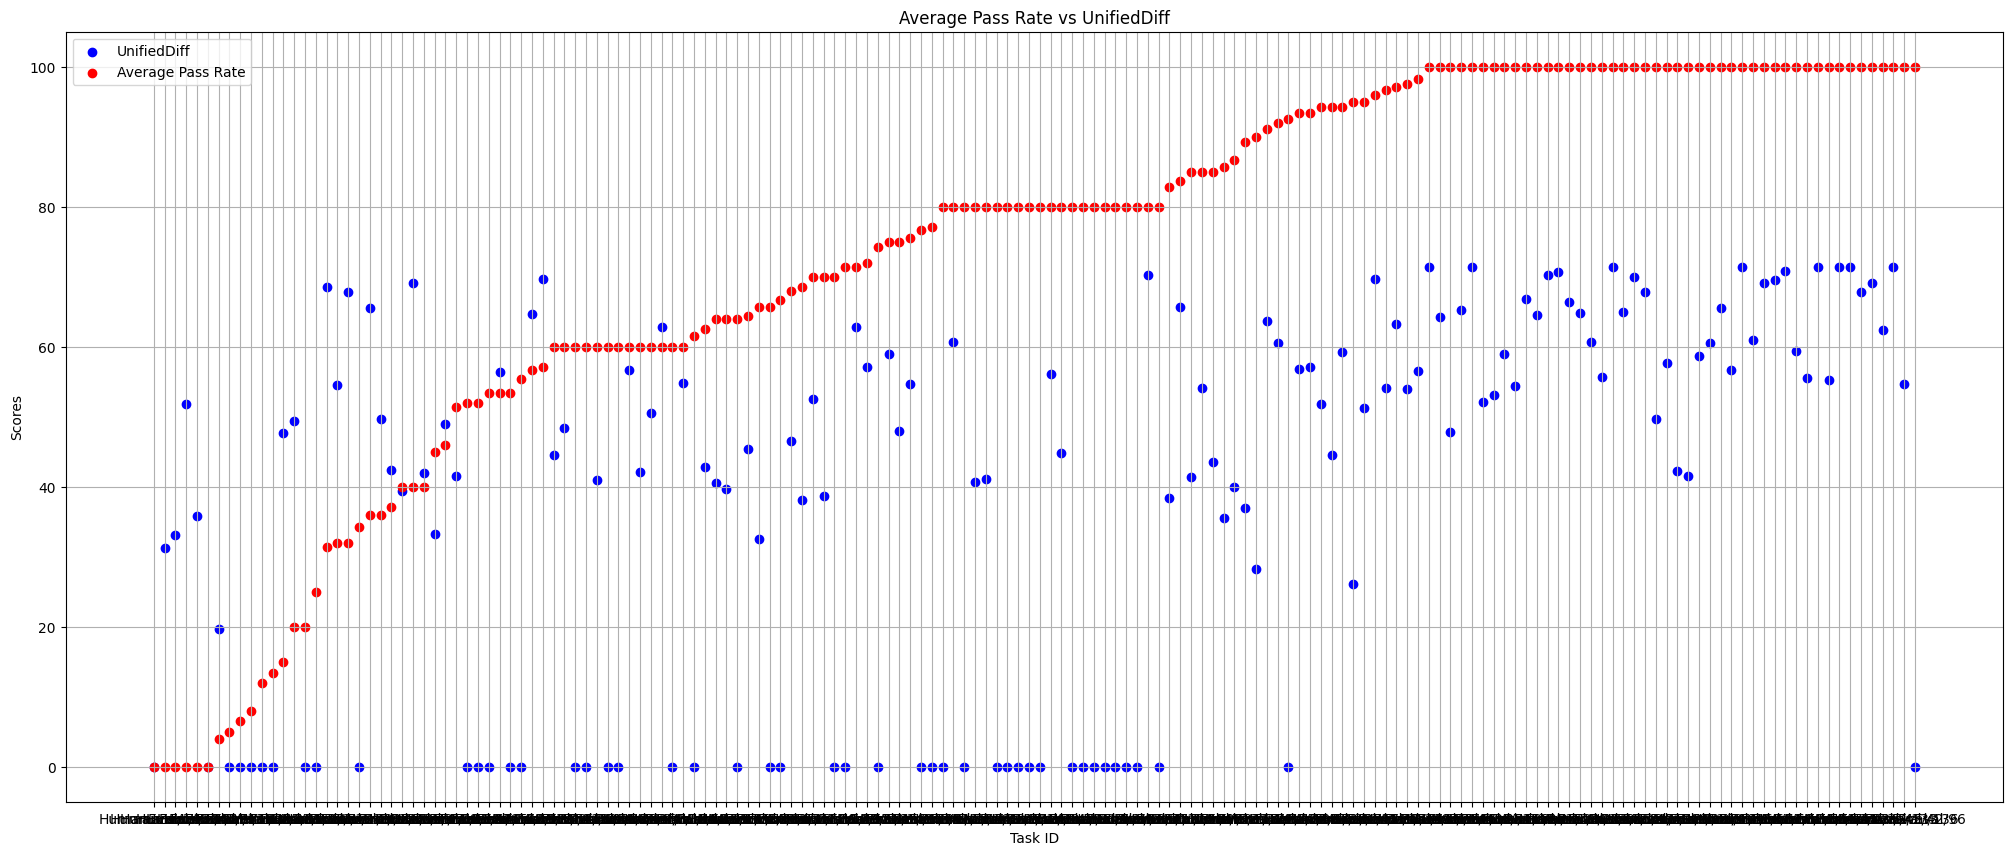

The correlation between the average pass rate and TreeDiff is 0.36576128274202024


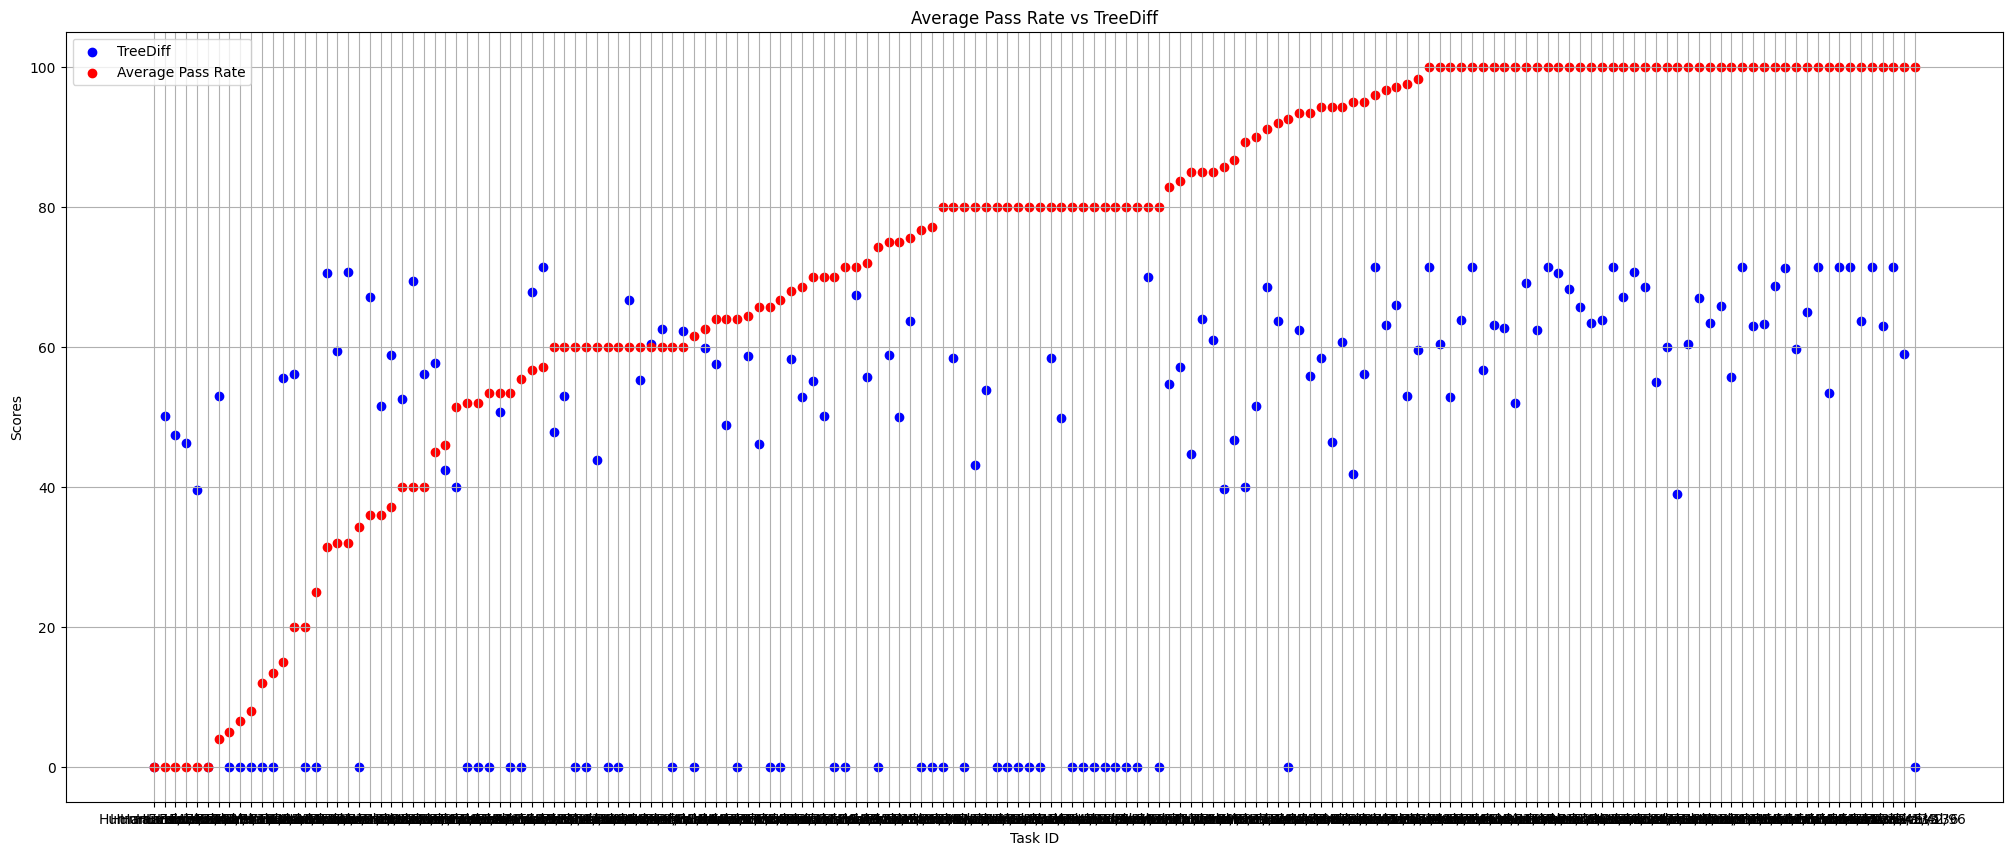

Visualizing the scores of the file  ./RESULTS/final scores/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_0_temps_1.5_trial_1_sim_score.csv  completed
--------------------------------------------------------------------
Visualizing the scores of the file  ./RESULTS/final scores/dataset_HumanEval_model_gpt-4-turbo-preview_n_5_tempr_0_temps_1_trial_1_sim_score.csv
number of data points that has the avg pass rate = 100  0.7317073170731707
The correlation between the average pass rate and sequence_similarity is 0.08701788149863458


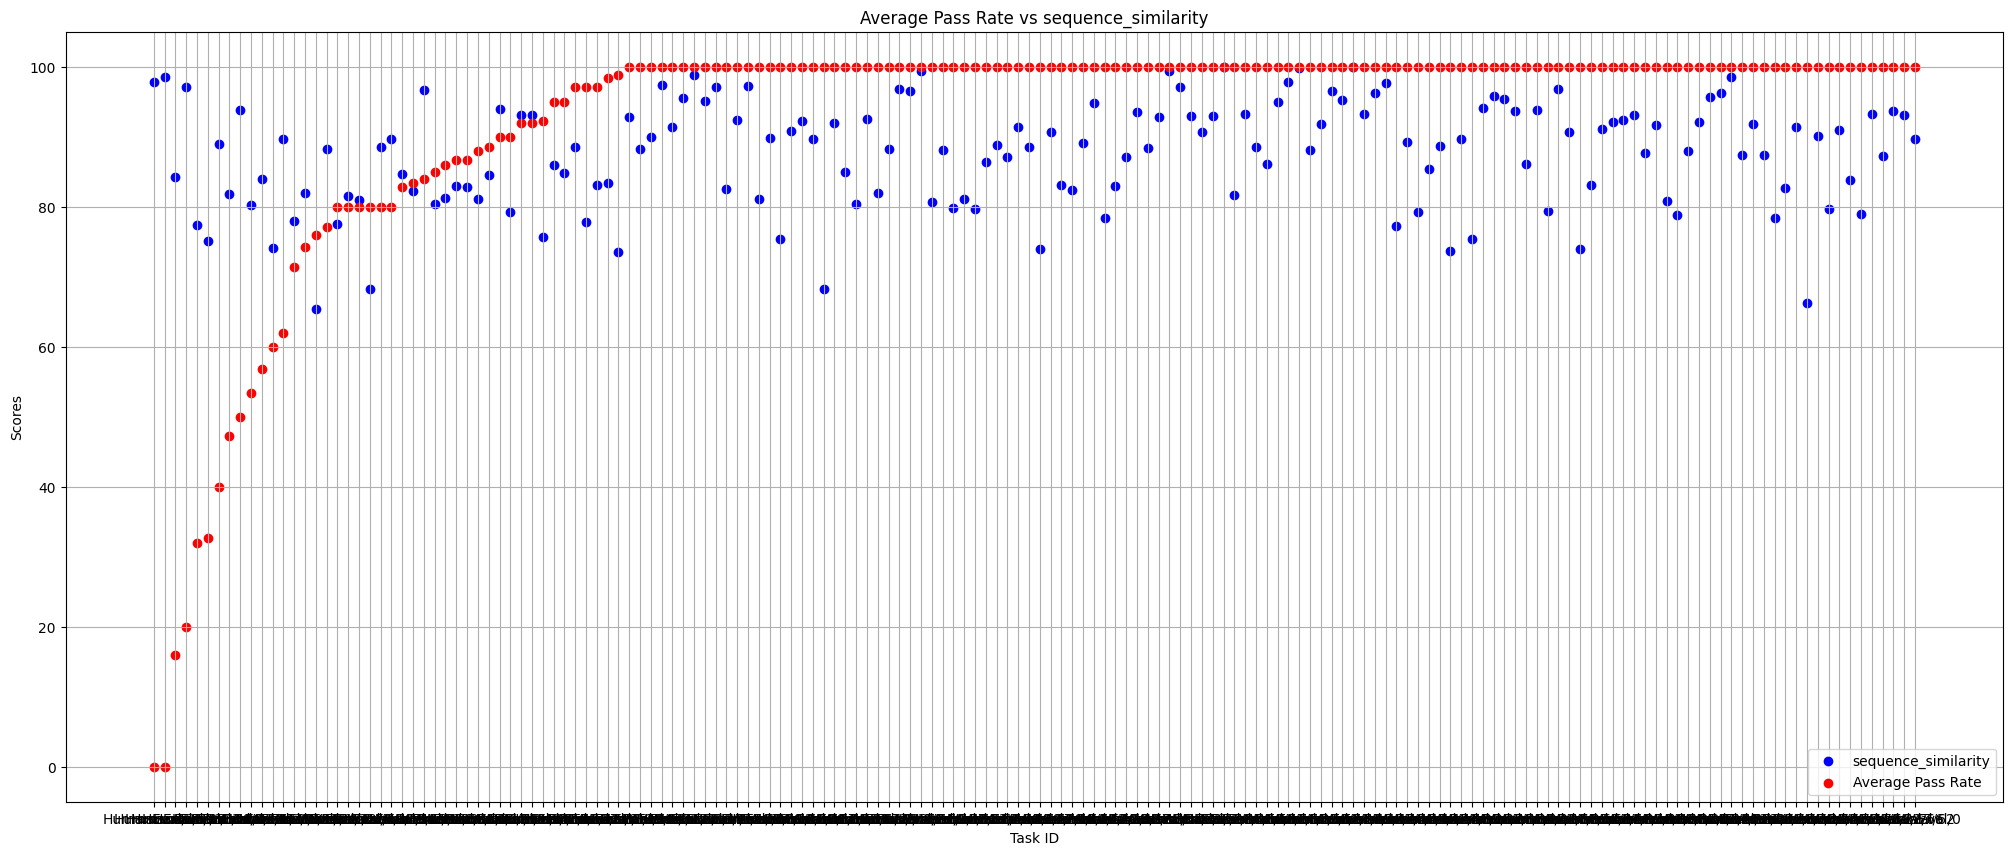

The correlation between the average pass rate and edit_distance_score is 0.07021469226602915


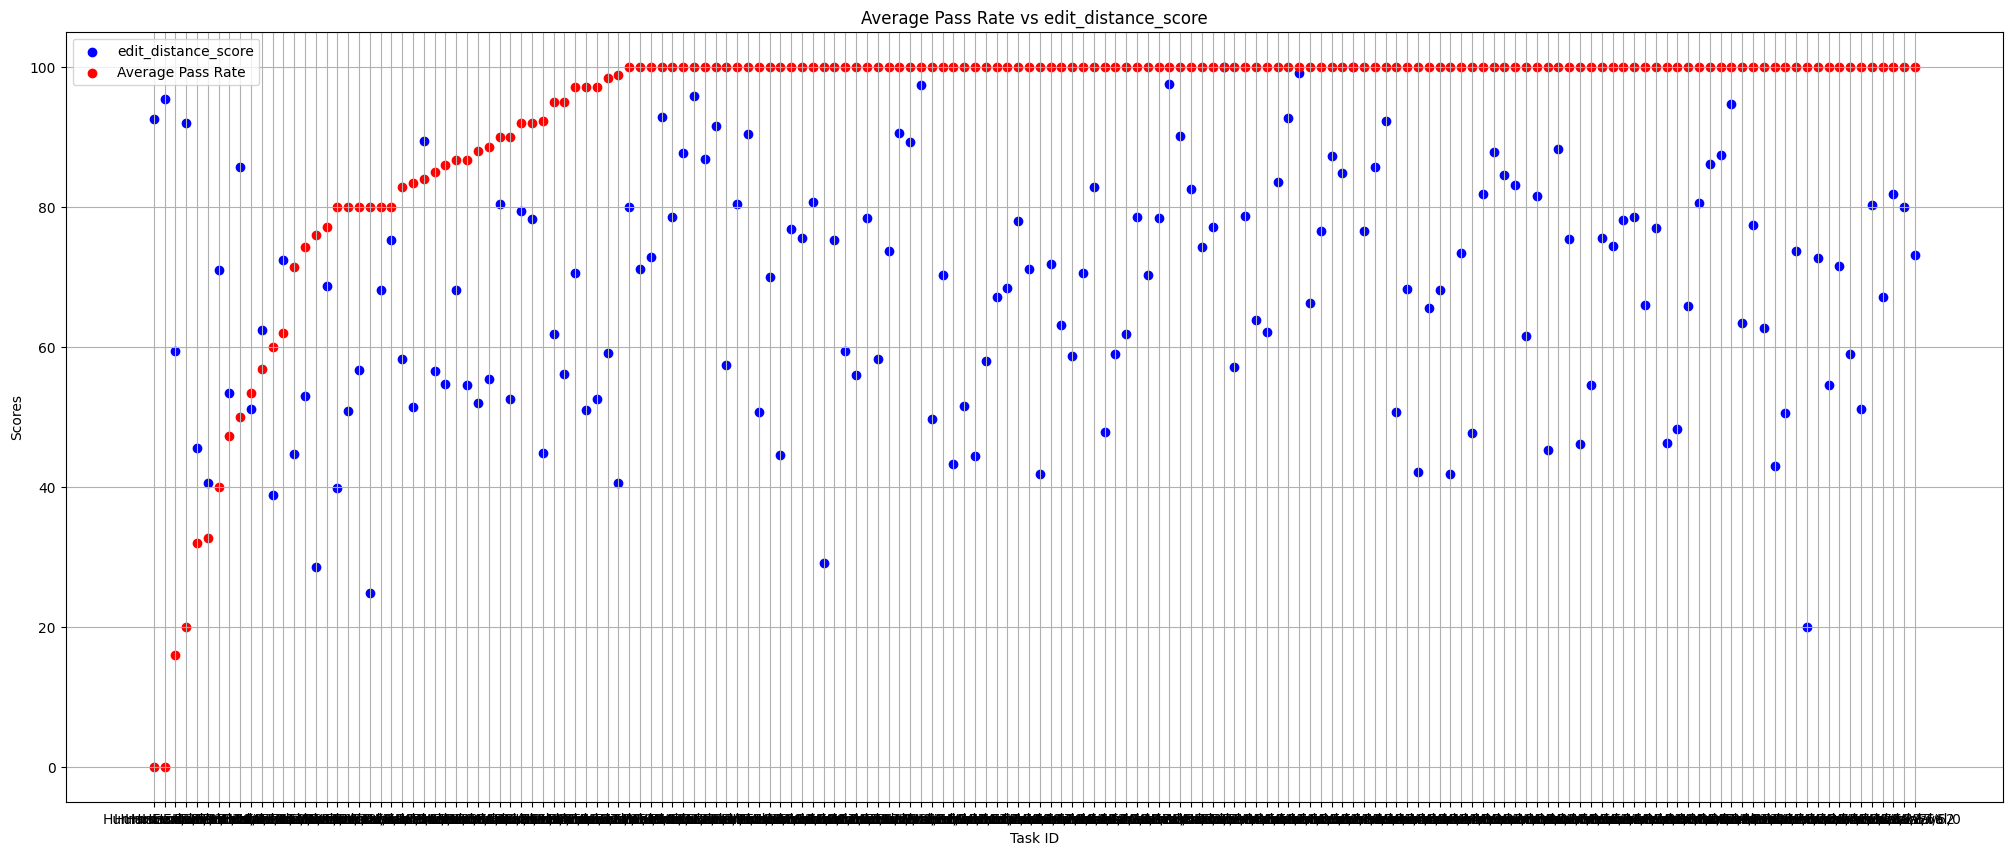

The correlation between the average pass rate and jaccard_similarity is 0.12361411116184316


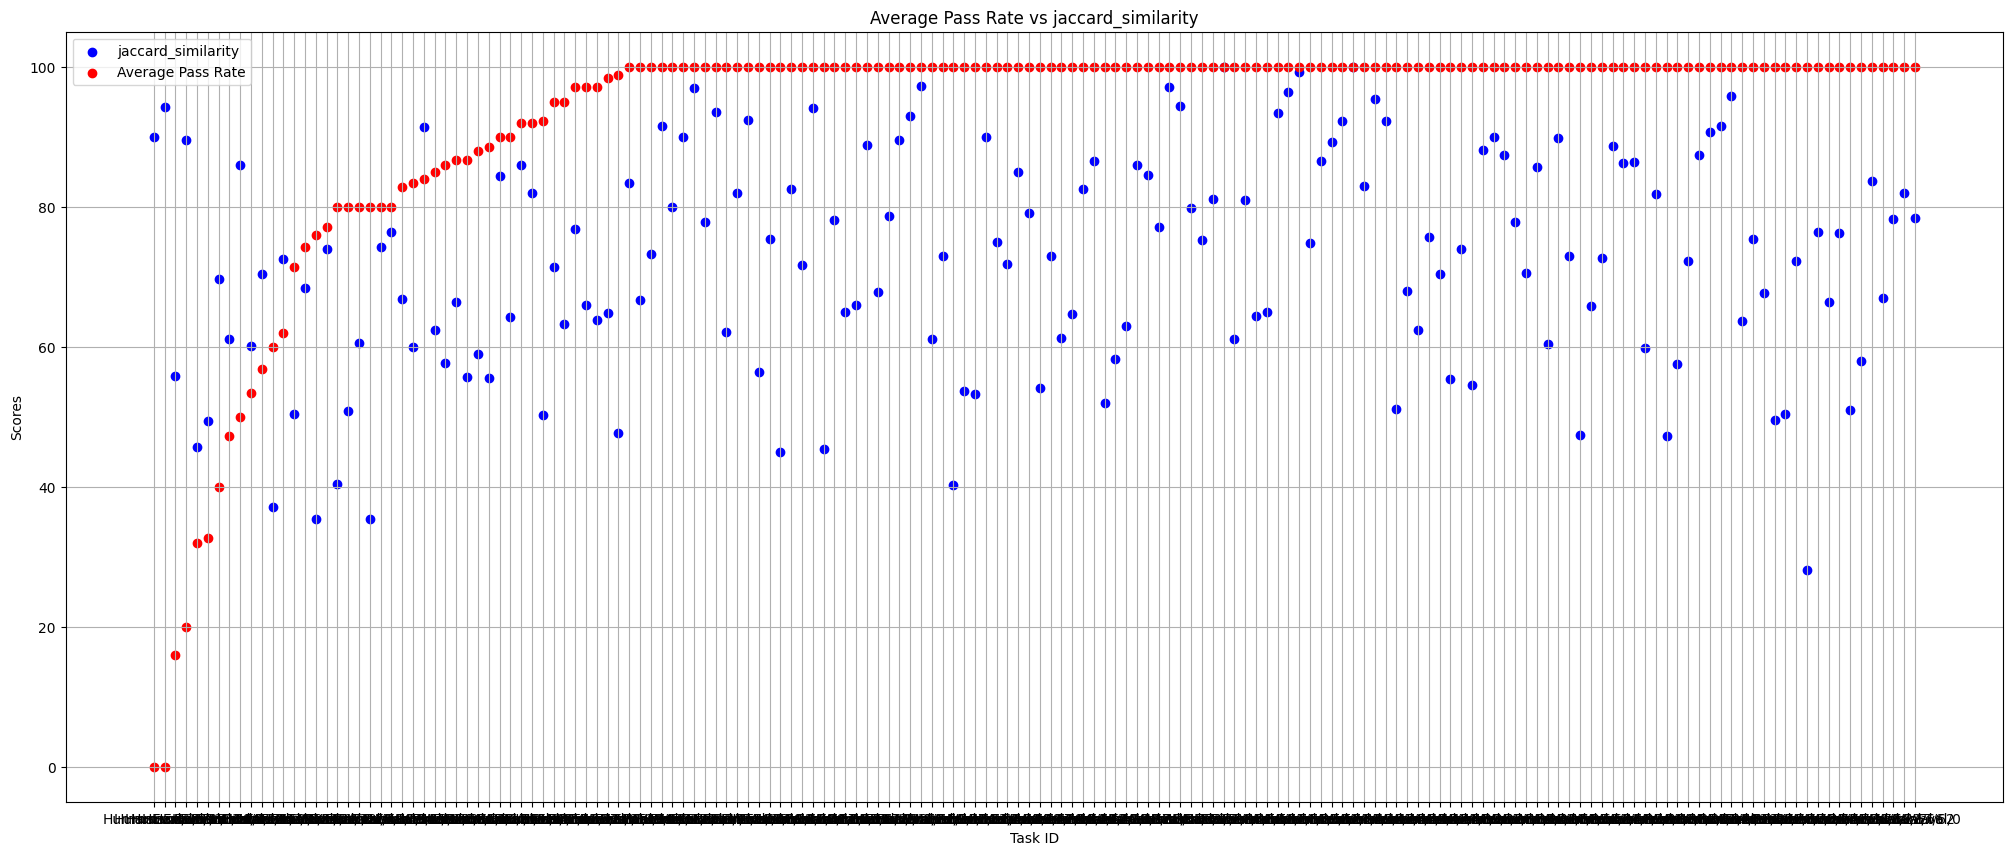

The correlation between the average pass rate and cosine_similarity_score is 0.08944370512846607


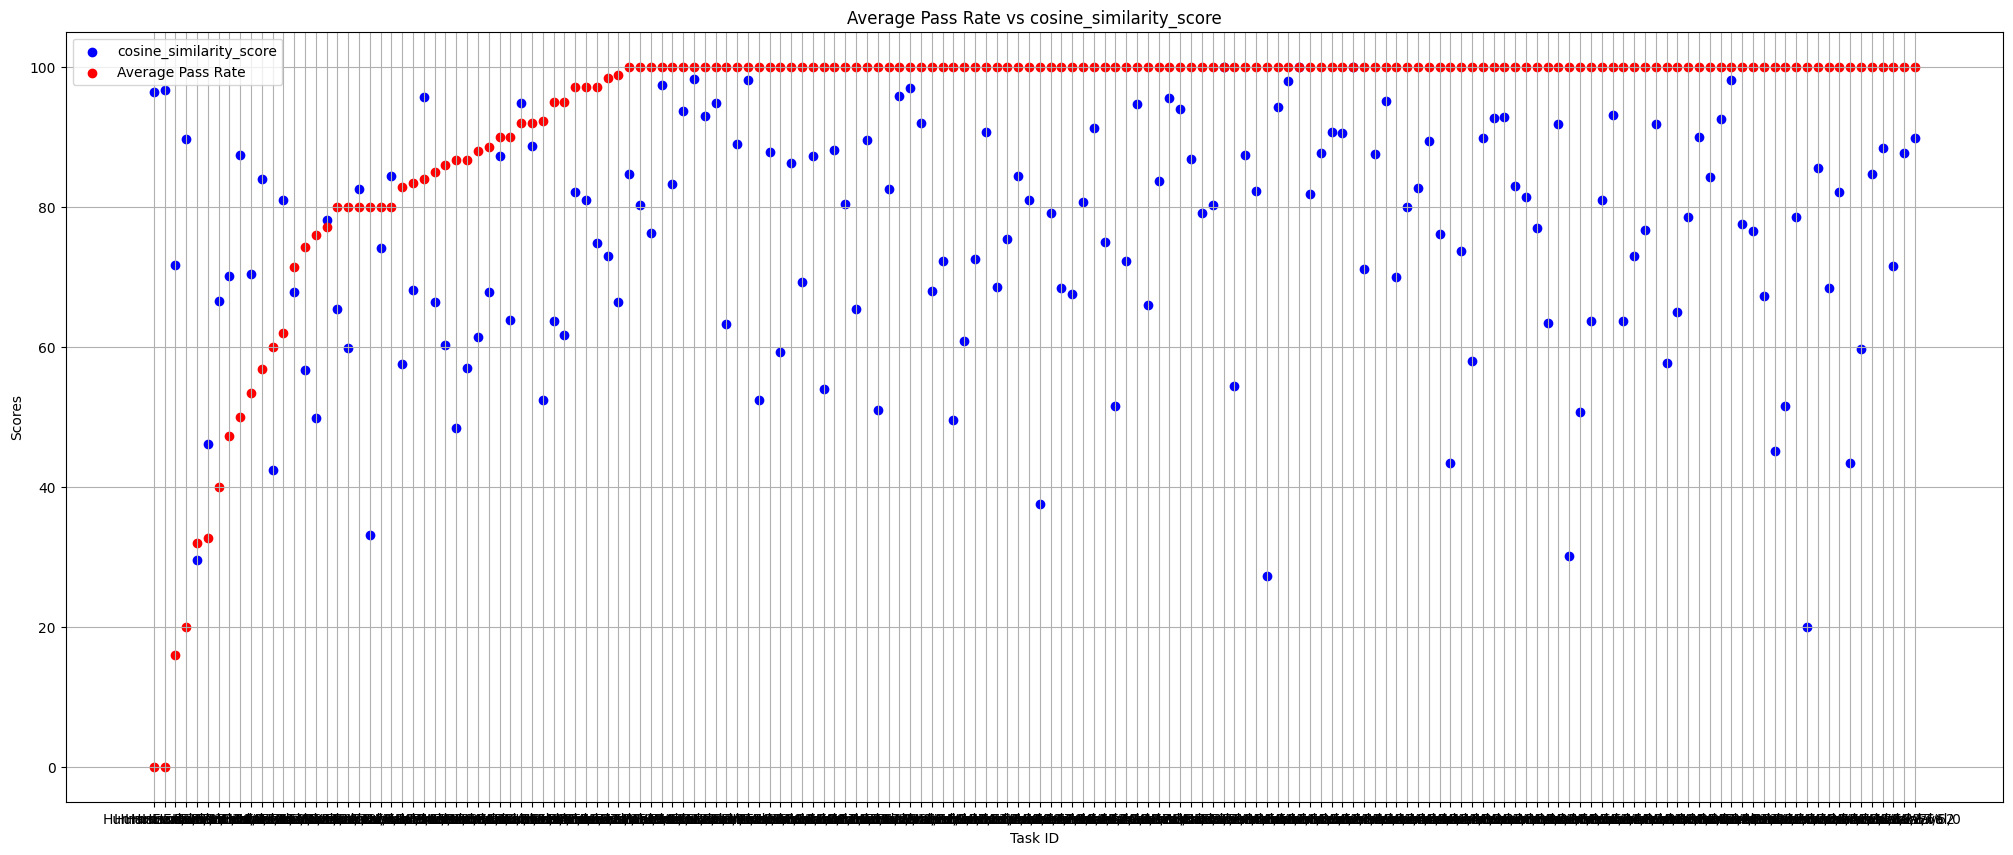

The correlation between the average pass rate and sorensen_dice_coefficient is -0.03416550590677816


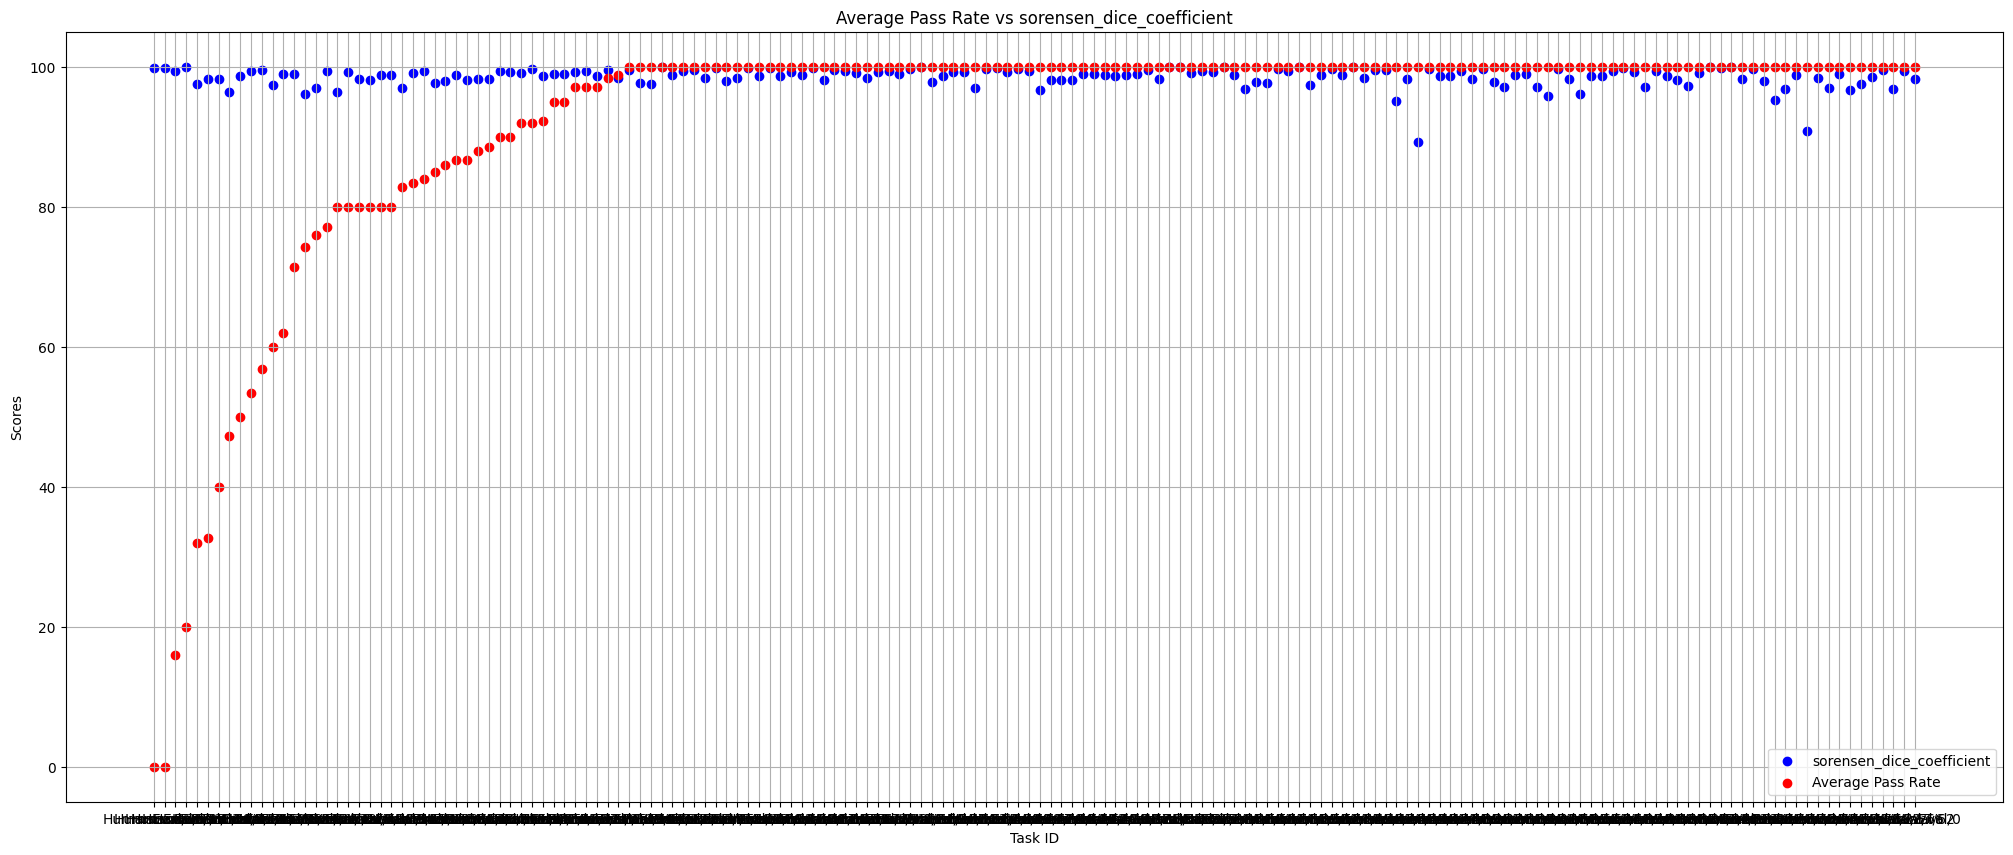

The correlation between the average pass rate and hamming_distance_score is 0.06499064072954891


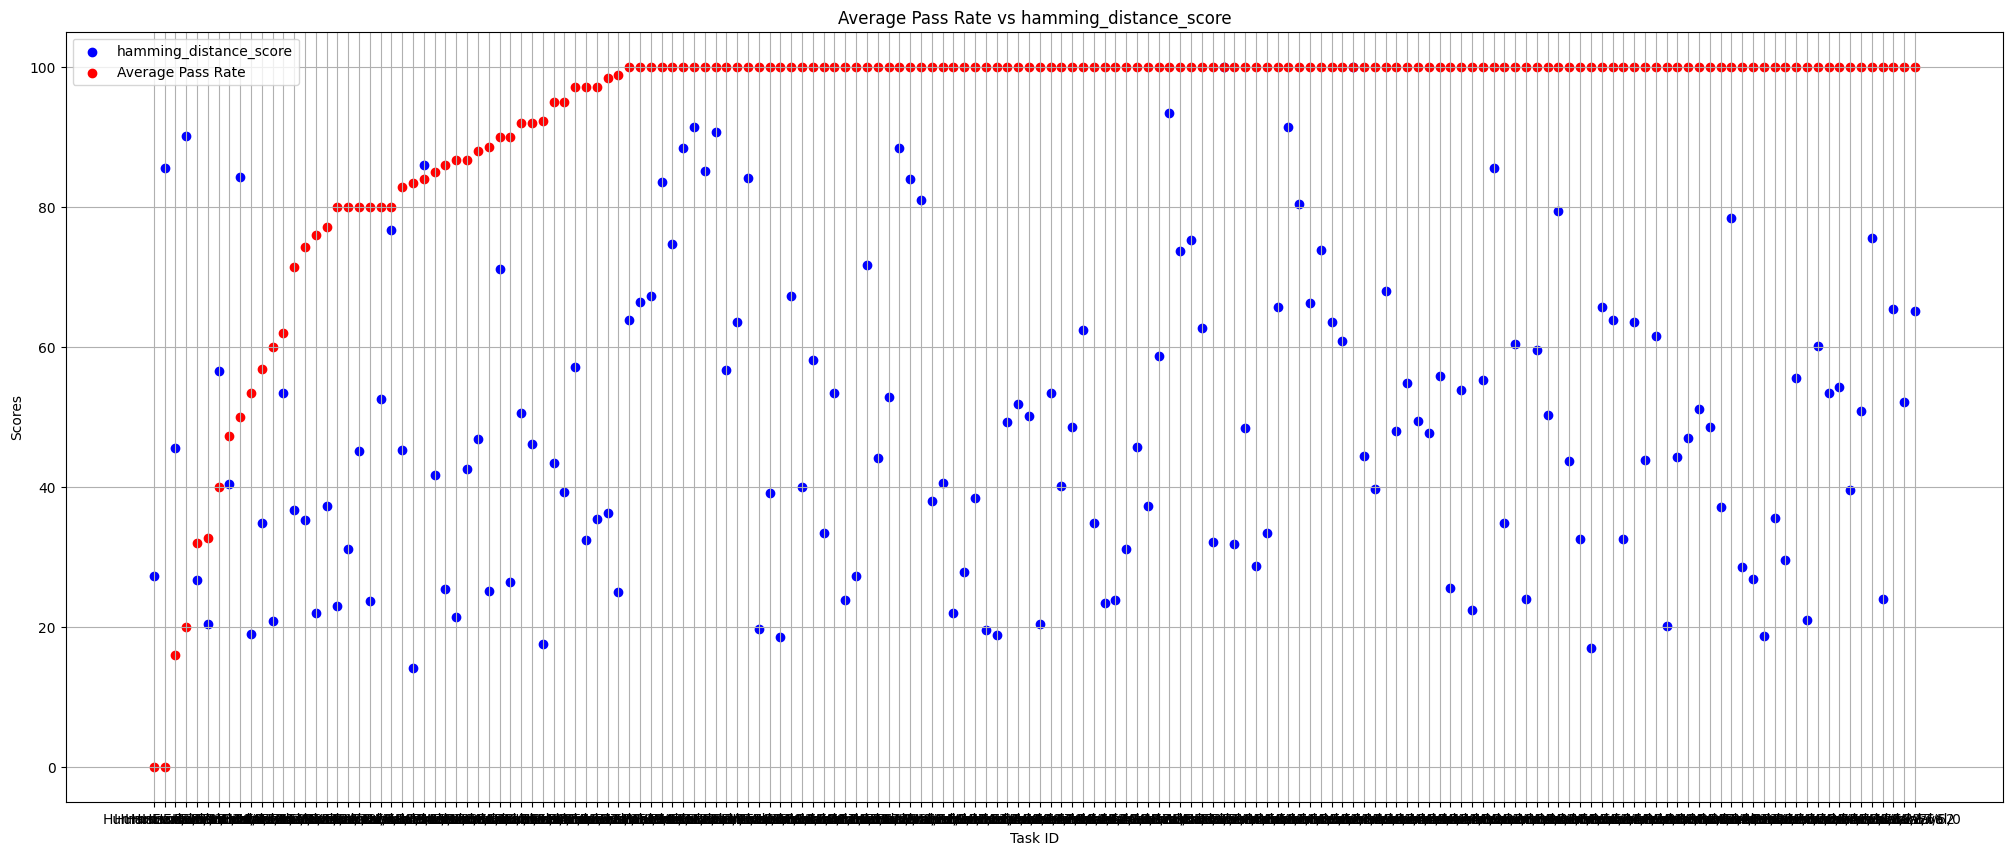

The correlation between the average pass rate and longest_common_subsequence is 0.06600379967652537


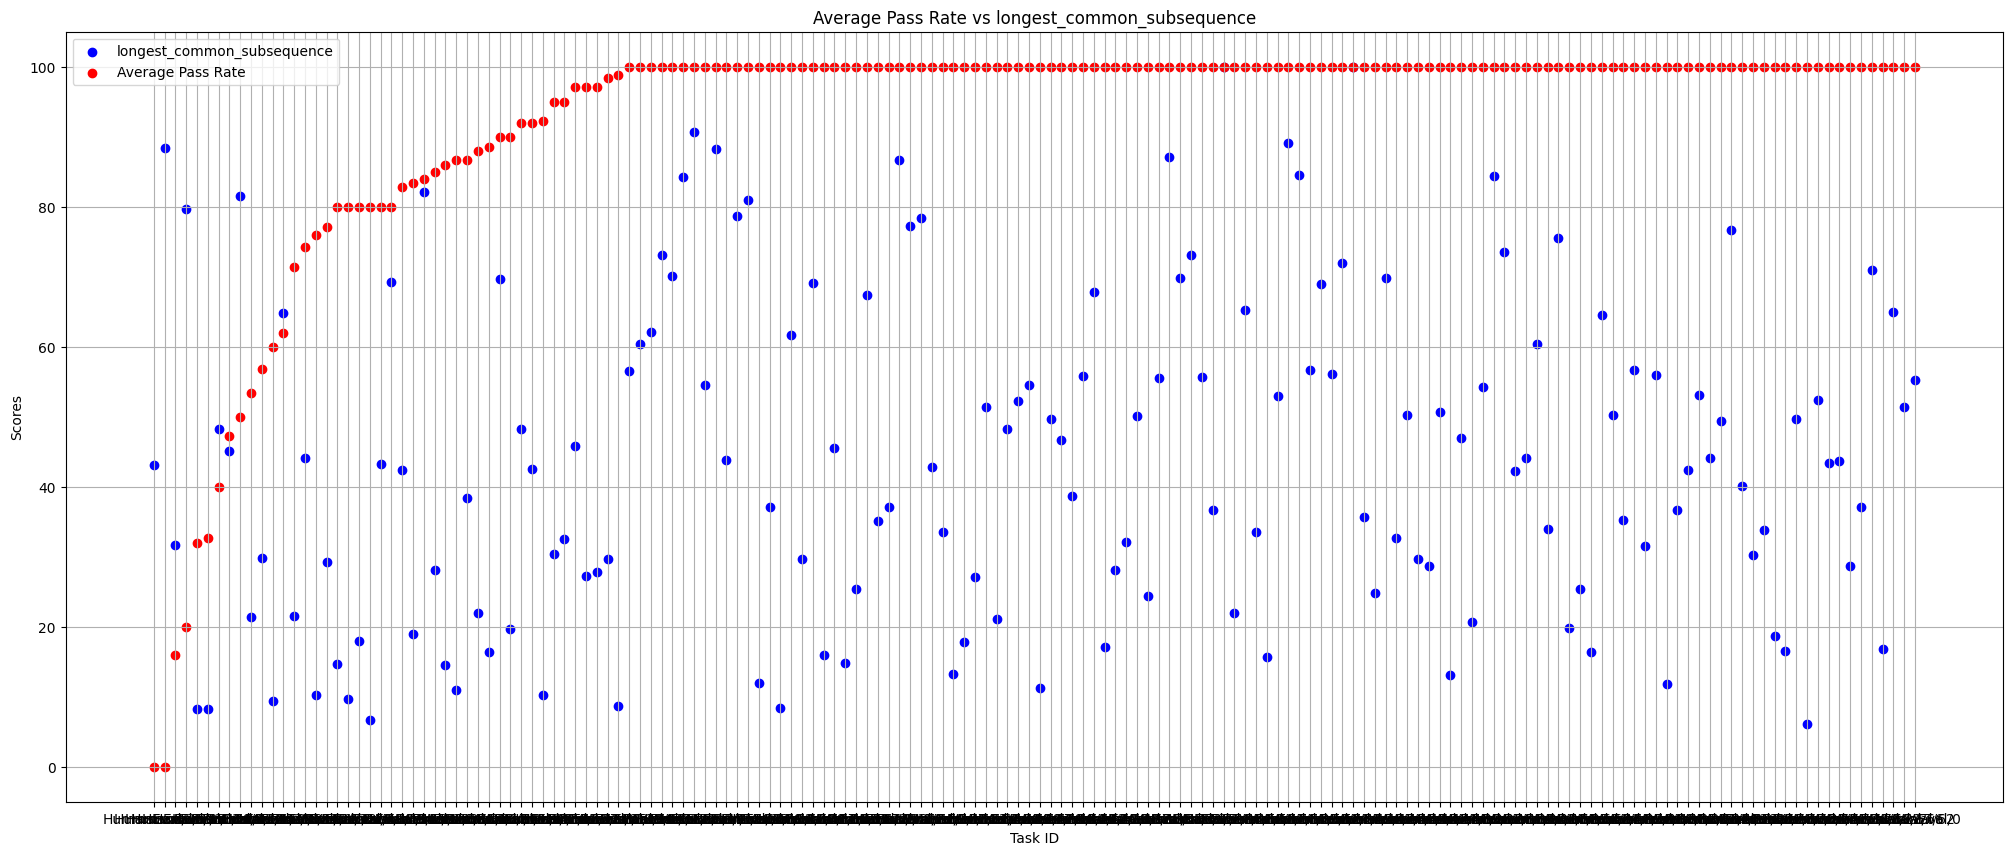

The correlation between the average pass rate and UnifiedDiff is 0.13965607261533813


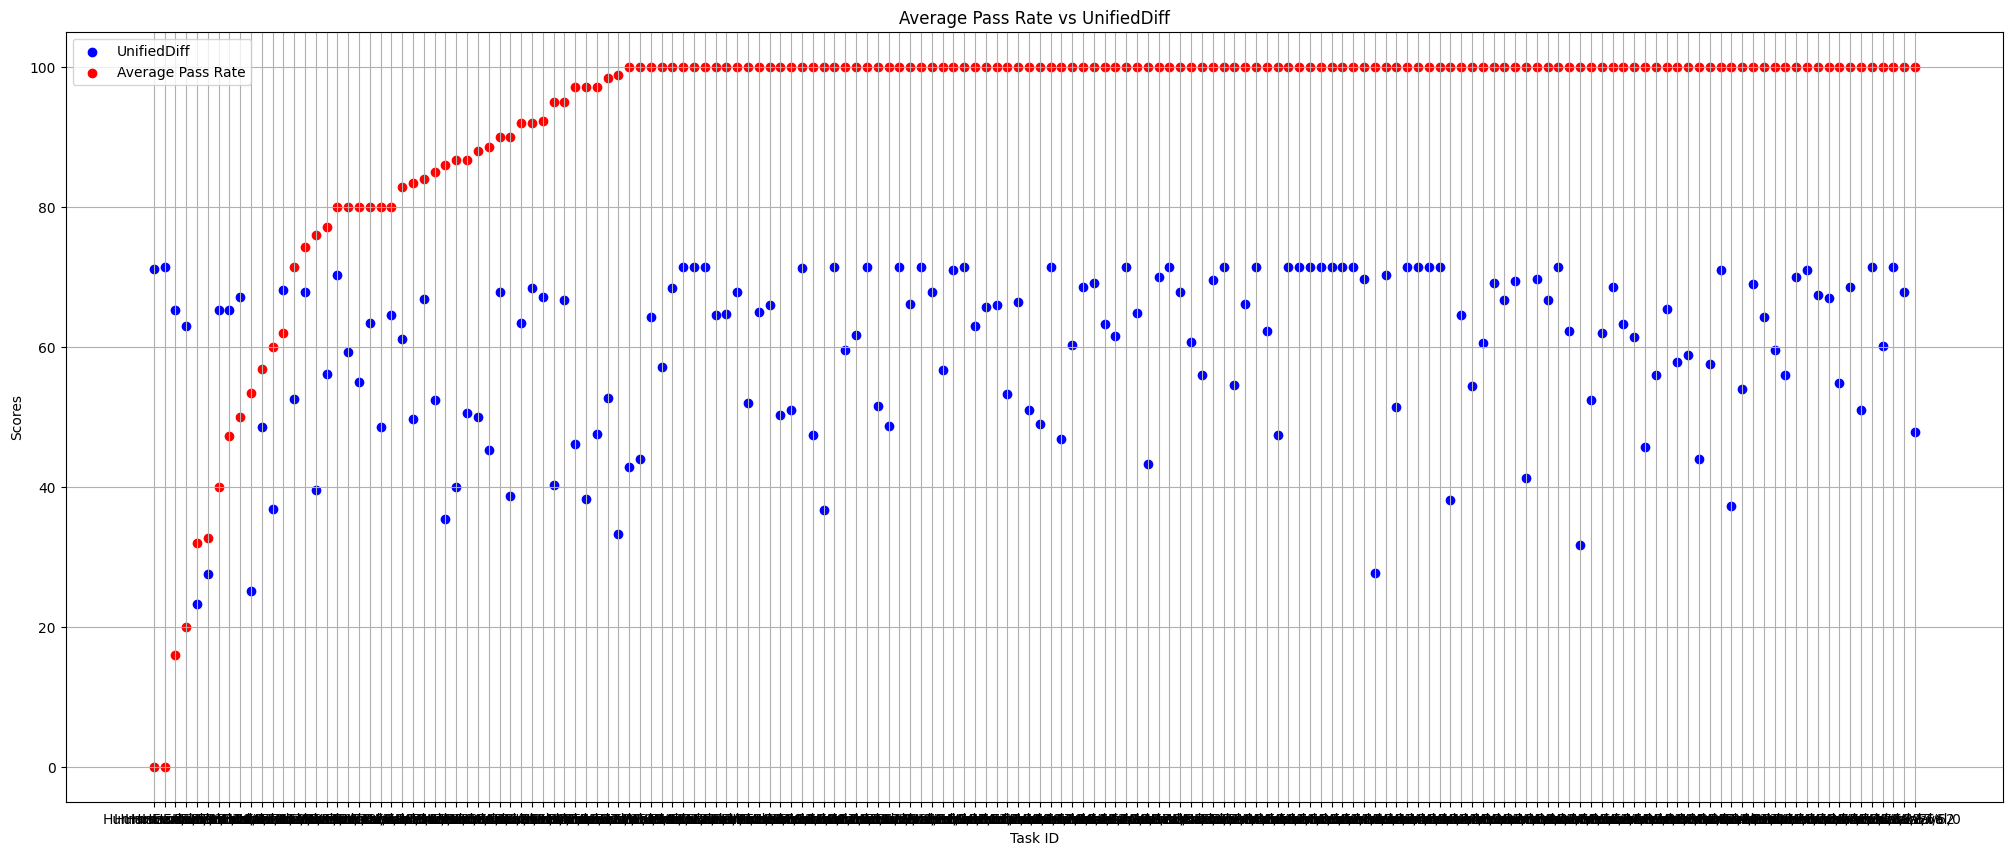

The correlation between the average pass rate and TreeDiff is 0.10814016765502972


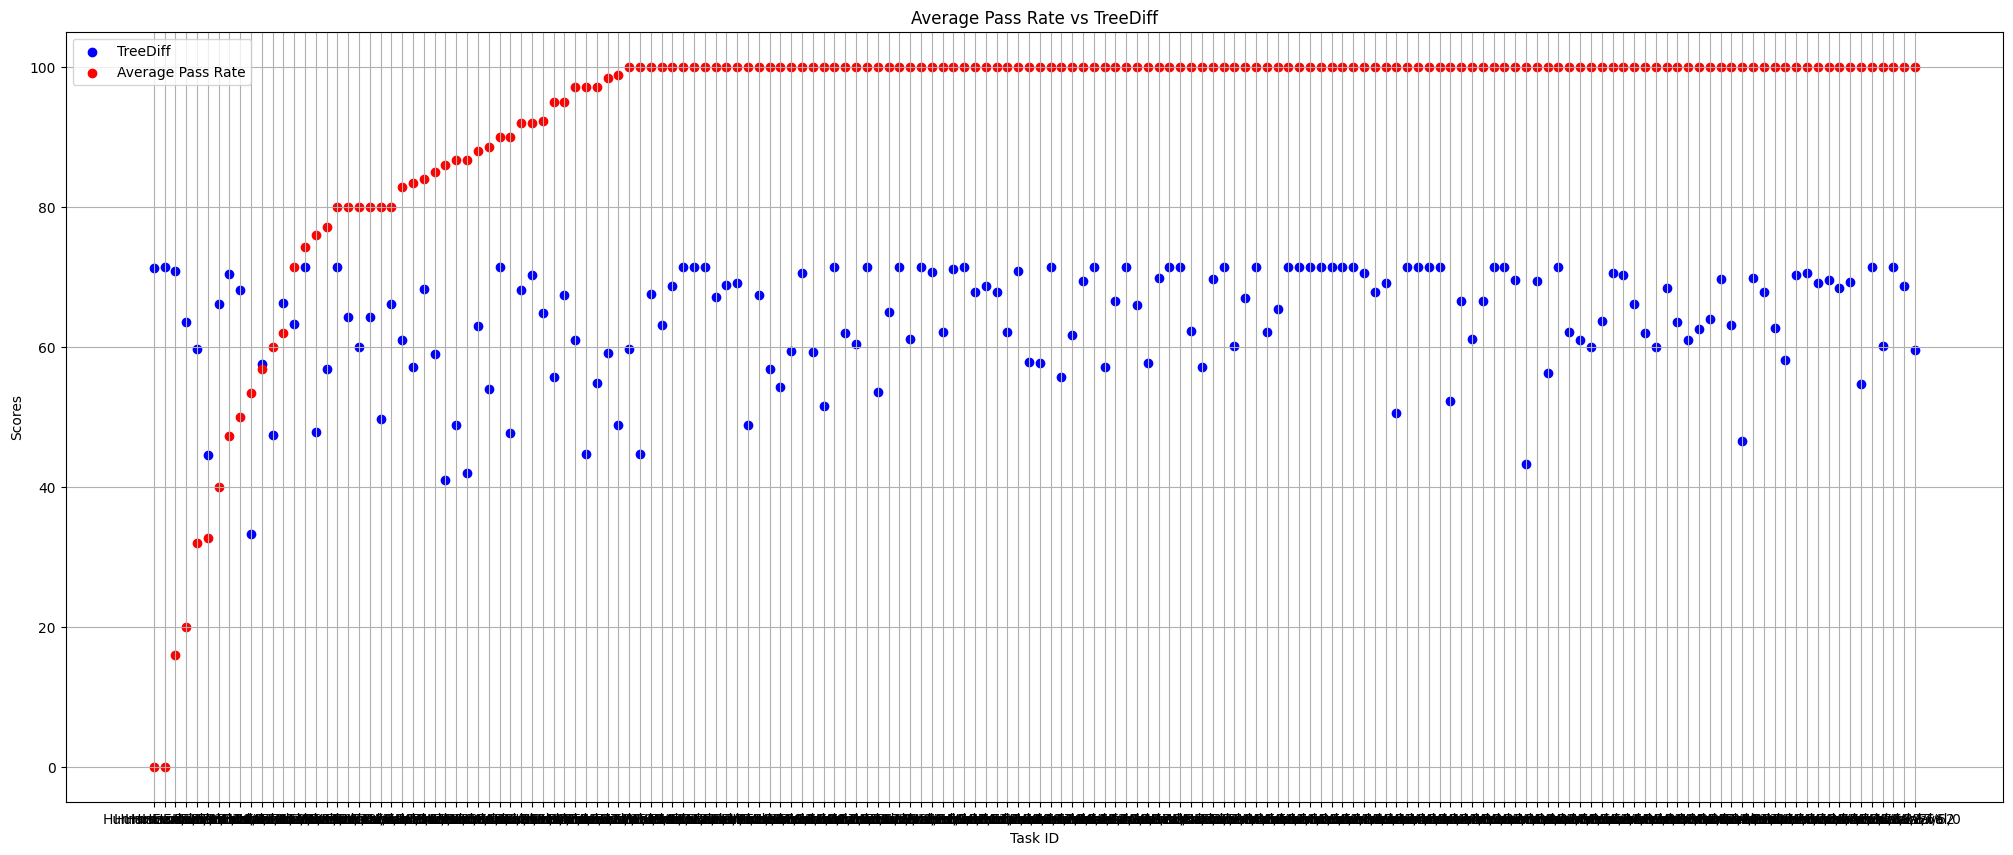

Visualizing the scores of the file  ./RESULTS/final scores/dataset_HumanEval_model_gpt-4-turbo-preview_n_5_tempr_0_temps_1_trial_1_sim_score.csv  completed
--------------------------------------------------------------------
Visualizing the scores of the file  ./RESULTS/final scores/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_1_temps_1_trial_1_sim_score.csv
number of data points that has the avg pass rate = 100  0.4878048780487805
The correlation between the average pass rate and sequence_similarity is 0.20274409270376634


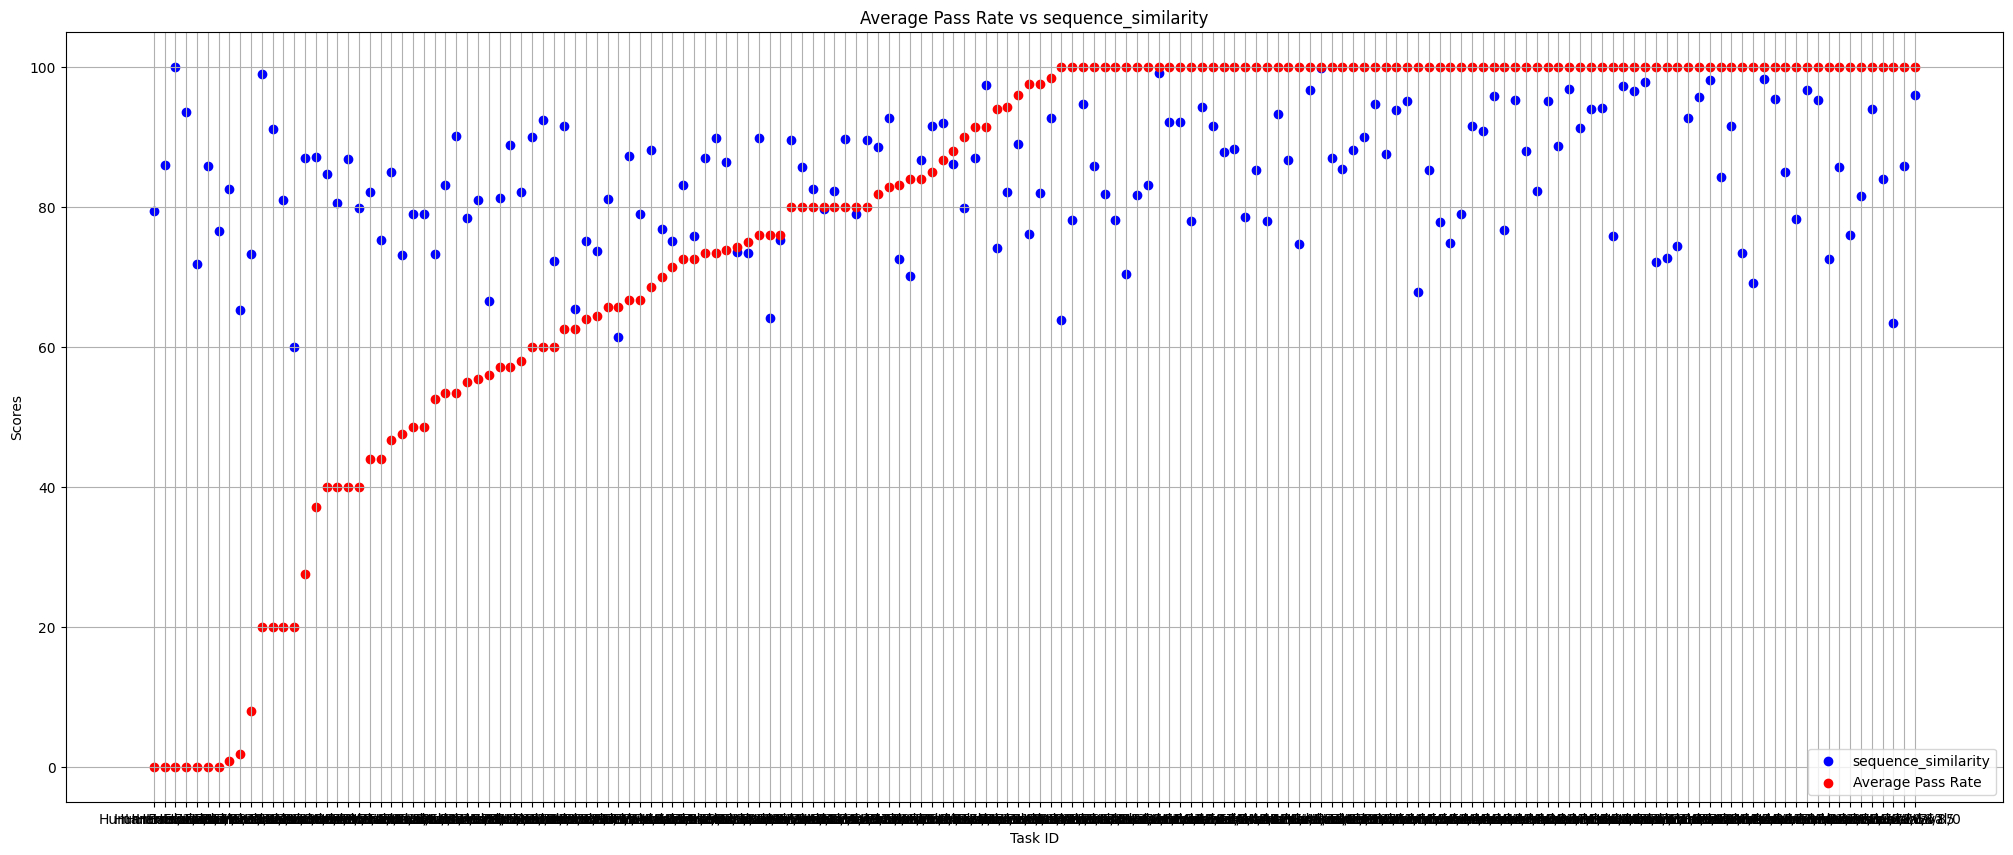

The correlation between the average pass rate and edit_distance_score is 0.1799748488065464


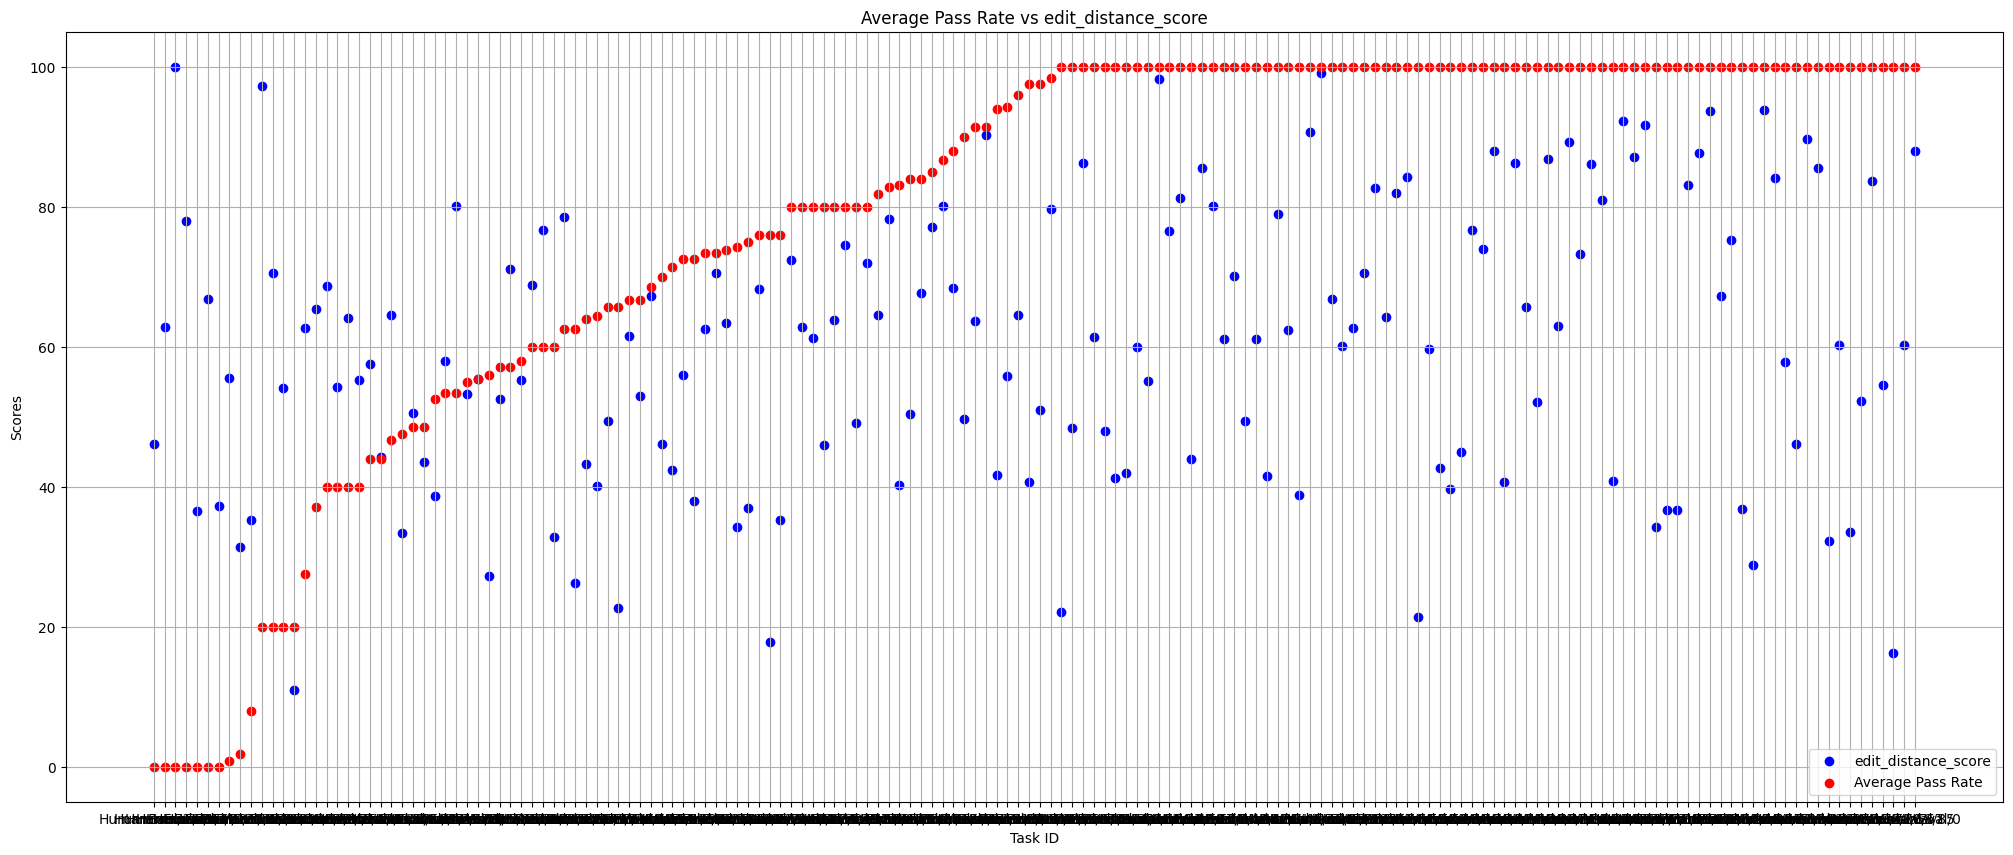

The correlation between the average pass rate and jaccard_similarity is 0.14349311958606906


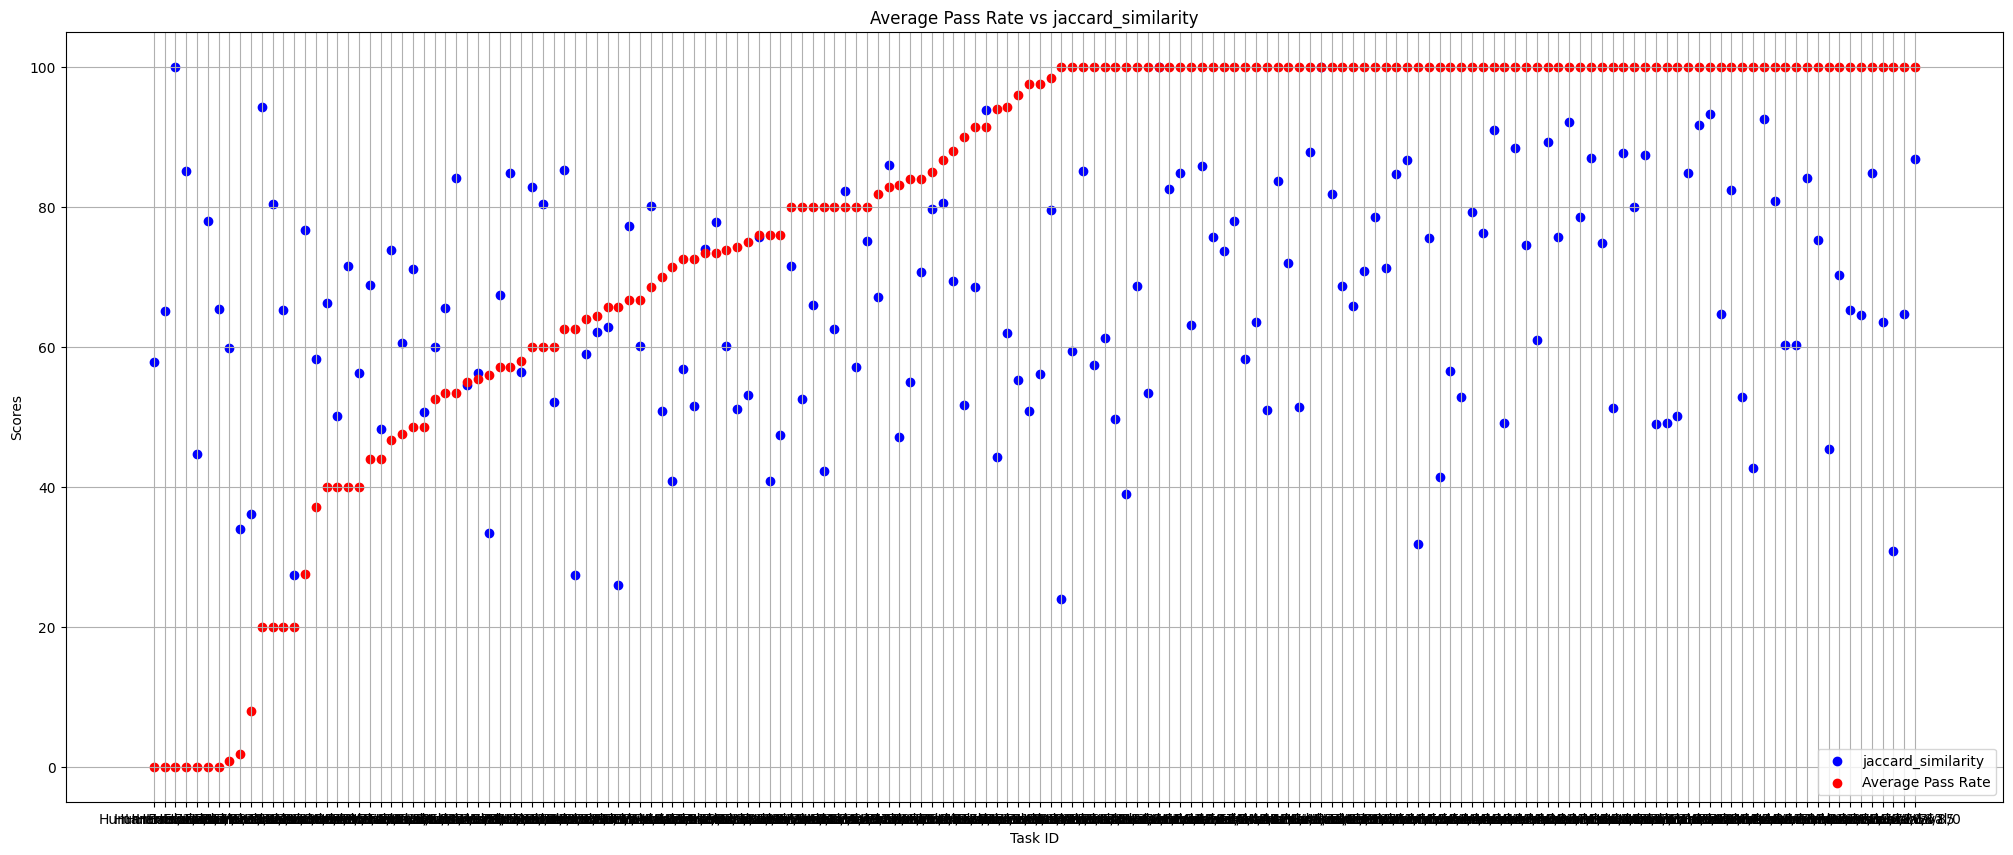

The correlation between the average pass rate and cosine_similarity_score is 0.21069093041998757


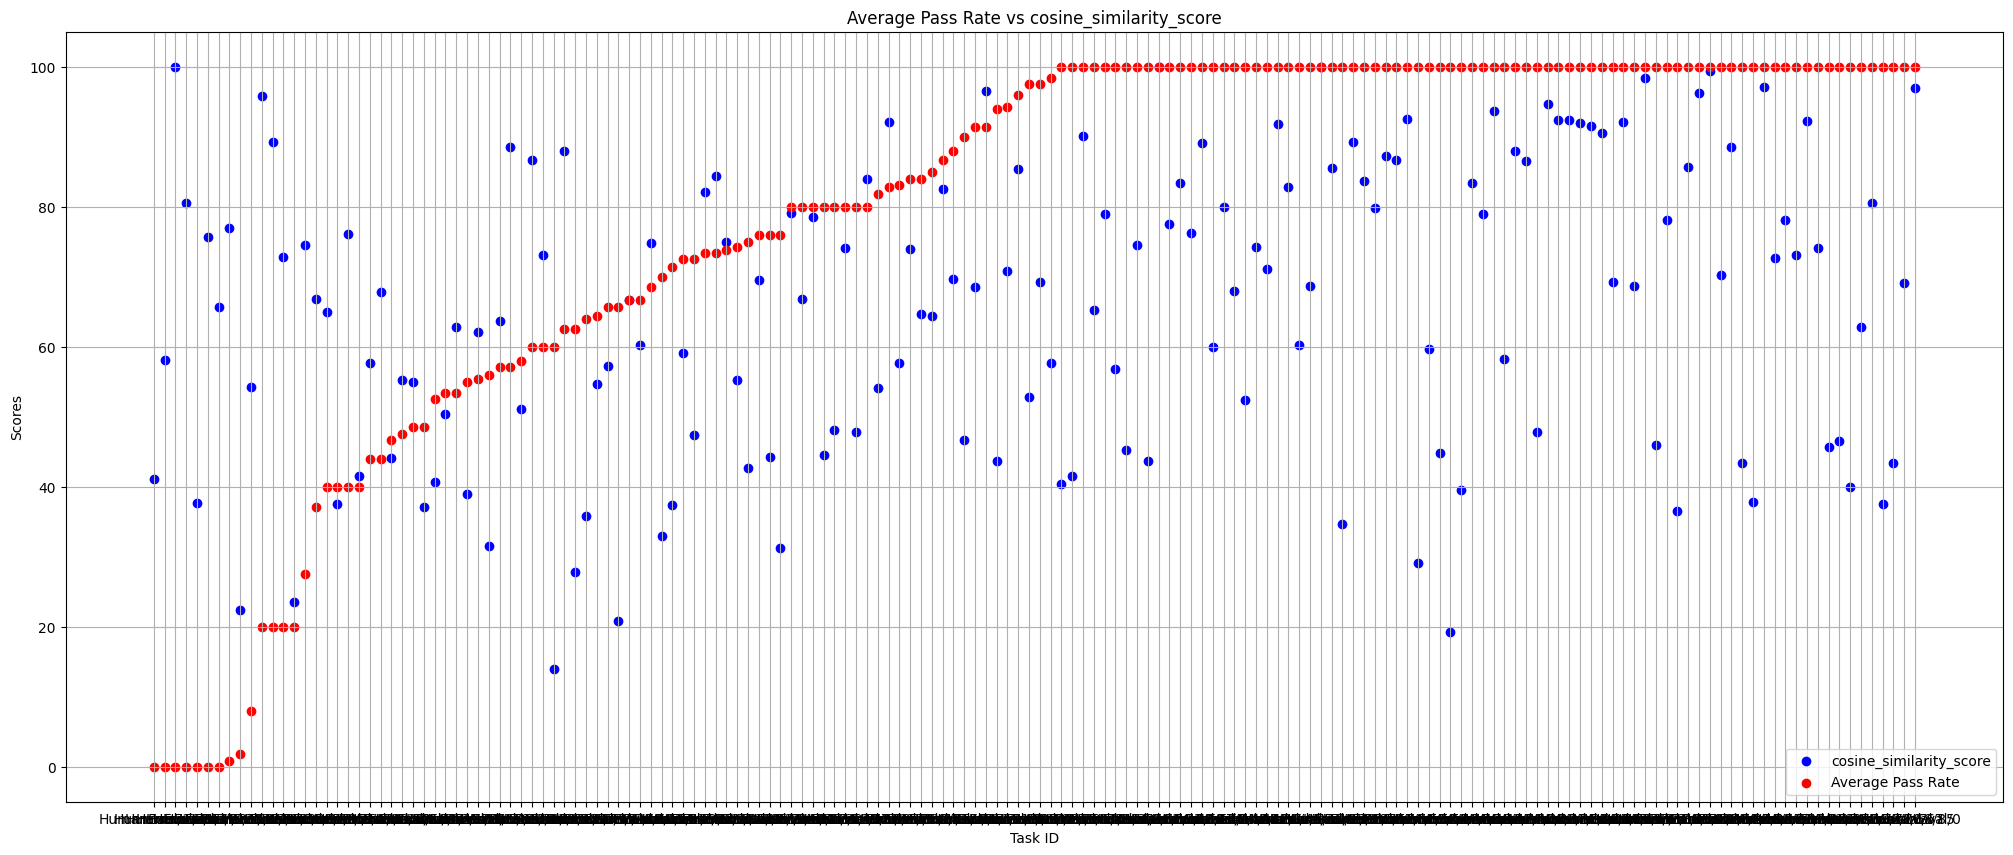

The correlation between the average pass rate and sorensen_dice_coefficient is 0.03304464793344433


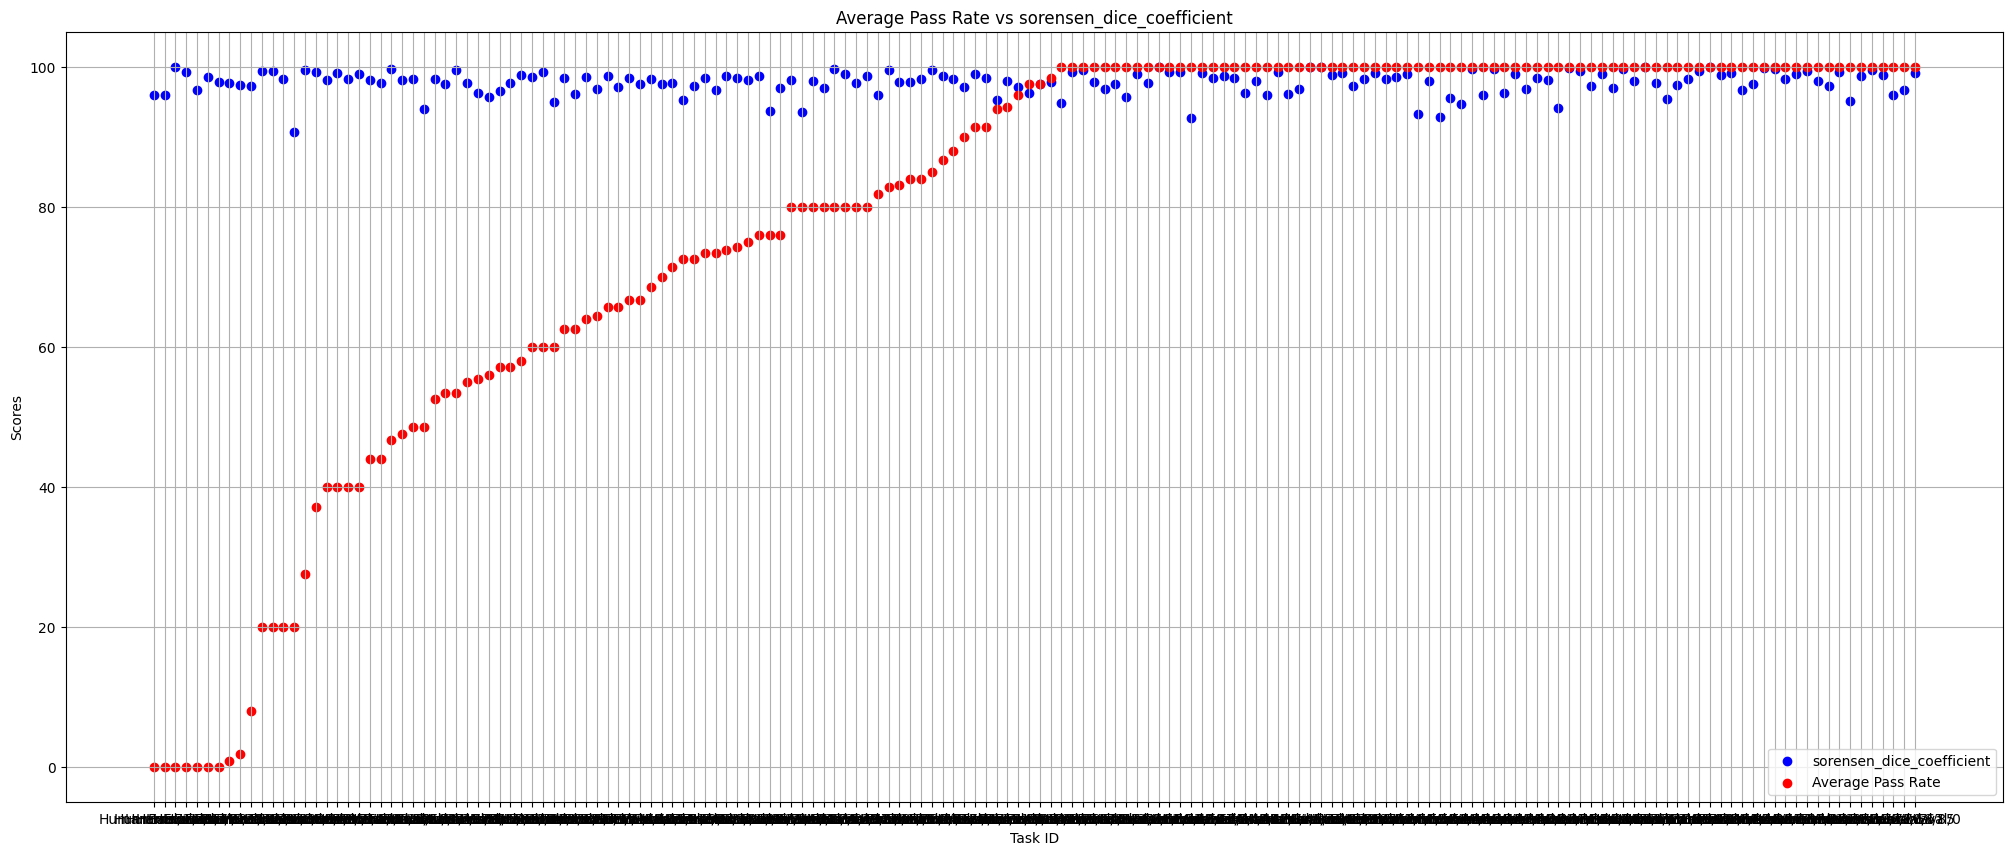

The correlation between the average pass rate and hamming_distance_score is 0.06632169932529867


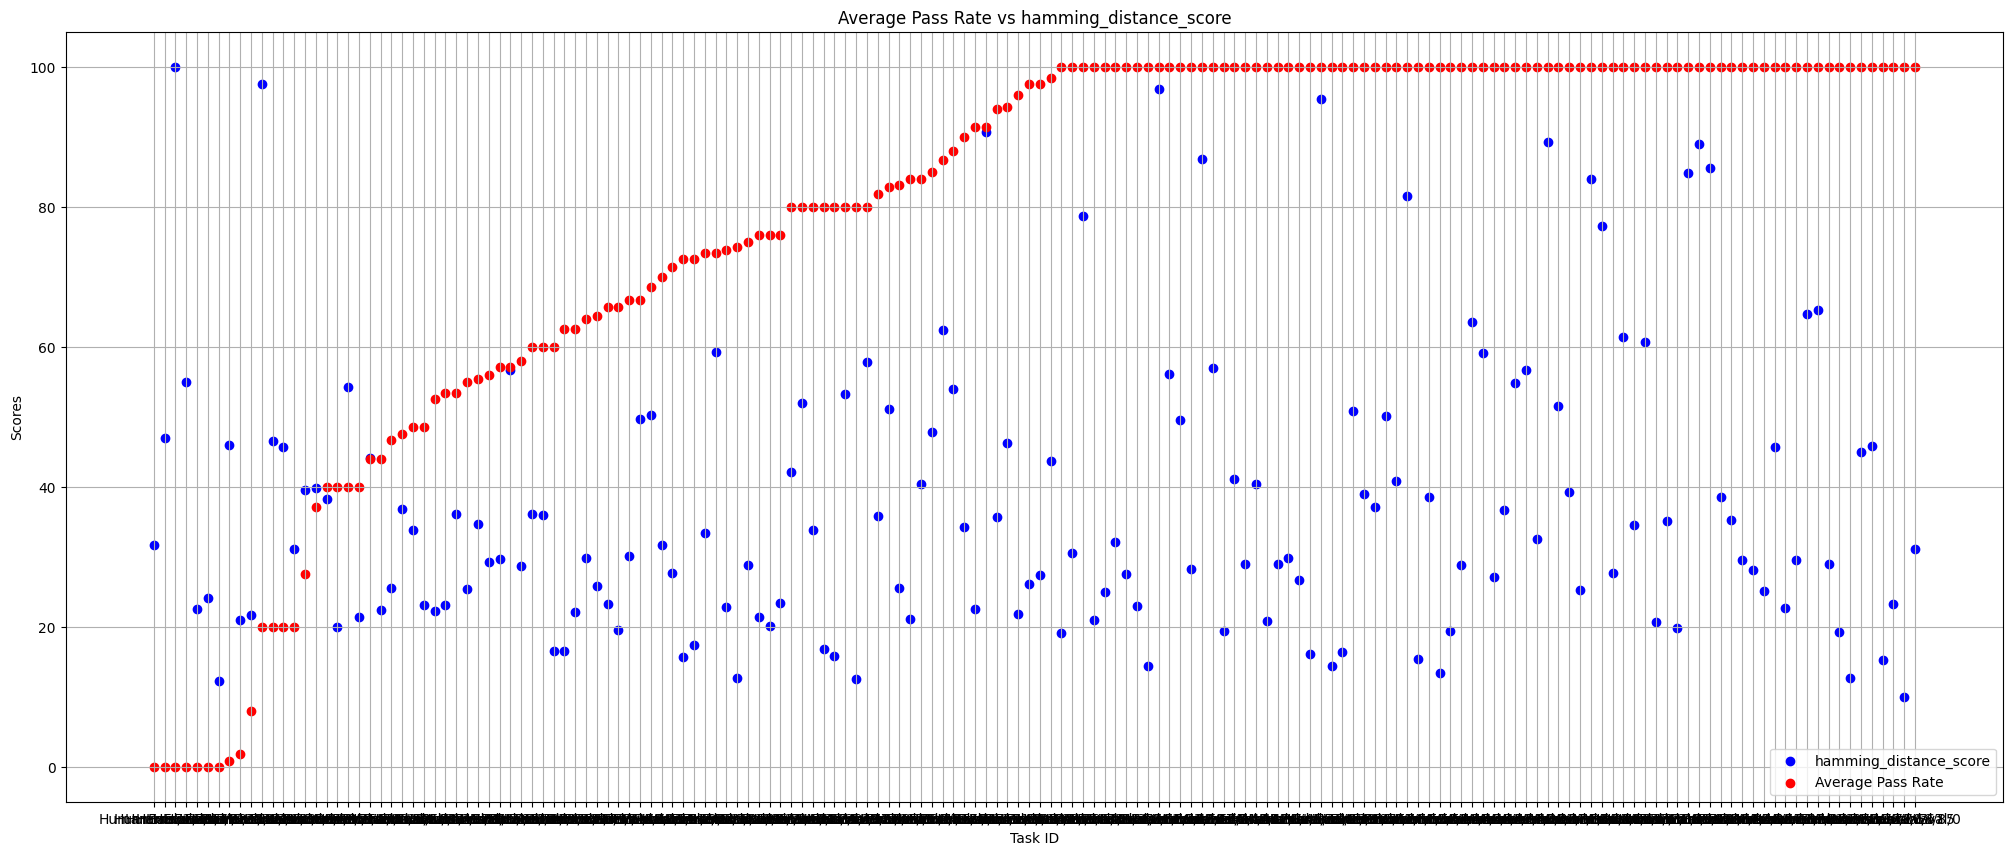

The correlation between the average pass rate and longest_common_subsequence is 0.13134448778803762


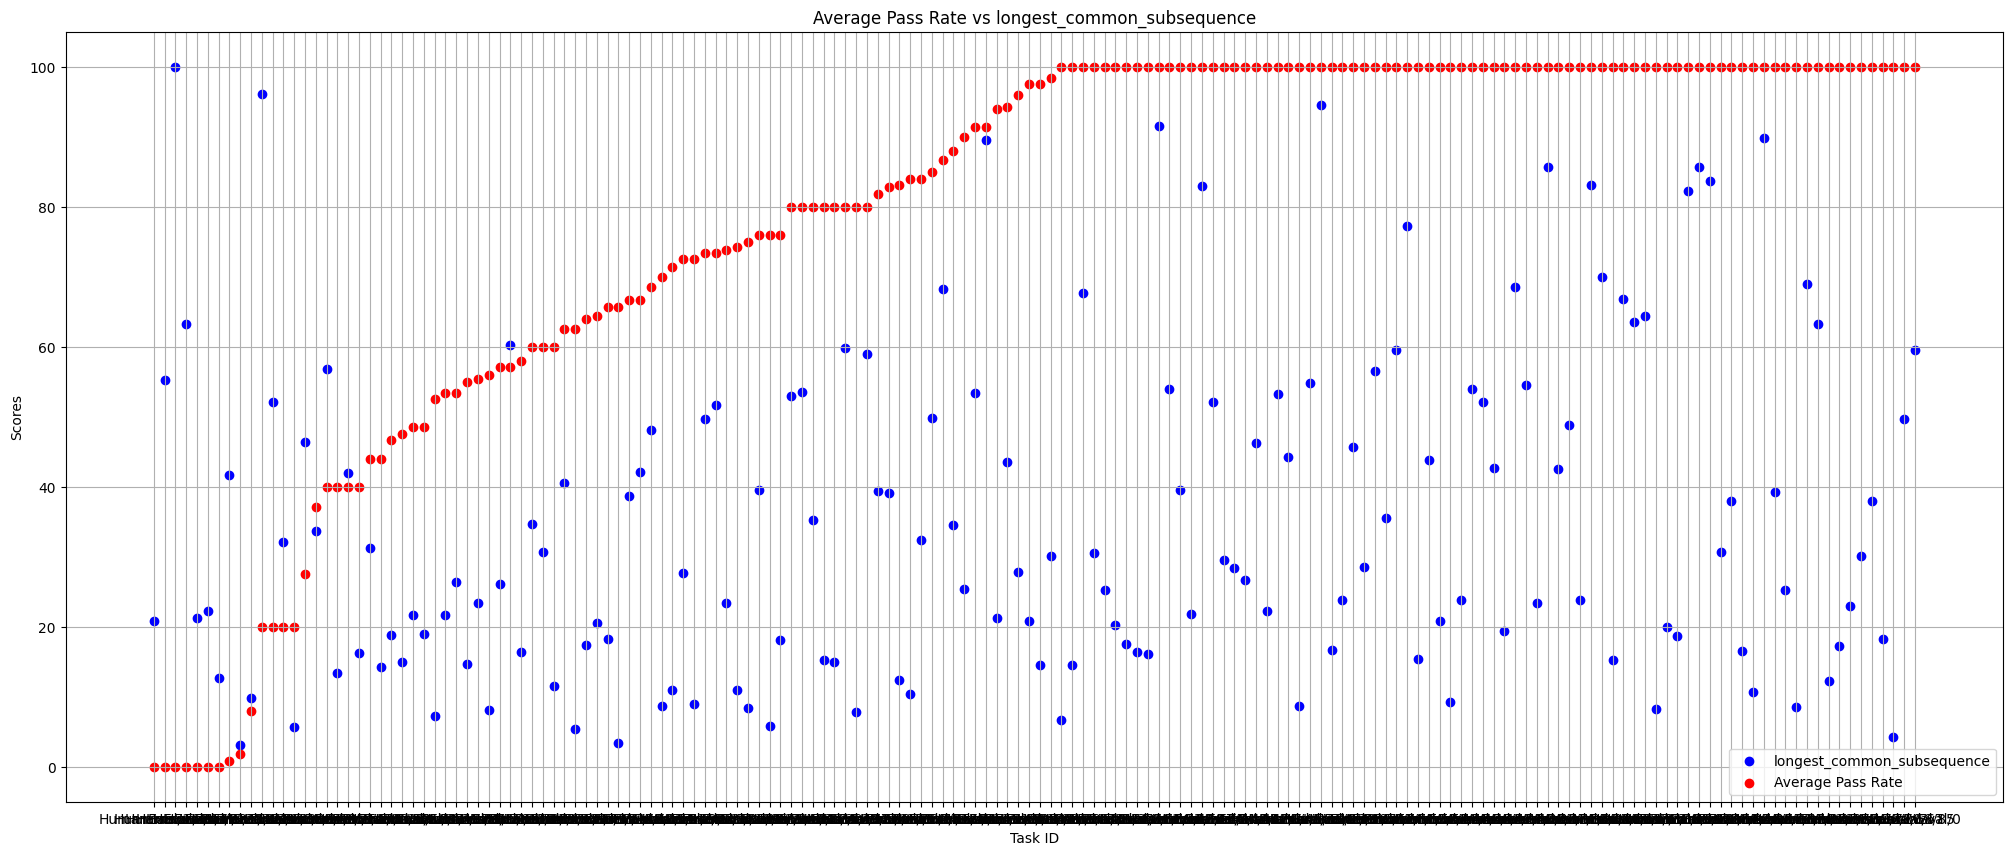

The correlation between the average pass rate and UnifiedDiff is 0.268075775070725


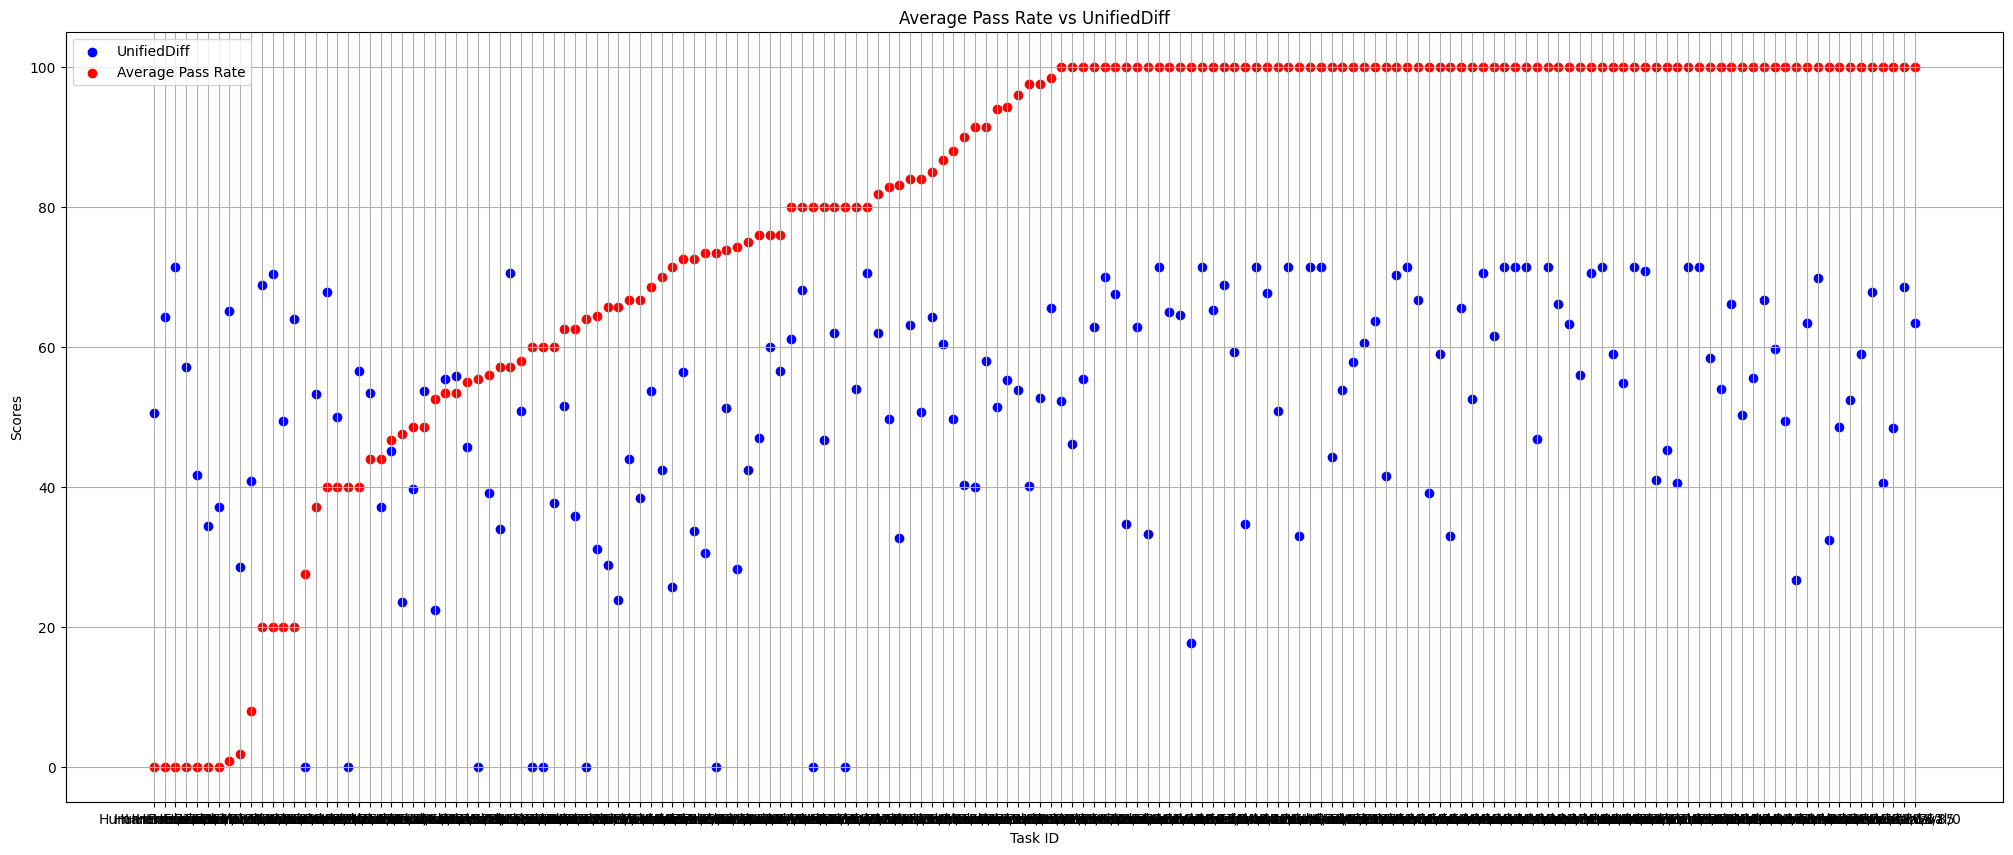

The correlation between the average pass rate and TreeDiff is 0.2270204194899006


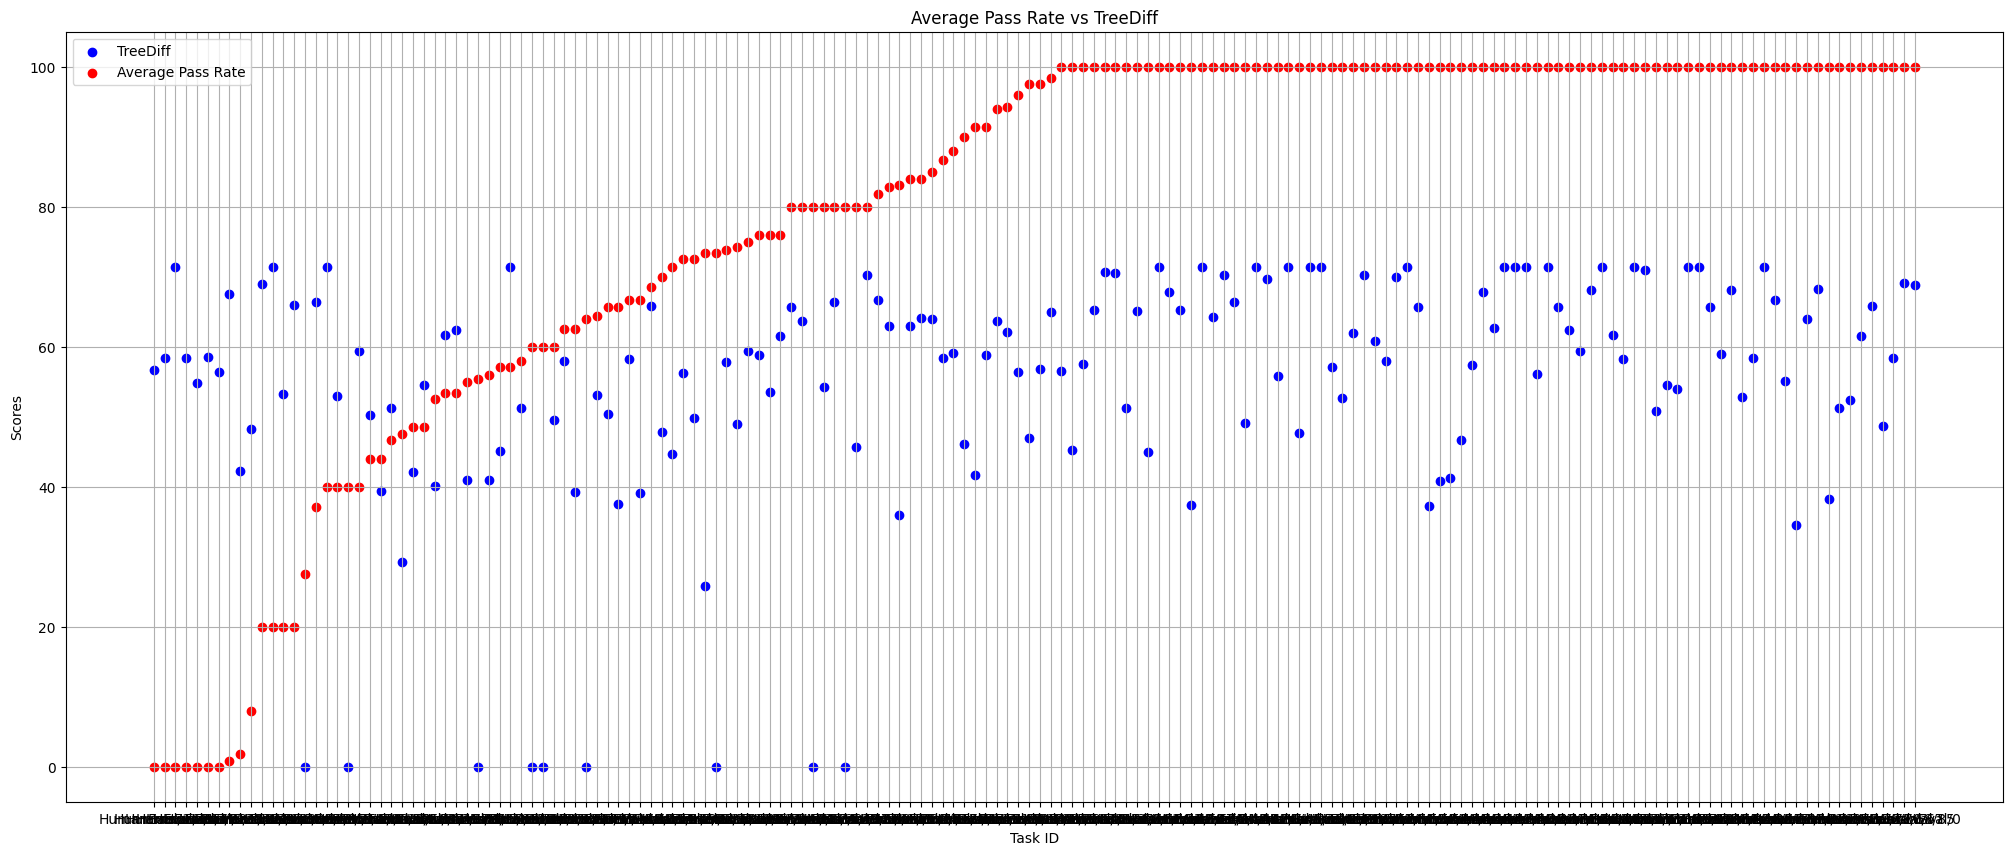

Visualizing the scores of the file  ./RESULTS/final scores/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_1_temps_1_trial_1_sim_score.csv  completed
--------------------------------------------------------------------
Scores generated successfully


In [73]:
# Get a list of all CSV files in the directory
csv_files = glob.glob('./RESULTS/final scores/*.csv')

# Loop over the files and read them into pandas DataFrames
for file in csv_files:
    df = pd.read_csv(file)
    visualize(df,file)
    

print("Scores generated successfully")

In [31]:
# Prepare data for visualization
labels = list(syntactic_similarity_scores.keys())

# Create a grouped bar chart for syntactic and structural scores
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [syntactic_similarity_scores[label]['aggregate_score'] for label in labels], width, label='Syntactic')
rects2 = ax.bar(x + width/2, [structural_similarity_scores[label]['aggregate_score'] for label in labels], width, label='Structural')

ax.set_xlabel('Code')
ax.set_ylabel('Score')
ax.set_title('Syntactic and Structural Similarity Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

NameError: name 'syntactic_similarity_scores' is not defined

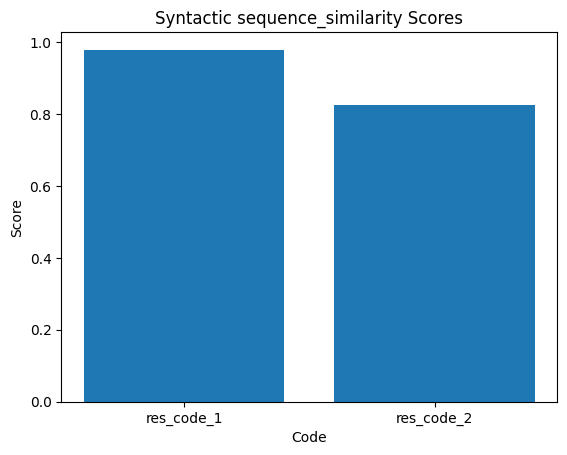

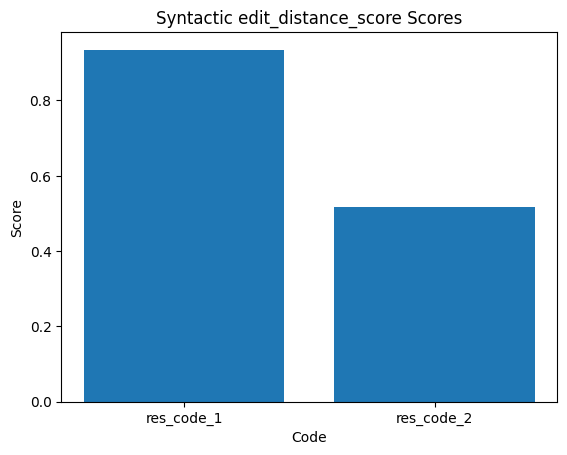

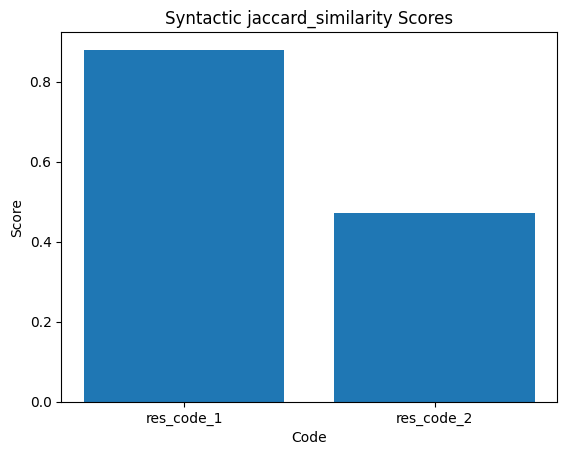

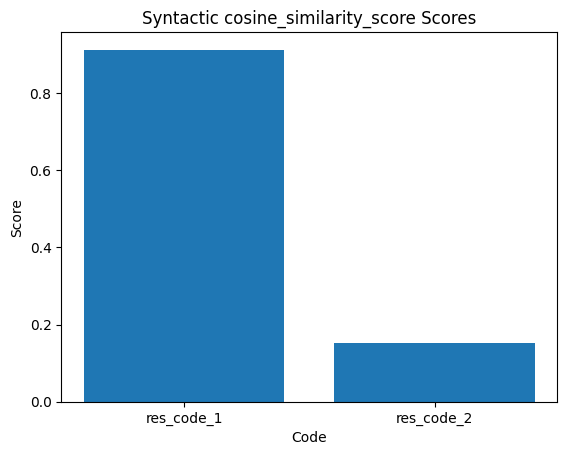

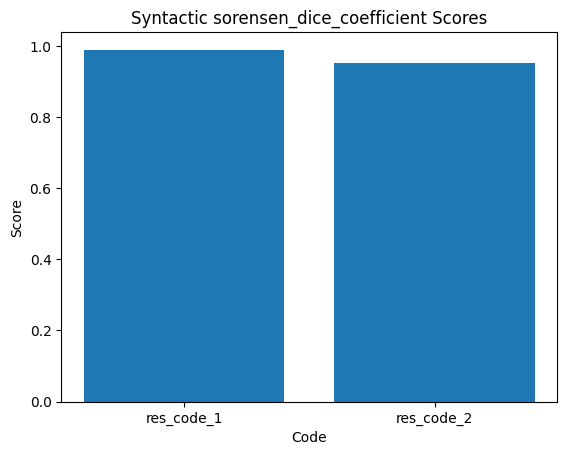

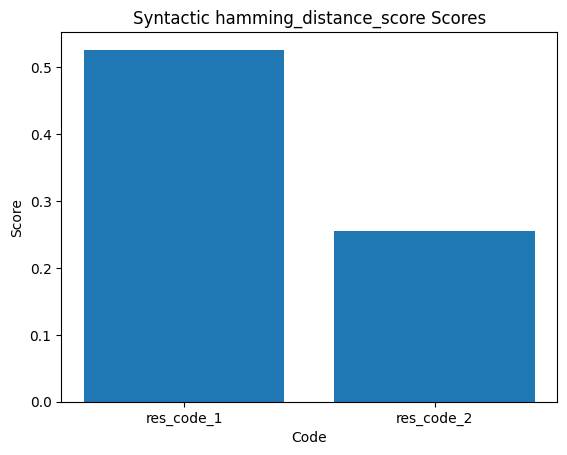

In [10]:
syntactic_metrics = list(syntactic_similarity_scores[labels[0]]['metrics'].keys())

# For each metric in syntactic metrics, create a separate bar chart
for metric in syntactic_metrics:
    plt.bar(labels, [syntactic_similarity_scores[label]['metrics'].get(metric, 0) for label in labels])
    plt.xlabel('Code')
    plt.ylabel('Score')
    plt.title(f'Syntactic {metric} Scores')
    plt.show()

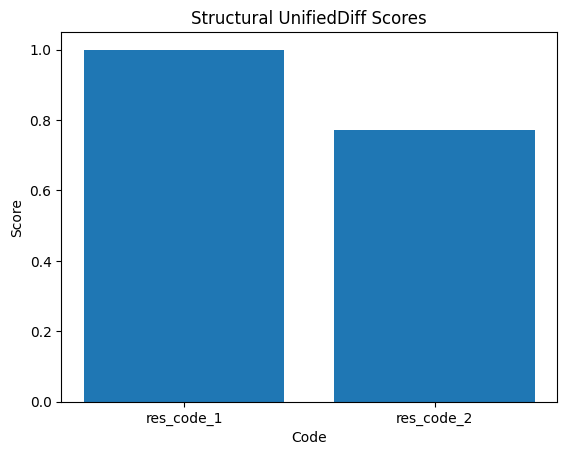

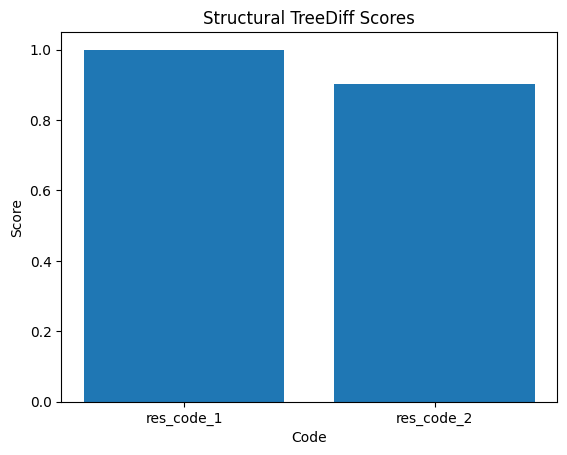

In [11]:
structural_metrics = list(structural_similarity_scores[labels[0]]['metrics'].keys())

# For each metric in structural metrics, create a separate bar chart
for metric in structural_metrics:
    plt.bar(labels, [structural_similarity_scores[label]['metrics'].get(metric, 0) for label in labels])
    plt.xlabel('Code')
    plt.ylabel('Score')
    plt.title(f'Structural {metric} Scores')
    plt.show()